# Final Project - Document Management Fajri

## Manajemen Package Python

In [1]:
# !pip install sqlalchemy psycopg2

In [2]:
# !pip install nbformat --upgrade

In [3]:
# !pip install ipython

In [4]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [5]:
# !pip install missingno

In [6]:
# !pip install plotly.express

In [7]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
import missingno as mn
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Data 

In [8]:
# Baca file CSV
df = pd.read_csv("sustainable managemet dataset.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        903 non-null    object 
 1   Author(s) ID                   903 non-null    object 
 2   Title                          903 non-null    object 
 3   Year                           903 non-null    int64  
 4   Source title                   903 non-null    object 
 5   Volume                         765 non-null    object 
 6   Issue                          533 non-null    object 
 7   Art. No.                       50 non-null     object 
 8   Page start                     843 non-null    float64
 9   Page end                       836 non-null    object 
 10  Page count                     7 non-null      float64
 11  Cited by                       677 non-null    float64
 12  DOI                            731 non-null    obj

In [9]:
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
       'References', 'Correspondence Address', 'Editors', 'Sponsors',
       'Publisher', 'Conference name', 'Conference date',
       'Conference location', 'Conference code', 'ISSN', 'ISBN', 'CODEN',
       'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Access Type', 'Source', 'EID'],
      dtype='object')

## Pembersihan Data

#### Cek Duplikasi Data

In [10]:
len(df.drop_duplicates()) / len(df)

1.0

#### Cek Missing Data

In [11]:
missing_count = df.isnull().sum()

In [12]:
# Menghitung persentase missing values per kolom
missing_percentage = (missing_count / len(df)) * 100

# Membuat DataFrame untuk hasil
missing_data = pd.DataFrame({
    'Kolom': df.columns,
    'Jumlah Missing': missing_count,
    'Persentase Missing (%)': missing_percentage
}).reset_index(drop=True)

# Menampilkan hasil
print(missing_data)

                            Kolom  Jumlah Missing  Persentase Missing (%)
0                         Authors               0                0.000000
1                    Author(s) ID               0                0.000000
2                           Title               0                0.000000
3                            Year               0                0.000000
4                    Source title               0                0.000000
5                          Volume             138               15.282392
6                           Issue             370               40.974529
7                        Art. No.             853               94.462901
8                      Page start              60                6.644518
9                        Page end              67                7.419712
10                     Page count             896               99.224806
11                       Cited by             226               25.027685
12                            DOI     

In [13]:
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
       'References', 'Correspondence Address', 'Editors', 'Sponsors',
       'Publisher', 'Conference name', 'Conference date',
       'Conference location', 'Conference code', 'ISSN', 'ISBN', 'CODEN',
       'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Access Type', 'Source', 'EID'],
      dtype='object')

In [14]:
# Daftar nama kolom yang ingin diperiksa untuk missing values
columns_to_check = ['Issue', 'Art. No.', 'Page count', 'Index Keywords', 
                    'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 
                    'Funding Details','Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
                    'Editors', 'Sponsors','Publisher', 'Conference name', 'Conference date','Conference location', 
                    'Conference code','ISBN', 'CODEN','PubMed ID','Access Type']

In [15]:
df_dropped_2 = df.drop(columns=columns_to_check)

In [16]:
df_dropped_2.isna().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                           138
Page start                        60
Page end                          67
Cited by                         226
DOI                              172
Link                               0
Affiliations                      27
Authors with affiliations          5
Abstract                           0
Author Keywords                  161
References                        49
Correspondence Address           152
ISSN                             124
Language of Original Document      0
Abbreviated Source Title           4
Document Type                      0
Publication Stage                  0
Source                             0
EID                                0
dtype: int64

In [17]:
df_dropped_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        903 non-null    object 
 1   Author(s) ID                   903 non-null    object 
 2   Title                          903 non-null    object 
 3   Year                           903 non-null    int64  
 4   Source title                   903 non-null    object 
 5   Volume                         765 non-null    object 
 6   Page start                     843 non-null    float64
 7   Page end                       836 non-null    object 
 8   Cited by                       677 non-null    float64
 9   DOI                            731 non-null    object 
 10  Link                           903 non-null    object 
 11  Affiliations                   876 non-null    object 
 12  Authors with affiliations      898 non-null    obj

Kolom data yang akan di benarkan terkait missing valuenya:
1. Volume - tipe object - seharusnya integer
2. Page start - tipe float - seharusnya integer
3. Page end - tipe object - seharusnya integer
4. DOI - tipe object - sudah benar object 
5. Affiliations - tipe object - sudah benar object 
6. Authors with affiliations - tipe object - sudah benar object 
7. Author Keywords - tipe object - sudah benar object 
8. References - tipe object - sudah benar object 
9. Correspondence Address - tipe object - sudah benar object 
10. ISSN - tipe object - sudah benar object 
11. Abbreviated Source Title - tipe object - sudah benar object 

Jadi yang perlu diubah tipe datanya yaitu kolom: Volume, Page start, dan Page end

In [18]:
missing_count_dropped = df_dropped_2.isnull().sum()
# Menghitung persentase missing values per kolom
missing_percentage_2 = (missing_count_dropped / len(df_dropped_2)) * 100

# Membuat DataFrame untuk hasil
missing_data_2 = pd.DataFrame({
    'Kolom': df_dropped_2.columns,
    'Jumlah Missing': missing_count_dropped,
    'Persentase Missing (%)': missing_percentage_2
}).reset_index(drop=True)

# Menampilkan hasil
print(missing_data_2)

                            Kolom  Jumlah Missing  Persentase Missing (%)
0                         Authors               0                0.000000
1                    Author(s) ID               0                0.000000
2                           Title               0                0.000000
3                            Year               0                0.000000
4                    Source title               0                0.000000
5                          Volume             138               15.282392
6                      Page start              60                6.644518
7                        Page end              67                7.419712
8                        Cited by             226               25.027685
9                             DOI             172               19.047619
10                           Link               0                0.000000
11                   Affiliations              27                2.990033
12      Authors with affiliations     

### Missing Value Handling untuk Data Numerik menggunakan Median

##### Volume

In [19]:
# Cek tipe data Volume
df_dropped_2['Volume'].dtype

# Konversi Object ke Numeric
df_dropped_2['Volume'] = pd.to_numeric(df_dropped_2['Volume'], errors='coerce')
df_dropped_2['Volume'].dtype

dtype('float64')

In [20]:
# Drop Outlier Data 9781461431886 pada Volume
df_dropped_2['Volume'].isin([9781461431886]).sum()
df_dropped_2.loc[df_dropped_2['Volume'] == 9781461431886, 'Volume'] = 97
df_dropped_2[['Volume']].value_counts()

Volume
8.0       22
10.0      22
15.0      20
7.0       20
9.0       18
          ..
221.0      1
239.0      1
234.0      1
231.0      1
267.0      1
Name: count, Length: 176, dtype: int64

In [21]:
# Menghitung median Volume dari data pelatihan yang tidak bernilai NaN
median_volume = df_dropped_2[(~df_dropped_2['Volume'].isna())]['Volume'].median()
median_volume

# Mengisi nilai missing (NaN) pada kolom Volume dengan pengetahuan median dari data 
df_dropped_2['Volume'] = df_dropped_2['Volume'].apply(lambda x: median_volume if pd.isna(x) else x)

# Mengonversi float ke int
df_dropped_2['Volume'] = df_dropped_2['Volume'].astype('int')
df_dropped_2['Volume'].value_counts()

Volume
30     155
8       22
10      22
7       20
15      20
      ... 
65       1
156      1
165      1
267      1
162      1
Name: count, Length: 176, dtype: int64

##### Page start

In [22]:
df_dropped_2['Page start'].value_counts()
# Cek tipe data Page start
df_dropped_2['Page start'].dtype

dtype('float64')

In [23]:
# Menghitung median Page start dari data pelatihan yang tidak bernilai NaN
median_page_start = df_dropped_2[(~df_dropped_2['Page start'].isna())]['Page start'].median()
median_page_start

# Mengisi nilai missing (NaN) pada kolom Page start dengan pengetahuan median dari data 
df_dropped_2['Page start'] = df_dropped_2['Page start'].apply(lambda x: median_page_start if pd.isna(x) else x)
df_dropped_2['Page start'].isna().sum()

# Mengonversi float ke int
df_dropped_2['Page start'] = df_dropped_2['Page start'].astype('int')
df_dropped_2['Page start'].value_counts()

Page start
191     62
1       55
41       6
89       6
61       6
        ..
518      1
2312     1
122      1
96       1
5745     1
Name: count, Length: 480, dtype: int64

##### Page end

In [24]:
# Cek tipe data Page end
df_dropped_2['Page end'].dtype

# Konversi Object ke Numeric
df_dropped_2['Page end'] = pd.to_numeric(df_dropped_2['Page end'], errors='coerce')
df_dropped_2['Page end'].dtype

dtype('float64')

In [25]:
# Menghitung median Page end dari data pelatihan yang tidak bernilai NaN
median_page_end = df_dropped_2[(~df_dropped_2['Page end'].isna())]['Page end'].median()

# Mengisi nilai missing (NaN) pada kolom Page end dengan pengetahuan median dari data 
df_dropped_2['Page end'] = df_dropped_2['Page end'].apply(lambda x: median_page_end if pd.isna(x) else x)

# Mengonversi float ke int
df_dropped_2['Page end'] = df_dropped_2['Page end'].astype('int')
df_dropped_2['Page end'].isna().sum()

np.int64(0)

##### Cited by

In [26]:
df_dropped_2['Cited by'].value_counts()
# Cek tipe data Cited by
df_dropped_2['Cited by'].dtype

dtype('float64')

In [27]:
# Menghitung median Citedby dari data pelatihan yang tidak bernilai NaN
median_citedby = df_dropped_2[(~df_dropped_2['Cited by'].isna())]['Cited by'].median()
median_citedby

# Mengisi nilai missing (NaN) pada kolom Citedby dengan pengetahuan median dari data 
df_dropped_2['Cited by'] = df_dropped_2['Cited by'].apply(lambda x: median_citedby if pd.isna(x) else x)
df_dropped_2['Cited by'].isna().sum()

# Mengonversi float ke int
df_dropped_2['Cited by'] = df_dropped_2['Cited by'].astype('int')
df_dropped_2['Cited by'].value_counts()

Cited by
7     253
1     107
3      62
2      58
4      32
     ... 
63      1
58      1
62      1
55      1
29      1
Name: count, Length: 91, dtype: int64

### Missing Value Handling untuk Data Object menggunakan Modus

In [28]:
# Daftar nama kolom object yang ingin dihandle missing valuesnya
columns_to_check_2 = ['DOI', 'Affiliations', 'Authors with affiliations', 'Author Keywords', 
                      'References','Correspondence Address','ISSN','Abbreviated Source Title']

In [29]:
# Loop untuk memeriksa modus dan mengisi missing values dengan modus
for column in columns_to_check_2:
    # Mencari modus dari kolom yang tidak mengandung NaN
    mode_column = df_dropped_2[column].mode()[0]  # Mengambil modus pertama
    
    # Mengisi missing values dengan modus
    df_dropped_2[column] = df_dropped_2[column].apply(lambda x: mode_column if pd.isna(x) else x)

# Memeriksa hasil
df_dropped_2[columns_to_check_2].isna().sum()


DOI                          0
Affiliations                 0
Authors with affiliations    0
Author Keywords              0
References                   0
Correspondence Address       0
ISSN                         0
Abbreviated Source Title     0
dtype: int64

#### Cek Outlier

In [30]:
def outlier_1 (df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR*1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR*1.5)
    return upper_boundary, lower_boundary

In [31]:
# Menghitung outlier untuk kolom numerik
for column in df_dropped_2.select_dtypes(include=['float64', 'int64']).columns:
    upper_IQR, lower_IQR = outlier_1(df_dropped_2, column)
    print(f"Outlier pada kolom `{column}`: Outlier di atas maksimum: {upper_IQR}; Outlier di bawah minimum: {lower_IQR}")

Outlier pada kolom `Year`: Outlier di atas maksimum: 2028.5; Outlier di bawah minimum: 2000.5
Outlier pada kolom `Volume`: Outlier di atas maksimum: 132.25; Outlier di bawah minimum: -53.75
Outlier pada kolom `Page start`: Outlier di atas maksimum: 835.75; Outlier di bawah minimum: -378.25
Outlier pada kolom `Page end`: Outlier di atas maksimum: 837.25; Outlier di bawah minimum: -332.75
Outlier pada kolom `Cited by`: Outlier di atas maksimum: 30.5; Outlier di bawah minimum: -13.5


In [32]:
def check_plot(df, variables):
    for variable in variables.columns:     
        plt.figure(figsize=(16, 4))

        # histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[variable], bins=30)
        plt.title('Histogram')

        # plot Q-Q
        plt.subplot(1, 3, 2)
        stats.probplot(df[variable], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')

        # box plot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=df[variable])
        plt.title('Boxplot')

        plt.show()

In [33]:
numeric_columns = df_dropped_2[['Volume', 'Page start', 'Page end', 'Cited by']]

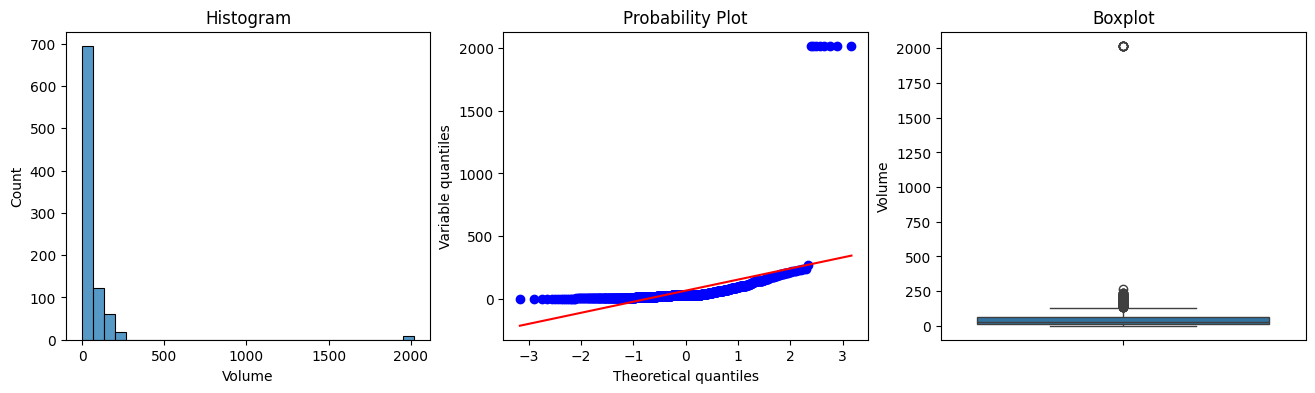

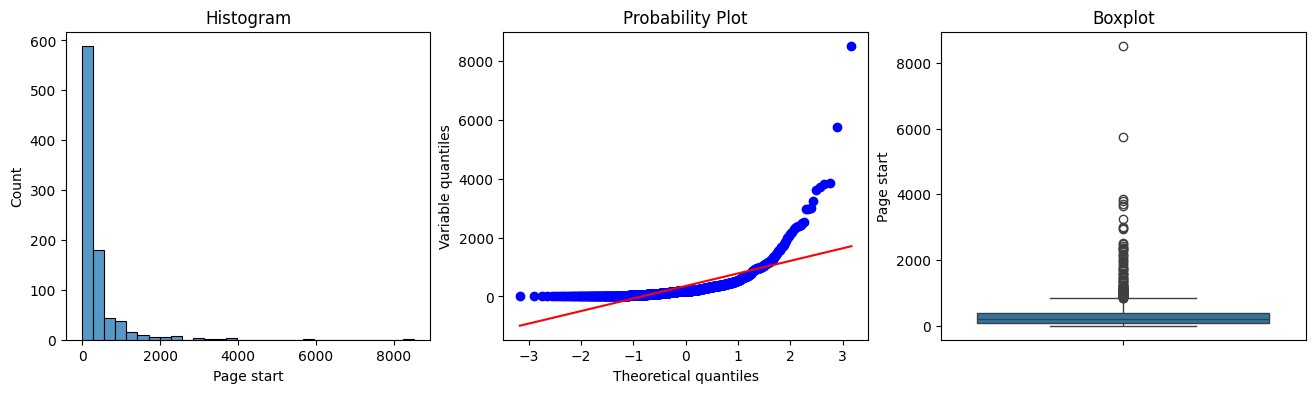

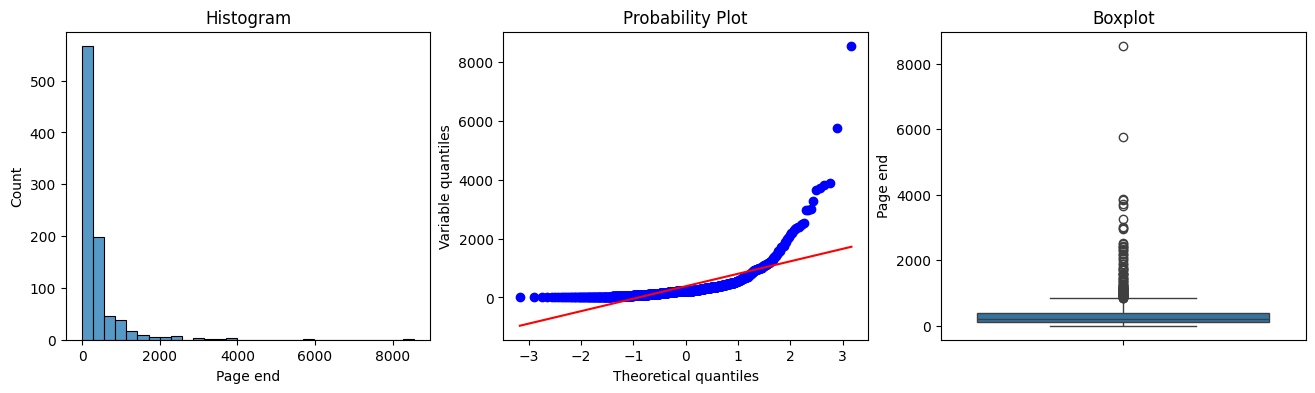

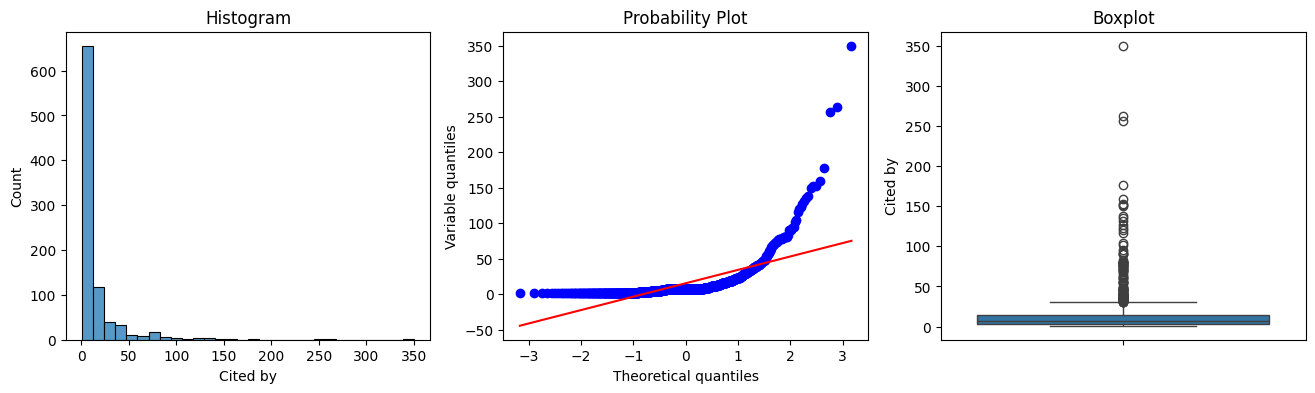

In [34]:
# Visualisasi outlier dengan boxplot
check_plot(df_dropped_2, numeric_columns) 

In [35]:
df_dropped_3 = df_dropped_2.copy()

Outlier kolom tujuan train data Machine Learning:
Outlier di atas maksimum: {'Volume': np.float64(132.25), 'Page start': np.float64(835.75), 'Page end': np.float64(837.25), 'Cited by': np.float64(30.5)}
Outlier di bawah minimum: {'Volume': np.float64(-53.75), 'Page start': np.float64(-378.25), 'Page end': np.float64(-332.75), 'Cited by': np.float64(-13.5)}
Jumlah data sebelum penghapusan outlier: 903
Jumlah data setelah penghapusan outlier: 648


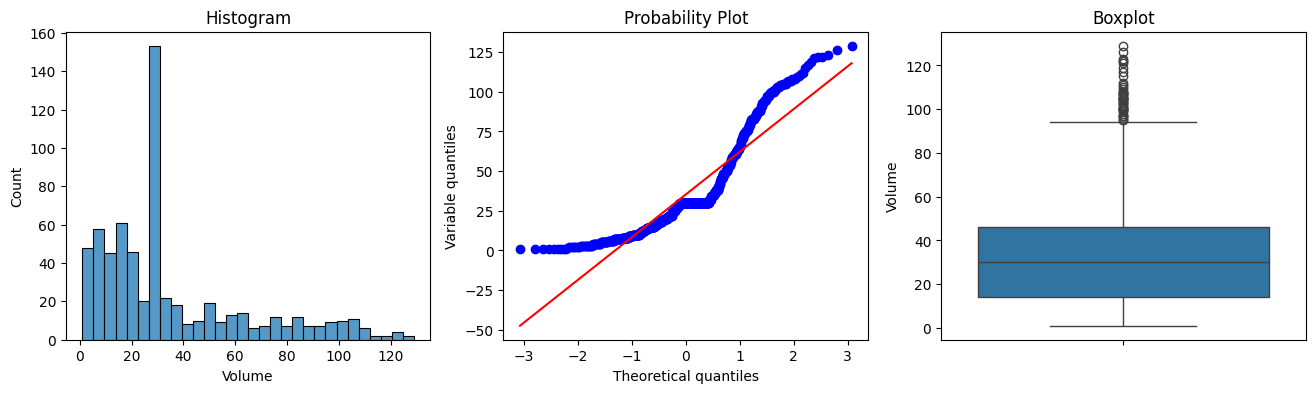

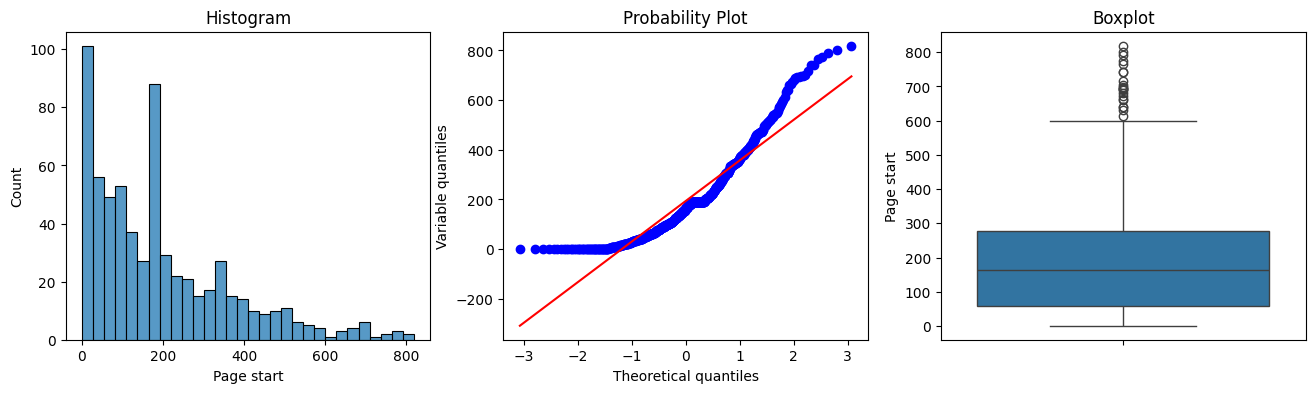

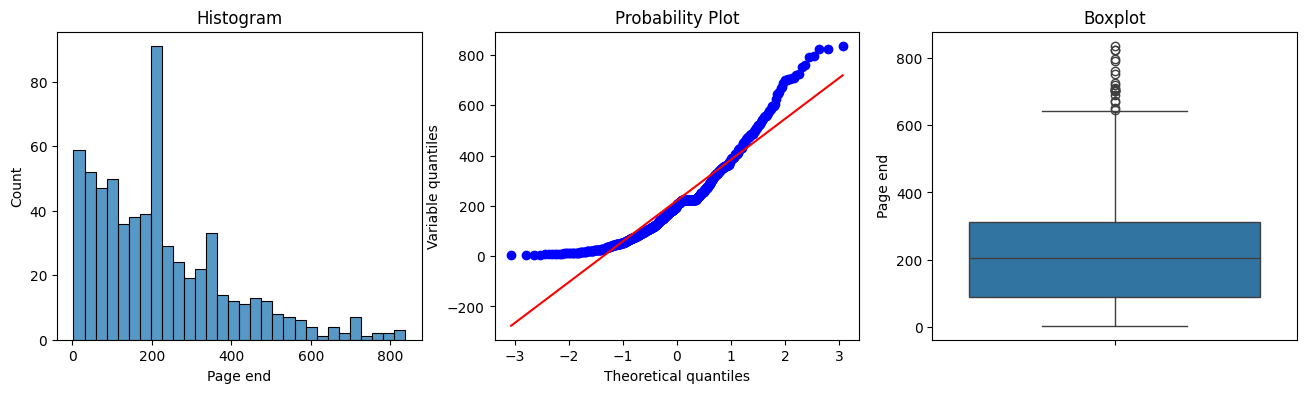

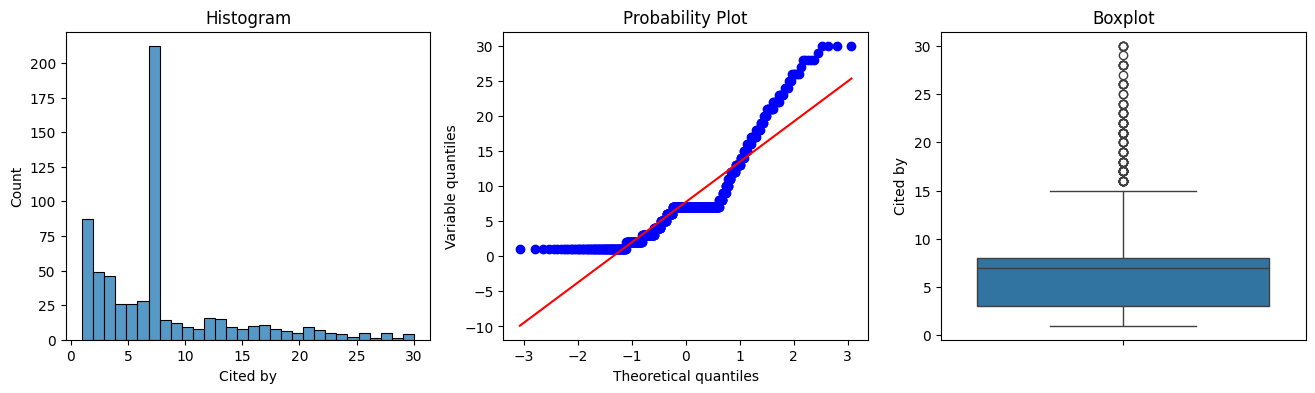

In [36]:
# Kolom numerik yang ingin di-check untuk outlier
numeric_columns = df_dropped_2[['Volume', 'Page start', 'Page end','Cited by']]

# Fungsi untuk menghitung outlier menggunakan IQR dan memfilter data
def outlier_and_filter(df, variables):
    upper_boundaries = {}
    lower_boundaries = {}
    
    # Menghitung batas atas dan bawah untuk outlier
    for variable in variables.columns:
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)
        
        upper_boundaries[variable] = upper_boundary
        lower_boundaries[variable] = lower_boundary
    
    # Memfilter data berdasarkan batas atas dan bawah
    for column in variables.columns:
        upper_limit = upper_boundaries[column]
        lower_limit = lower_boundaries[column]
        df = df[(df[column] <= upper_limit) & (df[column] >= lower_limit)]
    
    return df, upper_boundaries, lower_boundaries

# Salin DataFrame sebelum penghapusan outlier
df_dropped_3 = df_dropped_2.copy()

# Menghitung outlier dan memfilter data
df_dropped_3, upper_kolom_tujuan_ML, lower_kolom_tujuan_ML = outlier_and_filter(df_dropped_3, numeric_columns)

# Menampilkan hasil batas atas dan bawah untuk outlier
print(f"Outlier kolom tujuan train data Machine Learning:\nOutlier di atas maksimum: {upper_kolom_tujuan_ML}\nOutlier di bawah minimum: {lower_kolom_tujuan_ML}")

# Mengecek jumlah data sebelum dan sesudah penghapusan outlier
print(f"Jumlah data sebelum penghapusan outlier: {len(df_dropped_2)}")
print(f"Jumlah data setelah penghapusan outlier: {len(df_dropped_3)}")

# Visualisasi outlier dengan boxplot setelah outlier handling
check_plot(df_dropped_3, numeric_columns) 


In [37]:
df_dropped_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 108 to 902
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Authors                        648 non-null    object
 1   Author(s) ID                   648 non-null    object
 2   Title                          648 non-null    object
 3   Year                           648 non-null    int64 
 4   Source title                   648 non-null    object
 5   Volume                         648 non-null    int64 
 6   Page start                     648 non-null    int64 
 7   Page end                       648 non-null    int64 
 8   Cited by                       648 non-null    int64 
 9   DOI                            648 non-null    object
 10  Link                           648 non-null    object
 11  Affiliations                   648 non-null    object
 12  Authors with affiliations      648 non-null    object
 13  Abstract

In [38]:
# Apakah ada entri yang tidak sesuai atau tidak cocok dalam data
for _, row in df_dropped_3.iterrows():
    scholar = row['Authors'].split(', ')
    scholar_id = row['Author(s) ID'].split(';')
    
    if len(scholar) != len(scholar_id) - 1:
        print(f"Row with mismatched scholar and scholar_id: Index {_}")
        print(f"Scholars: {scholar}")
        print(f"Scholar IDs: {scholar_id}")

Row with mismatched scholar and scholar_id: Index 750
Scholars: ['[No author name available]']
Scholar IDs: ['[No author id available]']
Row with mismatched scholar and scholar_id: Index 870
Scholars: ['[No author name available]']
Scholar IDs: ['[No author id available]']
Row with mismatched scholar and scholar_id: Index 892
Scholars: ['[No author name available]']
Scholar IDs: ['[No author id available]']


In [39]:
# Update data yang missmatched
df_dropped_3.loc[df_dropped_3['Authors'].str.contains('Pereira R.'), 'Authors'] = 'Boltz F., Carter D.R., Holmes T.P., Pereira R.Jr.'

In [40]:
df_dropped_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 108 to 902
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Authors                        648 non-null    object
 1   Author(s) ID                   648 non-null    object
 2   Title                          648 non-null    object
 3   Year                           648 non-null    int64 
 4   Source title                   648 non-null    object
 5   Volume                         648 non-null    int64 
 6   Page start                     648 non-null    int64 
 7   Page end                       648 non-null    int64 
 8   Cited by                       648 non-null    int64 
 9   DOI                            648 non-null    object
 10  Link                           648 non-null    object
 11  Affiliations                   648 non-null    object
 12  Authors with affiliations      648 non-null    object
 13  Abstract

Kolom yang belum ada setelah di split:
1. DOI
2. ISSN
3. Language of Original Document
4. Abbreviated Source Title
5. Publication Stage
6. Source
7. EID
8. References

### Split data untuk memisahkan lebih dari 1 authors dan keyword dalam satu baris

In [41]:
# Split dataframe: Memisahkan authors, authors ID, dan keyword ke dalam entri yang berbeda

split_data = []

for _, row in df_dropped_3.iterrows():
    scholar = row['Authors'].split(', ')  # Memisahkan Authors berdasarkan koma
    scholar_id = row['Author(s) ID'].split(';')  # Memisahkan Author(s) ID berdasarkan titik koma
    affiliation = row['Affiliations'].split('; ')  # Memisahkan Affiliations berdasarkan titik koma
    title = row['Title']  # Judul artikel
    year = row['Year']  # Tahun publikasi
    journal = row['Source title']  # Nama jurnal
    volume = row['Volume']  # Volume jurnal
    page_start = row['Page start']  # Halaman awal
    page_end = row['Page end']  # Halaman akhir
    cited_by = row['Cited by']  # Jumlah sitasi
    link = row['Link']  # Tautan ke artikel
    keywords = [kw.title() for kw in row['Author Keywords'].split('; ')]  # Memisahkan dan memformat Author Keywords
    document_type = row['Document Type']  # Jenis dokumen
    doi = row['DOI']  # Digital Object Identifier = sistem pengenalan unik objek publikasi di internet
    issn = row['ISSN']  # International Standard Serial Number = kode unik yang digunakan untuk mengidentifikasi publikasi berkala
    language = row['Language of Original Document'] # Bahasa yang digunakan dalam artikel
    abbreviated = row['Abbreviated Source Title'] # Bentuk singkatan dari judul sumber atau publikasi mengikuti aturan ISO 4, contoh (J. Biol. Chem.) dan (Proc. Natl. Acad. Sci. U.S.A.)
    stage = row['Publication Stage'] # Tahapan atau fase dalam proses penerbitan sebuah publikasi
    source = row['Source'] # Informasi yang merujuk pada asal atau tempat di mana data, informasi, atau materi lain diperoleh
    eid = row['EID'] # event ID = Kode untuk merekam, melacak, dan mengelompokkan peristiwa yang terjadi pada dokumen
    references = row['References']

    # Memeriksa apakah jumlah affiliation sesuai dengan jumlah penulis (scholar)
    if len(scholar) == len(affiliation):
        for s, s_id, aff in zip(scholar, scholar_id, affiliation):
            for keyword in keywords:
                split_data.append([s, s_id, aff, title, year, journal, volume, page_start, page_end, cited_by, link, keyword.strip(), document_type, doi, issn, language, abbreviated, stage, source, eid, references])
    else:
        # Menangani kasus di mana jumlah affiliation tidak sesuai dengan jumlah penulis (scholar)
        shared_affiliation = affiliation[0] if affiliation else ''
        for s, s_id in zip(scholar, scholar_id):
            for keyword in keywords:
                split_data.append([s, s_id, shared_affiliation, title, year, journal, volume, page_start, page_end, cited_by, link, keyword.strip(), document_type, doi, issn, language, abbreviated, stage, source, eid, references])
                
# Membuat DataFrame baru dengan data yang telah dipisahkan
split_df = pd.DataFrame(split_data, columns=['Scholar', 'Scholar_ID', 'Affiliations', 'Title', 'Year', 'Journal', 'Volume', 'Page_start', 'Page_end', 'Cited_by', 'Link', 'Keywords', 'Document_type','DOI','ISSN','Language of Original Document','Abbreviated Source Title','Publication Stage','Source','EID', 'References'])
split_df

Scholar   Scholar_ID  \
0      Andrades L.  55516738600   
1      Andrades L.  55516738600   
2      Andrades L.  55516738600   
3      Andrades L.  55516738600   
4      Dimanche F.   6602124907   
...            ...          ...   
9441  Salamanca A.  54893176000   
9442  Salamanca A.  54893176000   
9443  Salamanca A.  54893176000   
9444  Salamanca A.  54893176000   
9445  Salamanca A.  54893176000   

                                           Affiliations  \
0     Department of Business Administration and Soci...   
1     Department of Business Administration and Soci...   
2     Department of Business Administration and Soci...   
3     Department of Business Administration and Soci...   
4     Ted Rogers School of Hospitality and Tourism M...   
...                                                 ...   
9441  The Haribon Foundation for the Conservation of...   
9442  The Haribon Foundation for the Conservation of...   
9443  The Haribon Foundation for the Conservation of...   
9444  The Haribon Foundation for the Conservation of...   
9445  The Haribon Foundation for the Conservation of...   

                                                  Title  Year  \
0     Destination competitiveness and tourism develo...  2017   
1     Destination competitiveness and tourism develo...  2017   
2     Destination competitiveness and tourism develo...  2017   
3     Destination competitiveness and tourism develo...  2017   
4     Destination competitiveness and tourism develo...  2017   
...                                                 ...   ...   
9441  Sustainable management of coastal wetlands in ...  1995   
9442  Sustainable management of coastal wetlands in ...  1995   
9443  Sustainable management of coastal wetlands in ...  1995   
9444  Sustainable management of coastal wetlands in ...  1995   
9445  Sustainable management of coastal wetlands in ...  1995   

                         Journal  Volume  Page_start  Page_end  Cited_by  ...  \
0             Tourism Management      62         360       376        30  ...   
1             Tourism Management      62         360       376        30  ...   
2             Tourism Management      62         360       376        30  ...   
3             Tourism Management      62         360       376        30  ...   
4             Tourism Management      62         360       376        30  ...   
...                          ...     ...         ...       ...       ...  ...   
9441  Asian Review of Accounting       3          41        57         7  ...   
9442  Asian Review of Accounting       3          41        57         7  ...   
9443  Asian Review of Accounting       3          41        57         7  ...   
9444  Asian Review of Accounting       3          41        57         7  ...   
9445  Asian Review of Accounting       3          41        57         7  ...   

                                          Keywords Document_type  \
0                                           Russia       Article   
1                  Sustainable Tourism Development       Article   
2              Tourism Destination Competitiveness       Article   
3                             Transition Economies       Article   
4                                           Russia       Article   
...                                            ...           ...   
9441  (Fed-)Batch Processes Sustainable Management        Review   
9442                          Dynamic Optimization        Review   
9443            Low-Cost Utilities Usage Reduction        Review   
9444           Non-Linear Model-Predictive Control        Review   
9445                    Scenario-Based Programming        Review   

                                DOI      ISSN Language of Original Document  \
0     10.1016/j.tourman.2017.05.008  02615177                       English   
1     10.1016/j.tourman.2017.05.008  02615177                       English   
2     10.1016/j.tourman.2017.05.008  02615177                       Engli

In [42]:
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9446 entries, 0 to 9445
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Scholar                        9446 non-null   object
 1   Scholar_ID                     9446 non-null   object
 2   Affiliations                   9446 non-null   object
 3   Title                          9446 non-null   object
 4   Year                           9446 non-null   int64 
 5   Journal                        9446 non-null   object
 6   Volume                         9446 non-null   int64 
 7   Page_start                     9446 non-null   int64 
 8   Page_end                       9446 non-null   int64 
 9   Cited_by                       9446 non-null   int64 
 10  Link                           9446 non-null   object
 11  Keywords                       9446 non-null   object
 12  Document_type                  9446 non-null   object
 13  DOI

In [43]:
df_cleaned = split_df.copy()

In [44]:
df_cleaned.to_csv('management_publication_cleaned.csv', index=False)

In [45]:
df_cleaned.columns

Index(['Scholar', 'Scholar_ID', 'Affiliations', 'Title', 'Year', 'Journal',
       'Volume', 'Page_start', 'Page_end', 'Cited_by', 'Link', 'Keywords',
       'Document_type', 'DOI', 'ISSN', 'Language of Original Document',
       'Abbreviated Source Title', 'Publication Stage', 'Source', 'EID',
       'References'],
      dtype='object')

# Goals:

Cluster Analisis Berdasarkan Kata Kunci: 

Pengelompokkan publikasi berdasarkan kemiripan kata kunci menggunakan algoritma clustering (misalnya K-Means).

# Deskripsi Data

1. Sumber:

[(https://www.kaggle.com/datasets/saurabhshahane/sustainable-management-publication/data)]

2. Judul Data dan Deskripsi:

Purnomo, Agung (2020), “Sustainable Management Publication Dataset (1992-2019)”, Mendeley Data, V1, doi: 10.17632/4kmn36rr3y.1

3. Deskripsi Kolom: (Cited from Calwin9)


This notebook utilizes the Sustainable Management Publication dataset sourced from Kaggle. The dataset encompasses publication records of articles indexed in Scopus, specifically focusing on the subject area of sustainable management. It spans from the year 1992 to 2019, providing a comprehensive view of research contributions within this field over nearly three decades.

The dataset contains data authors, authors ID Scopus, title, year, source title, volume, issue, article number in Scopus, DOI, link, affiliation, abstract, index keywords, references, correspondence address, editors, publisher, conference name, conference date, conference code, ISSN, language, document type, access type, and EID.

Within the dataset, each publication entry may involve multiple authors, each identified by their respective author ID and affiliation. In cases where all authors share a common affiliation, only one affiliation is recorded.


In [46]:
# Membuat visualisasi summary data

# Menghitung jumlah Scholar_ID (unique number)
num_scholars = df_cleaned['Scholar_ID'].nunique()
# Menghitung jumlah Journal unik
num_journals = df_cleaned['Journal'].nunique()
# Menghitung jumlah Title artikel unik
num_titles = df_cleaned['Title'].nunique()
# Menghitung jumlah Keywords unik
num_keywords = df_cleaned['Keywords'].nunique()
# Menghitung jumlah Year unik
num_years = df_cleaned['Year'].nunique()

# Membuat figur visualisasi menggunakan Plotly
fig = go.Figure()

# Menambahkan elemen teks untuk menampilkan angka ringkasan
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4],  # Posisi horizontal untuk setiap kategori
    y=[1.6, 1.6, 1.6, 1.6, 1.6],  # Posisi vertikal teks angka
    mode="text", 
    text=["<span style='font-size:33px'><b>{}</b></span>".format(num_scholars), 
          "<span style='font-size:33px'><b>{}</b></span>".format(num_journals),
          "<span style='font-size:33px'><b>{}</b></span>".format(num_titles),
          "<span style='font-size:33px'><b>{}</b></span>".format(num_keywords),
          "<span style='font-size:33px'><b>{}</b></span>".format(num_years)],
    textposition="bottom center"
))

# Menambahkan elemen teks untuk menampilkan label kategori
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4],  # Posisi horizontal untuk setiap kategori
    y=[1.1, 1.1, 1.1, 1.1, 1.1],  # Posisi vertikal teks label
    mode="text", 
    text=["Scholars", "Journals", "Articles", "Keywords", "Years"],  # Label kategori
    textposition="bottom center"
))

# Menambahkan garis horizontal untuk mempercantik visualisasi
fig.add_hline(y=2.2, line_width=5, line_color='gray')  # Garis atas
fig.add_hline(y=0.3, line_width=3, line_color='gray')  # Garis bawah

# Menyembunyikan sumbu x dan y
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)

# Memperbarui tata letak visualisasi
fig.update_layout(
    showlegend=False,  # Menyembunyikan legenda
    height=300,  # Tinggi figur
    width=800,  # Lebar figur
    title='Data Summary',  # Judul visualisasi
    title_x=0.5,  # Posisi horizontal judul
    title_y=0.9,  # Posisi vertikal judul
    xaxis_range=[-0.5, 4.4],  # Rentang sumbu x
    yaxis_range=[-0.2, 2.2],  # Rentang sumbu y
    plot_bgcolor='#fafafa',  # Warna latar belakang plot
    paper_bgcolor='#fafafa',  # Warna latar belakang kertas
    font=dict(size=23, color='#323232'),  # Gaya font untuk teks umum
    title_font=dict(size=35, color='#222'),  # Gaya font untuk judul
    margin=dict(t=90, l=70, b=0, r=70),  # Margin figur
)

# Menghubungkan Database ke SQL

In [47]:
# !pip install ipython-sql

In [48]:
df_cleaned.head()

Scholar   Scholar_ID  \
0  Andrades L.  55516738600   
1  Andrades L.  55516738600   
2  Andrades L.  55516738600   
3  Andrades L.  55516738600   
4  Dimanche F.   6602124907   

                                        Affiliations  \
0  Department of Business Administration and Soci...   
1  Department of Business Administration and Soci...   
2  Department of Business Administration and Soci...   
3  Department of Business Administration and Soci...   
4  Ted Rogers School of Hospitality and Tourism M...   

                                               Title  Year  \
0  Destination competitiveness and tourism develo...  2017   
1  Destination competitiveness and tourism develo...  2017   
2  Destination competitiveness and tourism develo...  2017   
3  Destination competitiveness and tourism develo...  2017   
4  Destination competitiveness and tourism develo...  2017   

              Journal  Volume  Page_start  Page_end  Cited_by  ...  \
0  Tourism Management      62         360       376        30  ...   
1  Tourism Management      62         360       376        30  ...   
2  Tourism Management      62         360       376        30  ...   
3  Tourism Management      62         360       376        30  ...   
4  Tourism Management      62         360       376        30  ...   

                              Keywords Document_type  \
0                               Russia       Article   
1      Sustainable Tourism Development       Article   
2  Tourism Destination Competitiveness       Article   
3                 Transition Economies       Article   
4                               Russia       Article   

                             DOI      ISSN Language of Original Document  \
0  10.1016/j.tourman.2017.05.008  02615177                       English   
1  10.1016/j.tourman.2017.05.008  02615177                       English   
2  10.1016/j.tourman.2017.05.008  02615177                       English   
3  10.1016/j.tourman.2017.05.008  02615177                       English   
4  10.1016/j.tourman.2017.05.008  02615177                       English   

  Abbreviated Source Title Publication Stage  Source                 EID  \
0            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   
1            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   
2            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   
3            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   
4            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   

                                          References  
0  Al-Najjar, B., Corporate governance, tourism g...  
1  Al-Najjar, B., Corporate governance, tourism g...  
2  Al-Najjar, B., Corporate governance, tourism g...  
3  Al-Najjar, B., Corporate governance, tourism g...  
4  Al-Najjar, B., Corporate governance, tourism g...  

[5 rows x 21 columns]

## Pembersihan Data Lanjutan

In [49]:
# Ganti nilai non-numerik dengan NaN
df_cleaned['Scholar_ID'] = pd.to_numeric(df_cleaned['Scholar_ID'], errors='coerce')

# Hitung median, abaikan NaN
median_scholar_id = df_cleaned['Scholar_ID'].median()

# Ganti NaN dengan median
df_cleaned['Scholar_ID'] = df_cleaned['Scholar_ID'].fillna(median_scholar_id).astype(int)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9446 entries, 0 to 9445
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Scholar                        9446 non-null   object
 1   Scholar_ID                     9446 non-null   int64 
 2   Affiliations                   9446 non-null   object
 3   Title                          9446 non-null   object
 4   Year                           9446 non-null   int64 
 5   Journal                        9446 non-null   object
 6   Volume                         9446 non-null   int64 
 7   Page_start                     9446 non-null   int64 
 8   Page_end                       9446 non-null   int64 
 9   Cited_by                       9446 non-null   int64 
 10  Link                           9446 non-null   object
 11  Keywords                       9446 non-null   object
 12  Document_type                  9446 non-null   object
 13  DOI

In [50]:
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Year'], format='%Y')

In [51]:
df_cleaned['Title'].duplicated()

0       False
1        True
2        True
3        True
4        True
        ...  
9441     True
9442     True
9443     True
9444     True
9445     True
Name: Title, Length: 9446, dtype: bool

## Menghubungkan Dataframe Python ke SQL dengan SQLAlchemy

In [52]:
# Create and add split_df to sql database
from sqlalchemy import create_engine, text

host = "localhost"
database = "postgres"
user = "postgres"
password = "Fajrimughni9"

engine = create_engine(f'postgresql://{user}:{password}@{host}/{database}')

df_cleaned.to_sql('Final Proyek Fajri', engine, if_exists='replace', index=False)
print("DataFrame berhasil diunggah ke database PostgreSQL.")

# Tidak perlu `engine.commit()` atau `engine.close()` karena `to_sql` sudah mengelola koneksi secara otomatis.

DataFrame berhasil diunggah ke database PostgreSQL.


In [53]:
article = "SELECT * FROM new_article;"

# Mengambil data dan menyimpannya ke dalam DataFrame menggunakan Pandas
df_article = pd.read_sql(article, engine)

# Menampilkan data
df_article

doi  \
0    10.1002/(SICI)1099-0836(199709)6:4<206::AID-BS...   
1                                10.1002/9781119199137   
2                                     10.1002/app5.266   
3                                      10.1002/app5.28   
4                                      10.1002/bse.539   
..                                                 ...   
504                          10.5604/01.3001.0011.5732   
505                           10.5604/12303666.1201128   
506                                10.5840/pom20086239   
507                         10.5901/mjss.2012.v3n3p471   
508                            10.7819/rbgn.v1650.1456   

                                                 title        year  \
0    Formulating standards for sustainable forest m...  1997-01-01   
1    Sustainable Investing for Institutional Invest...  2012-01-01   
2    Economic valuation of biodiversity in South As...  2019-01-01   
3    The Lawless Sea? Policy Options for Voluntary ...  2014-01-01   
4    An integrated framework for the financial anal...  2006-01-01   
..                                                 ...         ...   
504  Proposal of a concept for improving the sustai...  2018-01-01   
505  Management and characterization of textile sol...  2016-01-01   
506  Wisdom and Ethics in Management: The Education...  2007-01-01   
507  Analysis of housing condition and neighbourhoo...  2012-01-01   
508  Sustainable strategies and export performance:...  2014-01-01   

                                               journal volume  page_start  \
0                Business Strategy and the Environment      6         206   
1    Sustainable Investing for Institutional Invest...     30           1   
2                  Asia and the Pacific Policy Studies      6          59   
3                  Asia and the Pacific Policy Studies      1         297   
4                Business Strategy and the Environment     15         322   
..                                                 ...    ...         ...   
504              Fibres and Textiles in Eastern Europe     26           8   
505              Fibres and Textiles in Eastern Europe     24           8   
506                           Philosophy of Management      6         107   
507           Mediterranean Journal of Social Sciences      3         471   
508           Revista Brasileira de Gestao de Negocios     16          25   

     page_end  cited_by                                               link  \
0         217         7  https://www.scopus.com/inward/record.uri?eid=2...   
1         328         8  https://www.scopus.com/inward/record.uri?eid=2...   
2          72         7  https://www.scopus.com/inward/record.uri?eid=2...   
3         311         1  https://www.scopus.com/inward/record.uri?eid=2...   
4         333        26  https://www.scopus.com/inward/record.uri?eid=2...   
..        ...       ...                                                ...   
504        12        11  https://www.scopus.com/inward/record.uri?eid=2...   
505        13         3  https://www.scopus.com/inward/record.uri?eid=2...   
506       116         7  https://www.scopus.com/inward/record.uri?eid=2...   
507       481         7  https://www.scopus.com/inward/record.uri?eid=2...   
508        42         3  https://www.scopus.com/inward/record.uri?eid=2...   

                                            keywords document_type  
0       (Fed-)Batch Processes Sustainable Management       Article  
1       (Fed-)Batch Processes Sustainable Management          Book  
2                                       Biodiversity       Article  
3                            Offshore Resource Zones       Article  
4    Environmental And Social Performance Indicators       Article  
..                                               ...           ...  
504              Sustainable Supply Chain Management       Article  
505                                 Characterization       Article  
506                           

In [54]:
scholar = "SELECT * FROM scholar;"

# Mengambil data dan menyimpannya ke dalam DataFrame menggunakan Pandas
df_scholar = pd.read_sql(scholar, engine)

# Menampilkan data
df_scholar

scholar_id           scholar  \
0      6503935971  Von Der Heyde B.   
1      6504052105      Ambujam N.K.   
2      6504059231       Verbos A.K.   
3      6504072758      Blumberga D.   
4      6504074544       Tsomides L.   
...           ...               ...   
1700  57215032677         Fisher W.   
1701  57215263908           Wang S.   
1702  57215302736       Ažukaite L.   
1703  57215453949         Clough P.   
1704  57216022385           Legg C.   

                                            affiliation  
0     The Bucharest University of Economic Studies, ...  
1     Centre for Water Resources, Anna University, C...  
2     Department of Management, Central Michigan Uni...  
3     Institute of Energy Systems and Environment, R...  
4     School of Biology and Ecology, University of M...  
...                                                 ...  
1700  Department of Economic, Humboldt State Univers...  
1701  Faculty of Engineering, Environment and Comput...  
1702  Department of Architecture and Land Management...  
1703  NZ Institute of Economic Research, Wellington,...  
1704  International Livestock Research Institute (IL...  

[1705 rows x 3 columns]

In [55]:
scholar_article = "SELECT * FROM new_scholar_article;"

# Mengambil data dan menyimpannya ke dalam DataFrame menggunakan Pandas
df_scholar_article = pd.read_sql(scholar_article, engine)

# Menampilkan data
df_scholar_article

scholar_id                    article_id
0     57203878047     10.1016/j.smr.2018.09.001
1     55749989700           10.20867/thm.22.2.2
2      7004174711     10.1080/14724040802140501
3      7403257749  10.1016/j.marpol.2019.103705
4     56292507300             10.1002/sres.1097
...           ...                           ...
1491  23493827000   10.1007/978-1-4020-9690-7_8
1492  14025150300     10.1108/09696471011019853
1493  16307588600       10.1108/JEPP-D-18-00060
1494  57192229613      10.1108/SRJ-09-2018-0239
1495   6504059231      10.1108/JMD-01-2013-0016

[1496 rows x 2 columns]

### Setting Tabel untuk Pengolahan SQL Lanjutan

In [56]:
# Query SQL
new_published = '''
WITH new_published_article AS(
    SELECT Year, Title
    FROM new_article
    GROUP BY Year, Title
)
SELECT Year, Count(*) AS Count
FROM new_published_article
GROUP BY Year;
'''

# Mengambil data dan menyimpannya ke dalam DataFrame menggunakan Pandas
df_published_per_year = pd.read_sql_query(new_published, engine)

df_published_per_year

year  count
0   2017-01-01     57
1   2015-01-01     54
2   2019-01-01     73
3   1995-01-01      2
4   2008-01-01     12
5   2013-01-01     27
6   1996-01-01      2
7   1997-01-01      2
8   2003-01-01      3
9   2007-01-01      9
10  1998-01-01      2
11  2011-01-01     20
12  1999-01-01      5
13  2002-01-01      6
14  2012-01-01     34
15  2006-01-01     11
16  2000-01-01      1
17  2001-01-01      4
18  2014-01-01     37
19  2018-01-01     61
20  2004-01-01      6
21  1993-01-01      1
22  2005-01-01      7
23  2010-01-01     17
24  2016-01-01     44
25  2009-01-01     12

In [57]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_published_per_year['year'],
    y=df_published_per_year['count'],
    hoverinfo='y',
    hovertemplate='%{y}',
    name='Published Article',
    orientation='v',
    marker=dict(color='#c6ccd8')    
))

fig.update_xaxes(
    tickvals=df_published_per_year['year'],
    ticktext=df_published_per_year['year'],
)

fig.update_layout(
    title='Publications by Year',
    title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
    xaxis=dict(showgrid=False, zeroline=False, domain=[0.15, 1]),
    yaxis=dict(showgrid=False, showline=False, showticklabels=True, zeroline=False),
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=40),
    showlegend=False,
)

In [58]:
# Query SQL
new_keywords = '''
WITH new_ranked_keywords AS (
    SELECT Year, Keywords AS Keyword, 
           COUNT(*) AS Count,
           DENSE_RANK() OVER (PARTITION BY Year ORDER BY COUNT(*) DESC) AS Rank
    FROM new_article
    WHERE Year >= '2015-01-01'
    GROUP BY Year, Keywords
)
SELECT Year, Rank, Keyword, Count
FROM new_ranked_keywords
WHERE Rank <= 3 AND Count > 1
ORDER BY Year, Rank;
'''

# Mengambil data dan menyimpannya ke dalam DataFrame menggunakan Pandas
df_top_keywords = pd.read_sql_query(new_keywords, engine)

# Menampilkan hasil
df_top_keywords

year  rank                                       keyword  count
0   2015-01-01     1  (Fed-)Batch Processes Sustainable Management      5
1   2015-01-01     1                          Dynamic Optimization      5
2   2015-01-01     2           Non-Linear Model-Predictive Control      2
3   2016-01-01     1  (Fed-)Batch Processes Sustainable Management      5
4   2016-01-01     2                                Sustainability      2
5   2017-01-01     1            Low-Cost Utilities Usage Reduction      9
6   2017-01-01     2                    Scenario-Based Programming      4
7   2017-01-01     3           Non-Linear Model-Predictive Control      2
8   2017-01-01     3                          Dynamic Optimization      2
9   2018-01-01     1  (Fed-)Batch Processes Sustainable Management      6
10  2018-01-01     2                                  Blue Economy      2
11  2018-01-01     2                          Dynamic Optimization      2
12  2018-01-01     2            Low-Cost Utilities Usage Reduction      2
13  2019-01-01     1                    Scenario-Based Programming      2

In [59]:
df_top_keywords = df_top_keywords.sort_values(by='count')

fig = go.Figure()

for i, row in df_top_keywords.iterrows():
    text_label = row['keyword'] if row['rank'] == 1 else ''  # Only show label for Rank 1
    bar_color = '#496595' if row['rank'] == 1 else '#c6ccd8'
    hover_label = f'{row["keyword"]}<br>Count: {row["count"]}'
    
    fig.add_trace(go.Bar(
        x=[row['count']],
        y=[row['year']],
        text=text_label,
        hovertemplate=hover_label,
        hoverinfo='x+text',
        name='Keyword',
        orientation='h',
        marker=dict(
            color=bar_color,
            line=dict(color='rgb(248, 248, 249)', width=1),
        )
    ))

fig.update_layout(
    title='Top Keywords Used by Published Articles (2015-2019)',
    title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
    xaxis=dict(showgrid=False, zeroline=False, domain=[0.15, 1]),
    yaxis=dict(showgrid=False, showline=False, showticklabels=True, zeroline=False),
    barmode='stack',
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=10),
    showlegend=False,
)

In [60]:
top_keywords = '''
WITH new_ranked_keywords AS (
    SELECT Keywords AS Keyword, 
           COUNT(*) AS Count,
           DENSE_RANK() OVER (ORDER BY COUNT(*) DESC) AS Rank
    FROM new_article 
    GROUP BY Keywords
)
SELECT Rank, Keyword, Count
FROM new_ranked_keywords
WHERE Rank <= 10;
'''

# Mengambil data dan menyimpannya ke dalam DataFrame menggunakan Pandas
df_top10_keywords = pd.read_sql_query(top_keywords, engine)

# Menampilkan hasil
df_top10_keywords = df_top10_keywords.sort_values(by='count')

In [61]:
df_top10_keywords.sort_values(by='count')

rank                                       keyword  count
46      8                      Changedetection Analysis      1
368     8                    Human Resources Management      1
343     8                                   Coopetition      1
344     8                                     Behaviour      1
345     8                                     It Policy      1
..    ...                                           ...    ...
4       3           Non-Linear Model-Predictive Control      7
3       2                    Scenario-Based Programming     16
1       2                          Dynamic Optimization     16
2       2            Low-Cost Utilities Usage Reduction     16
0       1  (Fed-)Batch Processes Sustainable Management     44

[372 rows x 3 columns]

In [62]:
fig = go.Figure()

# Add bars to the plot
for i, row in df_top10_keywords.iterrows():
    text_label = row['keyword'] if row['rank'] == 1 else ''  # Only show label for Rank 1
    bar_color = '#496595' if row['rank'] == 1 else '#c6ccd8'
    hover_label = f'{row["keyword"]}<br>Count: {row["count"]}'
    
    fig.add_trace(go.Bar(
        x=[row['count']],
        y=[row['rank']],  # Use 'rank' for the y-axis
        text=text_label,
        hovertemplate=hover_label,
        hoverinfo='x+text',
        name='Keyword',
        orientation='h',
        marker=dict(
            color=bar_color,
            line=dict(color='rgb(248, 248, 249)', width=1),
        )
    ))

# Update layout for better proportions
fig.update_layout(
    title='Top Keywords Used by Published Articles (2015-2019)',
    title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
    xaxis=dict(
        showgrid=False, 
        zeroline=False, 
        domain=[0.15, 1],
        title="Count of Keywords",  # Add title for x-axis
        tickangle=0  # Rotate x-axis labels if needed
    ),
    yaxis=dict(
        showgrid=False, 
        showline=False, 
        showticklabels=True, 
        zeroline=False,
        title="Rank",  # Add title for y-axis
        tickmode='array',  # Adjust tick mode for better spacing
        tickvals=list(range(1, 11)),  # Display ranks 1 to 10
        ticktext=df_top10_keywords['keyword'].values  # Show the keywords as y-axis labels
    ),
    barmode='stack',
    template="plotly_white",
    margin=dict(l=50, r=50, t=100, b=40),  # Increase margins for better spacing
    height=600,  # Adjust the height of the figure
    width=800,  # Adjust the width of the figure
    showlegend=False,
)

fig.show()

## Save Semua Table ke Excel

In [63]:
df_cleaned.to_excel('data cleaned finpro.xlsx', index=False, engine='openpyxl')

In [64]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9446 entries, 0 to 9445
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Scholar                        9446 non-null   object        
 1   Scholar_ID                     9446 non-null   int64         
 2   Affiliations                   9446 non-null   object        
 3   Title                          9446 non-null   object        
 4   Year                           9446 non-null   datetime64[ns]
 5   Journal                        9446 non-null   object        
 6   Volume                         9446 non-null   int64         
 7   Page_start                     9446 non-null   int64         
 8   Page_end                       9446 non-null   int64         
 9   Cited_by                       9446 non-null   int64         
 10  Link                           9446 non-null   object        
 11  Keywords         

In [65]:
df_cleaned.head()

Scholar   Scholar_ID  \
0  Andrades L.  55516738600   
1  Andrades L.  55516738600   
2  Andrades L.  55516738600   
3  Andrades L.  55516738600   
4  Dimanche F.   6602124907   

                                        Affiliations  \
0  Department of Business Administration and Soci...   
1  Department of Business Administration and Soci...   
2  Department of Business Administration and Soci...   
3  Department of Business Administration and Soci...   
4  Ted Rogers School of Hospitality and Tourism M...   

                                               Title       Year  \
0  Destination competitiveness and tourism develo... 2017-01-01   
1  Destination competitiveness and tourism develo... 2017-01-01   
2  Destination competitiveness and tourism develo... 2017-01-01   
3  Destination competitiveness and tourism develo... 2017-01-01   
4  Destination competitiveness and tourism develo... 2017-01-01   

              Journal  Volume  Page_start  Page_end  Cited_by  ...  \
0  Tourism Management      62         360       376        30  ...   
1  Tourism Management      62         360       376        30  ...   
2  Tourism Management      62         360       376        30  ...   
3  Tourism Management      62         360       376        30  ...   
4  Tourism Management      62         360       376        30  ...   

                              Keywords Document_type  \
0                               Russia       Article   
1      Sustainable Tourism Development       Article   
2  Tourism Destination Competitiveness       Article   
3                 Transition Economies       Article   
4                               Russia       Article   

                             DOI      ISSN Language of Original Document  \
0  10.1016/j.tourman.2017.05.008  02615177                       English   
1  10.1016/j.tourman.2017.05.008  02615177                       English   
2  10.1016/j.tourman.2017.05.008  02615177                       English   
3  10.1016/j.tourman.2017.05.008  02615177                       English   
4  10.1016/j.tourman.2017.05.008  02615177                       English   

  Abbreviated Source Title Publication Stage  Source                 EID  \
0            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   
1            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   
2            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   
3            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   
4            Tour. Manage.             Final  Scopus  2-s2.0-85019923982   

                                          References  
0  Al-Najjar, B., Corporate governance, tourism g...  
1  Al-Najjar, B., Corporate governance, tourism g...  
2  Al-Najjar, B., Corporate governance, tourism g...  
3  Al-Najjar, B., Corporate governance, tourism g...  
4  Al-Najjar, B., Corporate governance, tourism g...  

[5 rows x 21 columns]

In [66]:
df_scholar.to_excel('dataframe scholar.xlsx', index=False, engine='openpyxl')

In [67]:
df_article.to_excel('dataframe article.xlsx', index=False, engine='openpyxl')

In [68]:
df_scholar_article.to_excel('dataframe scholar article.xlsx', index=False, engine='openpyxl')

In [69]:
df_published_per_year.to_excel('dataframe published per year.xlsx', index=False, engine='openpyxl')

In [70]:
df_top10_keywords.to_excel('dataframe top 10 keywords.xlsx', index=False, engine='openpyxl')

In [71]:
df_top_keywords.to_excel('dataframe top keywords.xlsx', index=False, engine='openpyxl')

In [72]:
df_cleaned.sample(5)

Scholar   Scholar_ID  \
3334         Helo T.   6506880314   
9433   Sandberg L.A.   7004976711   
9346      Cazalet B.  18633356900   
8013  Torres León L.  57203140920   
5605       Seay S.S.  55789685000   

                                           Affiliations  \
3334  Logistics Systems Research Group, University o...   
9433  Dept Political Science, St Francis Xavier Univ...   
9346  CERTAP (Centre d'Étude et de Recherche sur les...   
8013  Applied Economics, University of Cordoba, Cord...   
5605          University of West Georgia, United States   

                                                  Title       Year  \
3334  Cloud manufacturing towards sustainable manage... 2014-01-01   
9433  Formulating standards for sustainable forest m... 1997-01-01   
9346  Territorial rights of use, from formal recogni... 2007-01-01   
8013  Studying World Heritage visitors: the case of ... 2018-01-01   
5605                   Sustainability is applied ethics 2015-01-01   

                                                Journal  Volume  Page_start  \
3334  Business Transformation and Sustainability thr...      30         121   
9433              Business Strategy and the Environment       6         206   
9346                            Mondes en Developpement      35          61   
8013  Journal of Cultural Heritage Management and Su...       8         372   
5605    Journal of Legal, Ethical and Regulatory Issues      18          63   

      Page_end  Cited_by  ...                                      Keywords  \
3334       139         6  ...                    Scenario-Based Programming   
9433       217         7  ...            Low-Cost Utilities Usage Reduction   
9346       223         7  ...                                     Territory   
8013       386         7  ...                                World Heritage   
5605        70         2  ...  (Fed-)Batch Processes Sustainable Management   

     Document_type                                                DOI  \
3334  Book Chapter                    10.4018/978-1-4666-6445-6.ch009   
9433       Article  10.1002/(SICI)1099-0836(199709)6:4<206::AID-BS...   
9346       Article                              10.4324/9781849772020   
8013       Article                        10.1108/JCHMSD-03-2018-0017   
5605       Article                              10.4324/9781849772020   

          ISSN Language of Original Document  \
3334  0308597X                       English   
9433  0308597X                       English   
9346  03023052                        French   
8013  20441266                       English   
5605  15440036                       English   

                               Abbreviated Source Title Publication Stage  \
3334  Bus. Transform. and Sustain. through Cloud Sys...             Final   
9433                                    J. Clean. Prod.             Final   
9346                                        Mondes Dev.             Final   
8013           J. Cult. Herit. Manage. Sustainable Dev.             Final   
5605                        J. Leg. Ethical Regul. Iss.             Final   

      Source                 EID  \
3334  Scopus  2-s2.0-84945370836   
9433  Scopus   2-s2.0-0031428546   
9346  Scopus  2-s2.0-34547908872   
8013  Scopus  2-s2.0-85050656043   
5605  Scopus  2-s2.0-84959333151   

                                             References  
3334  Ai, Q.S., Mo, K., Wang, Y., Zhao, L., Research...  
9433  (1988) Labor Protection Regulations, p. 68. , ...  
9346  BLUNDO, G., Gérer les conflits fonciers au Sén...  
8013  Abuamoud, I.N., Libbin, J., Green, J., Alrousa...  
5605  Aristotle, (1980) The NicomacheanEthics, , Oxf...  

[5 rows x 21 columns]

In [73]:
df_cleaned.isna().sum()

Scholar                          0
Scholar_ID                       0
Affiliations                     0
Title                            0
Year                             0
Journal                          0
Volume                           0
Page_start                       0
Page_end                         0
Cited_by                         0
Link                             0
Keywords                         0
Document_type                    0
DOI                              0
ISSN                             0
Language of Original Document    0
Abbreviated Source Title         0
Publication Stage                0
Source                           0
EID                              0
References                       0
dtype: int64

# Pembobotan Kluster

## Tabel Kriteria

Pembobotan untuk kluster:


| **Kriteria**                 | **Kolom Data**                        | **Bobot (%)** | **Skor (1-10)** | **Keterangan**                                                                 |
|-------------------------------|----------------------------------------|---------------|------------------|---------------------------------------------------------------------------------|
| **Reputasi Jurnal**           | Source Title, ISSN         | 25%           | [ ]              | Apakah jurnal terindeks di Scopus, WoS, atau Sinta?                             |
| **Produktivitas dan Dampak**  | Cited by, Volume               | 25%           | [ ]              | Jumlah kutipan dan frekuensi penerbitan.                                        |
| **Kualitas Konten**           | Title, Keywords             | 25%           | [ ]              | Relevansi dengan tema ekonomi.                                                  |
| **Kolaborasi dan Kredibilitas** | Scholars/Authors, Affiliations                | 15%           | [ ]              | Kredibilitas penulis dan institusi.                                             |
| **Indikator Tambahan**        | References, Language                  | 10%           | [ ]              | Jumlah referensi dan bahasa dokumen.                                            |


## Skor Tiap Kriteria

#### Reputasi Jurnal (25%)

Source Title/Journal dan ISSN  = 

10: Jurnal terindeks di Scopus/Web of Science (WoS) dengan kategori tinggi (Q1/Q2).

8-9: Jurnal terindeks di Scopus/WoS dengan kategori sedang (Q3/Q4) atau Sinta 1.

6-7: Jurnal terindeks di Sinta 2 atau DOAJ.

4-5: Jurnal terindeks di indeksasi lokal atau kurang dikenal.

<4: Tidak terindeks di indeksasi mana pun.

#### Produktivitas dan Dampak (25%) - (menggunakan kedua subkriteria, hitung rata-rata skor)

Cited By =

10: >100 kutipan.

8-9: 50-99 kutipan.

6-7: 10-49 kutipan.

<6: <10 kutipan.

Volume (Frekuensi penerbitan) =

10: Terbit secara reguler (misalnya, bulanan atau triwulanan).

8-9: Terbit dua kali setahun.

6-7: Terbit setahun sekali atau tidak konsisten.

#### Kualitas Konten (25%)

Title/Keywords (Relevansi dengan tema ekonomi) =

10: Sangat relevan dengan isu ekonomi terkini (misalnya, ekonomi digital, keberlanjutan).

8-9: Relevan dengan tema ekonomi umum.

6-7: Kurang relevan atau terlalu spesifik.

<6: Tidak relevan.

#### Kolaborasi dan Kredibilitas (15%)

Affiliations =

10: Penulis berasal dari institusi top global (misalnya, universitas peringkat QS 100).

8-9: Penulis berasal dari institusi nasional bereputasi.

6-7: Penulis dari institusi umum.

<6: Kredibilitas penulis tidak jelas.

#### Indikator Lain (menggunakan kedua subkriteria, hitung rata-rata skor)

References (Jumlah referensi) =

10: >50 referensi.

8-9: 30-49 referensi.

6-7: 10-29 referensi.

<6: <10 referensi.

Language (Bahasa Dokumen) =

10: Ditulis dalam bahasa Inggris.

8-9: Ditulis dalam bahasa nasional dengan ringkasan dalam bahasa Inggris.

<8: Ditulis hanya dalam bahasa lokal.

## Rumus Skor Akhir

Rumus:

Skor Akhir = ∑ (Skor Kriteria × Bobot Kriteria)

## Keterangan Skor Akhir

Interpretasi Skor Akhir=

8.0-10.0: Jurnal berkualitas tinggi, sangat direkomendasikan.

6.0-7.9: Jurnal berkualitas baik, cukup direkomendasikan.

4.0-5.9: Jurnal berkualitas sedang, perlu evaluasi lebih lanjut.

<4.0: Jurnal berkualitas rendah, tidak direkomendasikan.

## Pembersihan Data Lanjutan: Cleaned dataframe untuk Kolom yang Masuk dalam Pembobotan/Scoring

## Skor Indikator Lain

### References

In [74]:
def fill_references(reference):
    if '...' in reference:
        return reference.replace('...', 'Ref8, Ref9, Ref10')
    return reference

In [75]:
# Terapkan fungsi untuk mengganti titik-titik pada kolom 'References'
df_cleaned['References'] = df_cleaned['References'].apply(fill_references)

In [76]:
print(fill_references(df_cleaned.loc[0, 'References']))

Al-Najjar, B., Corporate governance, tourism growth and firm performance: Evidence from publicly listed tourism firms in five Middle Eastern countries (2014) Tourism Management, 42, pp. 342-351; Aleksandrova, A.Y., Vladimirov, Y.L., Tourism clusters in Russia, features of the creation (the case of Vologda region) (2016) Worldwide Hospitality and Tourism Themes, 8 (3), pp. 346-358; Alexandrovich, I.A., Development of the tourism industry in the north of Russia based on the environment features (2015) Mediterranean Journal of Social Sciences, 6 (5), pp. 387-401; Andrades-Caldito, L., Sánchez-Rivero, M., Pulido-Fernández, J.I., Differentiating competitiveness through tourism image assessment: An application to Andalusia (Spain) (2013) Journal of Travel Research, 52 (1), pp. 68-81; Andrades-Caldito, L., Sánchez-Rivero, M., Pulido-Fernández, J.L., Tourism destination competitiveness from a demand point of view: An empirical analysis for Andalusia (2014) Tourism Analysis, 19 (4), pp. 425-440

In [77]:
# Fungsi untuk menghitung jumlah referensi per baris
def count_references(reference_text):
    # Memisahkan referensi berdasarkan tanda titik koma
    references_list = reference_text.split(';')
    
    # Menghitung jumlah referensi yang valid (tidak kosong)
    valid_references = [ref for ref in references_list if ref.strip() != '']
    
    return len(valid_references)

# Terapkan fungsi ke seluruh kolom 'References' dan simpan hasilnya dalam kolom baru
df_cleaned['Number_of_References'] = df_cleaned['References'].apply(count_references)

In [78]:
df_cleaned['Number_of_References'].value_counts()

Number_of_References
12     537
42     277
22     267
52     222
39     209
      ... 
81       5
284      5
201      5
169      5
160      5
Name: count, Length: 128, dtype: int64

In [79]:
# Fungsi untuk memberikan skor berdasarkan jumlah referensi
def assign_reference_score(references):
    if references > 50:
        return 10
    elif 30 <= references <= 49:
        return 8
    elif 10 <= references <= 29:
        return 6
    else:
        return 4  # Untuk <10 referensi

# Terapkan fungsi ke kolom 'Number_of_References' dan simpan hasilnya ke kolom baru 'References_Score'
df_cleaned['References_Score'] = df_cleaned['Number_of_References'].apply(assign_reference_score)

# Menampilkan hasil
print(df_cleaned[['Number_of_References', 'References_Score']].head())


   Number_of_References  References_Score
0                   159                10
1                   159                10
2                   159                10
3                   159                10
4                   159                10


In [80]:
df_cleaned['References_Score'].value_counts()

References_Score
10    3715
8     2794
6     2573
4      364
Name: count, dtype: int64

### Language

In [81]:
df_cleaned['Language of Original Document'].unique()

array(['English', 'English; Lithuanian', 'Spanish', 'English; Chinese',
       'German', 'Portuguese', 'English; Portuguese', 'French',
       'English; German', 'English; Russian', 'Italian', 'Gallegan',
       'English; Romanian; Moldavian; Moldovan', 'Chinese',
       'German; English'], dtype=object)

In [82]:
# Fungsi untuk memberikan skor berdasarkan bahasa dokumen
def assign_language_score(language):
    language = language.lower()  # Ubah ke lowercase untuk memudahkan pencocokan
    
    # Cek apakah bahasa utama adalah Inggris
    if 'english' in language:
        # Jika ada bahasa tambahan, beri skor 8-9, jika hanya bahasa Inggris beri skor 10
        if len(language.split(';')) > 1:
            return 8  # Ditulis dalam bahasa nasional dengan ringkasan dalam bahasa Inggris
        else:
            return 10  # Ditulis dalam bahasa Inggris
    else:
        # Jika hanya bahasa lokal
        return 6  # Ditulis hanya dalam bahasa lokal

# Terapkan fungsi ke kolom 'Language of Original Document' dan simpan hasilnya ke kolom baru 'Language_Score'
df_cleaned['Language_Score'] = df_cleaned['Language of Original Document'].apply(assign_language_score)

# Menampilkan hasil
print(df_cleaned[['Language of Original Document', 'Language_Score']].head())


  Language of Original Document  Language_Score
0                       English              10
1                       English              10
2                       English              10
3                       English              10
4                       English              10


In [83]:
df_cleaned['Language_Score'].value_counts()

Language_Score
10    8960
6      374
8      112
Name: count, dtype: int64

#### Nilai Skor Indikator Lain

In [84]:
# Menghitung rata-rata dari 'Relevance_Score' dan 'Keyword Weight' dan menyimpannya ke dalam kolom 'Quality_Score'
df_cleaned['Other_score'] = df_cleaned[['References_Score', 'Language_Score']].mean(axis=1)

# Tampilkan dataframe dengan kolom 'Quality_Score'
print(df_cleaned[['References_Score', 'Language_Score', 'Other_score']].head())

   References_Score  Language_Score  Other_score
0                10              10         10.0
1                10              10         10.0
2                10              10         10.0
3                10              10         10.0
4                10              10         10.0


In [85]:
df_cleaned['Other_score'].value_counts()

Other_score
10.0    3626
9.0     2614
8.0     2564
7.0      443
6.0      174
5.0       25
Name: count, dtype: int64

## Skor Kolaborasi

### Affiliations

In [86]:
df_cleaned['Affiliations'].head()

0    Department of Business Administration and Soci...
1    Department of Business Administration and Soci...
2    Department of Business Administration and Soci...
3    Department of Business Administration and Soci...
4    Ted Rogers School of Hospitality and Tourism M...
Name: Affiliations, dtype: object

In [87]:
def fill_affiliations(affiliations):
    if '...' in affiliations:
        return affiliations.replace('...', 'Aff2, Aff3, Aff14')  
    return affiliations

In [88]:
# Terapkan fungsi untuk mengganti titik-titik pada kolom 'Affiliations'
df_cleaned['Affiliations'] = df_cleaned['Affiliations'].apply(fill_affiliations)

In [89]:
print(fill_affiliations(df_cleaned.loc[10, 'Affiliations']))

Institute for Sustainable Futures, University of Technology, Sydney, PO Box 123, Broadway, NSW  2007, Australia


In [90]:
# Daftar kata kunci untuk masing-masing kategori
global_keywords = ['university', 'institute', 'harvard', 'oxford', 'mit', 'stanford', 'cambridge']
national_keywords = ['national', 'university of indonesia', 'peking university', 'university of tokyo', 'university of singapore']
public_keywords = ['research institute', 'government', 'public', 'national research institute', 'university of technology']

In [91]:
# Fungsi untuk mengategorikan institusi berdasarkan kata kunci
def categorize_institution(affiliation):
    affiliation_lower = affiliation.lower()
    
    # Cek apakah ada kata kunci untuk institusi global
    if any(keyword in affiliation_lower for keyword in global_keywords):
        return 'Global Institute'
    
    # Cek apakah ada kata kunci untuk institusi nasional
    if any(keyword in affiliation_lower for keyword in national_keywords):
        return 'National Institute'
    
    # Cek apakah ada kata kunci untuk institusi publik
    if any(keyword in affiliation_lower for keyword in public_keywords):
        return 'Public Institute'
    
    # Jika tidak ada kecocokan
    return 'Not Credible'

In [92]:
# Terapkan fungsi untuk menentukan kategori institusi pada kolom 'Affiliations'
df_cleaned['Institution_Category'] = df_cleaned['Affiliations'].apply(categorize_institution)

# Cek hasilnya
print(df_cleaned[['Affiliations', 'Institution_Category']])

                                           Affiliations Institution_Category
0     Department of Business Administration and Soci...     Global Institute
1     Department of Business Administration and Soci...     Global Institute
2     Department of Business Administration and Soci...     Global Institute
3     Department of Business Administration and Soci...     Global Institute
4     Ted Rogers School of Hospitality and Tourism M...     Global Institute
...                                                 ...                  ...
9441  The Haribon Foundation for the Conservation of...         Not Credible
9442  The Haribon Foundation for the Conservation of...         Not Credible
9443  The Haribon Foundation for the Conservation of...         Not Credible
9444  The Haribon Foundation for the Conservation of...         Not Credible
9445  The Haribon Foundation for the Conservation of...         Not Credible

[9446 rows x 2 columns]


In [93]:
df_cleaned['Institution_Category'].value_counts()

Institution_Category
Global Institute      6721
Not Credible          2451
National Institute     224
Public Institute        50
Name: count, dtype: int64

In [94]:
# Membuat dictionary untuk mapping kategori ke skor
institution_category_mapping = {
    'Global Institute': 10,
    'Not Credible': 6,
    'National Institute': 8,
    'Public Institute': 6
}

# Mengubah nilai di kolom 'Institution_Category' berdasarkan mapping
df_cleaned['Institution_Category_Score'] = df_cleaned['Institution_Category'].map(institution_category_mapping)

# Menampilkan hasil
print(df_cleaned[['Institution_Category', 'Institution_Category_Score']].head())


  Institution_Category  Institution_Category_Score
0     Global Institute                          10
1     Global Institute                          10
2     Global Institute                          10
3     Global Institute                          10
4     Global Institute                          10


#### Nilai Skor Kolaborasi

In [95]:
df_cleaned['Institution_Category_Score'].value_counts()

Institution_Category_Score
10    6721
6     2501
8      224
Name: count, dtype: int64

## Skor Kualitas Konten

### Title

In [96]:
df_cleaned['Title'].value_counts()

Title
Data challenges and opportunities for environmental management of North Sea oil and gas decommissioning in an era of blue growth                                                                                                 96
Ecological-economic modelling for the sustainable management of biodiversity                                                                                                                                                     90
Optimising fisheries management in relation to tuna catches in the western central Pacific Ocean: A review of research priorities and opportunities                                                                              80
Local and regional experiences with assessing and fostering ocean health                                                                                                                                                         77
Spatiotemporal modelling for policy analysis: Application to sustainable managemen

In [97]:
# Daftar kata kunci untuk setiap kategori title
high_relevance_keywords = ['digital economy', 'keberlanjutan', 'green economy', 'digital transformation', 'sustainability']
medium_relevance_keywords = ['economic growth', 'kebijakan ekonomi', 'pasar', 'market', 'policy', 'development']
low_relevance_keywords = ['agriculture', 'industry', 'sector', 'specific']

In [98]:
# Fungsi untuk menentukan skor relevansi berdasarkan kata kunci
def categorize_relevance(title):
    title_lower = title.lower()
    
    # Cek untuk relevansi sangat tinggi
    if any(keyword in title_lower for keyword in high_relevance_keywords):
        return 10
    
    # Cek untuk relevansi sedang
    if any(keyword in title_lower for keyword in medium_relevance_keywords):
        return 8
    
    # Cek untuk relevansi rendah
    if any(keyword in title_lower for keyword in low_relevance_keywords):
        return 6
    
    # Jika tidak relevan
    return 4

In [99]:
# Terapkan fungsi ke kolom 'Title'
df_cleaned['Relevance_Score'] = df_cleaned['Title'].apply(categorize_relevance)

# Tampilkan hasilnya
print(df_cleaned[['Title', 'Relevance_Score']])

                                                  Title  Relevance_Score
0     Destination competitiveness and tourism develo...                8
1     Destination competitiveness and tourism develo...                8
2     Destination competitiveness and tourism develo...                8
3     Destination competitiveness and tourism develo...                8
4     Destination competitiveness and tourism develo...                8
...                                                 ...              ...
9441  Sustainable management of coastal wetlands in ...               10
9442  Sustainable management of coastal wetlands in ...               10
9443  Sustainable management of coastal wetlands in ...               10
9444  Sustainable management of coastal wetlands in ...               10
9445  Sustainable management of coastal wetlands in ...               10

[9446 rows x 2 columns]


In [100]:
df_cleaned['Relevance_Score'].value_counts()

Relevance_Score
4     6991
8     1027
10     969
6      459
Name: count, dtype: int64

In [101]:
# Filter baris dengan Relevance_Score = 4
filtered_df = df_cleaned[df_cleaned['Relevance_Score'] == 4]

# Menambahkan nilai khusus pada hasil filter
filtered_df['Custom_Value'] = 'Low Relevance'

# Menampilkan hasil
print(filtered_df[['Title', 'Relevance_Score', 'Custom_Value']])


                                                  Title  Relevance_Score  \
8     Ecosystem-based approaches to climate change a...                4   
9     Ecosystem-based approaches to climate change a...                4   
10    Ecosystem-based approaches to climate change a...                4   
11    Ecosystem-based approaches to climate change a...                4   
12    Ecosystem-based approaches to climate change a...                4   
...                                                 ...              ...   
9431  Formulating standards for sustainable forest m...                4   
9432  Formulating standards for sustainable forest m...                4   
9433  Formulating standards for sustainable forest m...                4   
9434  Formulating standards for sustainable forest m...                4   
9435  Formulating standards for sustainable forest m...                4   

       Custom_Value  
8     Low Relevance  
9     Low Relevance  
10    Low Relevance  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\2757120972.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Keywords

In [102]:
df_cleaned['Keywords'].value_counts()

Keywords
Low-Cost Utilities Usage Reduction                                297
Non-Linear Model-Predictive Control                               297
Scenario-Based Programming                                        297
Dynamic Optimization                                              297
(Fed-)Batch Processes Sustainable Management                      297
                                                                 ... 
United Nations Framework Convention On Climate Change (Unfccc)      1
Samoa                                                               1
Ecosystem-Based Adaptation (Eba)                                    1
Convention On Biological Diversity (Cbd)                            1
Climate Change Adaptation                                           1
Name: count, Length: 2001, dtype: int64

In [103]:
# Daftar kata kunci untuk setiap kategori relevansi (campuran bahasa Inggris dan Indonesia)
high_relevance_keywords = ['digital economy', 'keberlanjutan', 'green economy', 'digital transformation', 'sustainability', 'green growth', 'climate change']
medium_relevance_keywords = ['economic growth', 'kebijakan ekonomi', 'pasar', 'market', 'policy', 'development', 'innovation', 'business']
low_relevance_keywords = ['agriculture', 'industry', 'sector', 'specific', 'teknologi', 'pembangunan']

In [104]:
# Fungsi untuk memberikan bobot berdasarkan kata kunci (campuran bahasa)
def assign_weight_based_on_keywords(subject):
    weight = 0
    subject = subject.lower()  # Ubah ke lowercase untuk pencocokan yang lebih mudah
    
    # Cek kata kunci relevansi tinggi
    for keyword in high_relevance_keywords:
        if keyword in subject:
            weight += 3  # Bobot 3 untuk kata kunci relevansi tinggi
    
    # Cek kata kunci relevansi sedang
    for keyword in medium_relevance_keywords:
        if keyword in subject:
            weight += 2  # Bobot 2 untuk kata kunci relevansi sedang
    
    # Cek kata kunci relevansi rendah
    for keyword in low_relevance_keywords:
        if keyword in subject:
            weight += 1  # Bobot 1 untuk kata kunci relevansi rendah
    
    # Tentukan skor berdasarkan total bobot
    if weight >= 6:
        return 10  # Sangat relevan dengan isu ekonomi terkini
    elif weight >= 4:
        return 8  # Relevan dengan tema ekonomi umum
    elif weight >= 2:
        return 6  # Kurang relevan atau terlalu spesifik
    else:
        return 4  # Tidak relevan

In [105]:
# Terapkan fungsi untuk memberikan bobot pada setiap baris di kolom 'Subject'
df_cleaned['Keyword Weight'] = df_cleaned['Keywords'].apply(assign_weight_based_on_keywords)

In [106]:
df_cleaned['Keyword Weight'].value_counts()

Keyword Weight
4    8712
6     729
8       5
Name: count, dtype: int64

In [107]:
df_cleaned[['Relevance_Score','Keyword Weight']].head()

Relevance_Score  Keyword Weight
0                8               4
1                8               6
2                8               4
3                8               4
4                8               4

#### Skor Reputasi Jurnal

In [108]:
# Menghitung rata-rata dari 'Relevance_Score' dan 'Keyword Weight' dan menyimpannya ke dalam kolom 'Quality_Score'
df_cleaned['Quality_Score'] = df_cleaned[['Relevance_Score', 'Keyword Weight']].mean(axis=1)

# Tampilkan dataframe dengan kolom 'Quality_Score'
print(df_cleaned[['Relevance_Score', 'Keyword Weight', 'Quality_Score']].head())

   Relevance_Score  Keyword Weight  Quality_Score
0                8               4            6.0
1                8               6            7.0
2                8               4            6.0
3                8               4            6.0
4                8               4            6.0


In [109]:
df_cleaned['Quality_Score'].value_counts()

Quality_Score
4.0    6596
7.0     944
6.0     941
5.0     806
8.0     156
9.0       3
Name: count, dtype: int64

## Skor Produktivitas dan Dampak

### Volume

In [110]:
df_cleaned['Volume'].sample(5)

8588    38
2944    46
3478     7
4771    20
5819     6
Name: Volume, dtype: int64

In [111]:
# Fungsi untuk memberikan skor berdasarkan Volume
def assign_volume_score(volume):
    if volume >= 50:
        return 10  # Terbit secara reguler (bulanan atau triwulanan)
    elif volume >= 20:
        return 8  # Terbit dua kali setahun
    else:
        return 6  # Terbit setahun sekali atau tidak konsisten

# Terapkan fungsi ke kolom 'Volume' dan simpan hasilnya ke kolom baru 'Volume_Score'
df_cleaned['Volume_Score'] = df_cleaned['Volume'].apply(assign_volume_score)

# Menampilkan hasil
print(df_cleaned[['Volume', 'Volume_Score']].head())


   Volume  Volume_Score
0      62            10
1      62            10
2      62            10
3      62            10
4      62            10


In [112]:
df_cleaned['Volume_Score'].value_counts()

Volume_Score
8     3598
6     2999
10    2849
Name: count, dtype: int64

### Cited By

In [113]:
df_cleaned['Cited_by'].unique

<bound method Series.unique of 0       30
1       30
2       30
3       30
4       30
        ..
9441     7
9442     7
9443     7
9444     7
9445     7
Name: Cited_by, Length: 9446, dtype: int64>

In [114]:
# Fungsi untuk memberikan skor berdasarkan jumlah kutipan
def assign_cited_by_score(cited_by):
    if cited_by > 100:
        return 10  # >100 kutipan
    elif cited_by >= 50:
        return 8  # 50-99 kutipan
    elif cited_by >= 10:
        return 6  # 10-49 kutipan
    else:
        return 4  # <10 kutipan

# Terapkan fungsi ke kolom 'Cited_by' dan simpan hasilnya ke kolom baru 'Cited_by_Score'
df_cleaned['Cited_by_Score'] = df_cleaned['Cited_by'].apply(assign_cited_by_score)

# Menampilkan hasil
print(df_cleaned[['Cited_by', 'Cited_by_Score']].head())

   Cited_by  Cited_by_Score
0        30               6
1        30               6
2        30               6
3        30               6
4        30               6


In [115]:
df_cleaned['Cited_by_Score'].value_counts()

Cited_by_Score
4    7118
6    2328
Name: count, dtype: int64

#### Nilai Skor Produktivitas dan Dampak

In [116]:
# Menghitung rata-rata dari 'Volume_Score', 'Cited_by_Score' dan menyimpannya ke dalam kolom 'Productivity_Score'
df_cleaned['Productivity_Score'] = df_cleaned[['Volume_Score', 'Cited_by_Score']].mean(axis=1)

# Tampilkan dataframe dengan kolom 'Productivity_Score'
print(df_cleaned[['Volume_Score', 'Cited_by_Score', 'Productivity_Score']].head())

   Volume_Score  Cited_by_Score  Productivity_Score
0            10               6                 8.0
1            10               6                 8.0
2            10               6                 8.0
3            10               6                 8.0
4            10               6                 8.0


In [117]:
df_cleaned['Productivity_Score'].value_counts()

Productivity_Score
6.0    3539
7.0    2535
5.0    2367
8.0    1005
Name: count, dtype: int64

## Skor Reputasi Jurnal

### Journal/ISSN

#### Memasukkan Dataset ISSN untuk SJR (Q1-Q4)

In [118]:
df_journal_rank = pd.read_csv("Journal Rank.csv", sep=";")
df_journal_rank.head()

SJR Best Quartile    Issn 1    Issn 2
0                Q1  00335533  15314650
1                Q1  19447981  00028282
2                Q1  00221082  15406261
3                Q1  00223808  1537534X
4                Q1  00129682  14680262

#### Scrapping untuk Dataset indeks Sinta

In [119]:
import requests
from bs4 import BeautifulSoup

# Fungsi untuk scraping data dari satu halaman
def scrape_sinta_page(page_number):
    url = f"https://sinta.kemdikbud.go.id/journals/index/{page_number}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Temukan semua elemen dengan kelas 'list-item row mt-3'
    items = soup.find_all('div', class_='list-item row mt-3')
    
    # Ekstrak data dari setiap item
    data = []
    for item in items:
        # Ekstrak detail dari elemen yang relevan
        journal_name = item.find('div', class_='affil-name mb-3').text.strip()  # Nama jurnal
        issn = item.find('div', class_='profile-id').text.strip()  # ISSN
        score = item.find('a', href='#!').text.strip()  # Skor
        
        # Tambahkan data ke daftar
        data.append([journal_name, issn, score])
    return data

# Inisialisasi list untuk semua data
all_data = []

# Loop melalui 11 halaman
for page in range(1, 12):  # Halaman 1 hingga 11
    print(f"Scraping halaman {page}...")
    page_data = scrape_sinta_page(page)
    all_data.extend(page_data)

# Kolom header
columns = ['Journal Name', 'ISSN', 'Score']

# Buat DataFrame
df_sinta = pd.DataFrame(all_data, columns=columns)

# Simpan ke file CSV
df_sinta.to_csv('sinta1_journals.csv', index=False)

# Tampilkan DataFrame
print(df_sinta)

Scraping halaman 1...
Scraping halaman 2...
Scraping halaman 3...
Scraping halaman 4...
Scraping halaman 5...
Scraping halaman 6...
Scraping halaman 7...
Scraping halaman 8...
Scraping halaman 9...
Scraping halaman 10...
Scraping halaman 11...
                                         Journal Name  \
0                                        JURNAL HUKUM   
1   EduLite: Journal of English Education, Literat...   
2         International Journal of Law Reconstruction   
3                            Jurnal Pembaharuan Hukum   
4                               ODONTO Dental Journal   
..                                                ...   
65                                          Abdi Seni   
66                                           Pendhapa   
67  Keteg : Jurnal Pengetahuan, Pemikiran dan Kaji...   
68  CITRAWIRA : Journal of Advertising and Visual ...   
69  Ornamen Jurnal Pengkajian dan Penciptaan Seni ...   

                                                 ISSN          Score  


In [120]:
df_sinta

Journal Name  \
0                                        JURNAL HUKUM   
1   EduLite: Journal of English Education, Literat...   
2         International Journal of Law Reconstruction   
3                            Jurnal Pembaharuan Hukum   
4                               ODONTO Dental Journal   
..                                                ...   
65                                          Abdi Seni   
66                                           Pendhapa   
67  Keteg : Jurnal Pengetahuan, Pemikiran dan Kaji...   
68  CITRAWIRA : Journal of Advertising and Visual ...   
69  Ornamen Jurnal Pengkajian dan Penciptaan Seni ...   

                                                 ISSN          Score  
0   P-ISSN : 14122723 |\n                         ...  S1 Accredited  
1   P-ISSN : 24775304 |\n                         ...  S2 Accredited  
2   P-ISSN :  |\n                                 ...  S2 Accredited  
3   P-ISSN : 23550481 |\n                         ...  S2 Accredited  
4   P-ISSN : 23545992 |\n                         ...  S2 Accredited  
..                                                ...            ...  
65  P-ISSN : 20871759 |\n                         ...  S4 Accredited  
66  P-ISSN : 20868138 |\n                         ...  S4 Accredited  
67  P-ISSN : 14122065 |\n                         ...  S4 Accredited  
68  P-ISSN : 27742806 |\n                         ...  S5 Accredited  
69  P-ISSN : 16937724 |\n                         ...  S5 Accredited  

[70 rows x 3 columns]

#### Edit Dataset hasil Scrapping

In [121]:
df_sinta_edit = pd.read_csv("Scrapping Sinta Edited.csv", sep=";")
df_sinta_edit.head()

Column1  \
0                                       Journal Name   
1                                       JURNAL HUKUM   
2  EduLite: Journal of English Education, Literat...   
3        International Journal of Law Reconstruction   
4                           Jurnal Pembaharuan Hukum   

                                             Column2        Column3   Column4  \
0                                               ISSN          Score       NaN   
1  P-ISSN : 14122723 |\n                         ...  S1 Accredited  14122723   
2  P-ISSN : 24775304 |\n                         ...  S2 Accredited  24775304   
3  P-ISSN :  |\n                                 ...  S2 Accredited   2580924   
4  P-ISSN : 23550481 |\n                         ...  S2 Accredited  23550481   

     Column5  
0        NaN  
1  2723666.0  
2  2528447.0  
3        NaN  
4  2580308.0

In [122]:
# Reset index agar dimulai dari 0 jika perlu
df_sinta_edit = df_sinta_edit.reset_index(drop=True)

# Menghapus baris pertama
df_sinta_edit = df_sinta_edit.drop(index=0)

# Menghapus kolom 'Column2'
df_sinta_edit = df_sinta_edit.drop(columns=['Column2'])

# Mengubah nama kolom
df_sinta_edit.columns = ['Subject', 'Sinta Score', 'P-ISSN', 'E-ISSN']

# Menampilkan hasil setelah perubahan
print(df_sinta_edit)

                                              Subject    Sinta Score  \
1                                        JURNAL HUKUM  S1 Accredited   
2   EduLite: Journal of English Education, Literat...  S2 Accredited   
3         International Journal of Law Reconstruction  S2 Accredited   
4                            Jurnal Pembaharuan Hukum  S2 Accredited   
5                               ODONTO Dental Journal  S2 Accredited   
..                                                ...            ...   
66                                          Abdi Seni  S4 Accredited   
67                                           Pendhapa  S4 Accredited   
68  Keteg : Jurnal Pengetahuan, Pemikiran dan Kaji...  S4 Accredited   
69  CITRAWIRA : Journal of Advertising and Visual ...  S5 Accredited   
70  Ornamen Jurnal Pengkajian dan Penciptaan Seni ...  S5 Accredited   

      P-ISSN     E-ISSN  
1   14122723  2723666.0  
2   24775304  2528447.0  
3    2580924        NaN  
4   23550481  2580308.0  
5   2

In [123]:
df_sinta_edit['Sinta Score'].value_counts()

Sinta Score
S2 Accredited     25
S1 Accredited     21
Google Scholar     8
S3 Accredited      8
S4 Accredited      6
S5 Accredited      2
Name: count, dtype: int64

#### Ekstraksi Jurnal/ISSN dari data SJR dan Scrapped Page Sinta dengan dataframe master

In [124]:
# Fungsi untuk memberikan skor berdasarkan kategori ISSN
def calculate_issn_score(issn, journal_rank_df, sinta_df):
    # Cek apakah ISSN ada di df_journal_rank
    match_rank = journal_rank_df[(journal_rank_df['Issn 1'] == issn) | (journal_rank_df['Issn 2'] == issn)]
    
    # Jika ditemukan di df_journal_rank
    if not match_rank.empty:
        quantile = match_rank['SJR Best Quartile'].iloc[0]
        if quantile in ['Q1', 'Q2']:
            return 10  # Kategori tinggi
        elif quantile in ['Q3', 'Q4']:
            return 8  # Kategori sedang
    
    # Cek apakah ISSN ada di df_sinta_edit (Sinta Score)
    match_sinta = sinta_df[(sinta_df['P-ISSN'] == issn) | (sinta_df['E-ISSN'] == issn)]
    
    # Jika ditemukan di df_sinta_edit
    if not match_sinta.empty:
        sinta_score = match_sinta['Sinta Score'].iloc[0]
        if sinta_score in [1]:
            return 8  # Sinta 1 (kategori sedang)
        elif sinta_score in [2]:
            return 6  # Sinta 2 (kategori lebih rendah)
    
    # Jika tidak ditemukan atau kategori lokal
    return 4  # Kategori lokal atau kurang dikenal

In [125]:
df_journal_rank.columns

Index(['SJR Best Quartile', 'Issn 1', 'Issn 2'], dtype='object')

In [126]:
# Terapkan fungsi untuk setiap ISSN di df_cleaned['ISSN']
df_cleaned['ISSN_score'] = df_cleaned['ISSN'].apply(lambda x: calculate_issn_score(x, df_journal_rank, df_sinta_edit))

##### Nilai Skor Reputasi Jurnal

In [127]:
df_cleaned['ISSN_score'].value_counts()

ISSN_score
4     4484
10    4442
8      520
Name: count, dtype: int64

# Klustering dengan Bobot

In [128]:
df_cleaned['ISSN_score'].value_counts()

ISSN_score
4     4484
10    4442
8      520
Name: count, dtype: int64

In [129]:
df_cleaned['Quality_Score'].value_counts()

Quality_Score
4.0    6596
7.0     944
6.0     941
5.0     806
8.0     156
9.0       3
Name: count, dtype: int64

In [130]:
df_cleaned['Other_score'].value_counts()

Other_score
10.0    3626
9.0     2614
8.0     2564
7.0      443
6.0      174
5.0       25
Name: count, dtype: int64

In [131]:
df_cleaned['Productivity_Score'].value_counts()

Productivity_Score
6.0    3539
7.0    2535
5.0    2367
8.0    1005
Name: count, dtype: int64

In [132]:
df_cleaned['Institution_Category_Score'].value_counts()

Institution_Category_Score
10    6721
6     2501
8      224
Name: count, dtype: int64

In [133]:
# Tentukan bobot untuk setiap kriteria
weights = {
    'Reputations_score': 0.25,
    'Qualities_Score': 0.25,
    'Productivities_Score': 0.25,
    'Affiliations_Score': 0.15,
    'Others_score': 0.10
}

In [134]:
# Hitung Skor Akhir dengan mengalikan skor tiap kriteria dengan bobotnya
df_cleaned['Final_Score'] = (
    df_cleaned['ISSN_score'] * weights['Reputations_score'] +
    df_cleaned['Quality_Score'] * weights['Qualities_Score'] +
    df_cleaned['Productivity_Score'] * weights['Productivities_Score'] +
    df_cleaned['Institution_Category_Score'] * weights['Affiliations_Score'] +
    df_cleaned['Other_score'] * weights['Others_score']
)


In [135]:
df_cleaned[['ISSN_score', 'Quality_Score', 'Productivity_Score', 'Institution_Category_Score', 'Other_score', 'Final_Score']].head()

ISSN_score  Quality_Score  Productivity_Score  Institution_Category_Score  \
0           4            6.0                 8.0                          10   
1           4            7.0                 8.0                          10   
2           4            6.0                 8.0                          10   
3           4            6.0                 8.0                          10   
4           4            6.0                 8.0                          10   

   Other_score  Final_Score  
0         10.0         7.00  
1         10.0         7.25  
2         10.0         7.00  
3         10.0         7.00  
4         10.0         7.00

### Skor Akhir

In [136]:
df_cleaned['Final_Score'].value_counts()

Final_Score
7.75    477
7.30    461
7.40    416
6.25    385
7.65    355
       ... 
7.60      5
6.10      3
8.65      1
6.85      1
6.35      1
Name: count, Length: 85, dtype: int64

Interpretasi Skor Akhir=

8.0-10.0: Jurnal berkualitas tinggi, sangat direkomendasikan.

6.0-7.9: Jurnal berkualitas baik, cukup direkomendasikan.

4.0-5.9: Jurnal berkualitas sedang, perlu evaluasi lebih lanjut.

<4.0: Jurnal berkualitas rendah, tidak direkomendasikan.

# Alternatif pada Dataset (ScholarID, Scholar, Keyword) yang Telah Displit dan Mempengaruhi Kolom Lainnya

In [137]:
df_cleaned.columns

Index(['Scholar', 'Scholar_ID', 'Affiliations', 'Title', 'Year', 'Journal',
       'Volume', 'Page_start', 'Page_end', 'Cited_by', 'Link', 'Keywords',
       'Document_type', 'DOI', 'ISSN', 'Language of Original Document',
       'Abbreviated Source Title', 'Publication Stage', 'Source', 'EID',
       'References', 'Number_of_References', 'References_Score',
       'Language_Score', 'Other_score', 'Institution_Category',
       'Institution_Category_Score', 'Relevance_Score', 'Keyword Weight',
       'Quality_Score', 'Volume_Score', 'Cited_by_Score', 'Productivity_Score',
       'ISSN_score', 'Final_Score'],
      dtype='object')

In [138]:
# Mengelompokkan data berdasarkan 'scholar_id' dan menghitung rata-rata untuk setiap kolom skor
df_scores_ID = df_cleaned.groupby('Scholar_ID').agg({
    'ISSN_score': 'mean',
    'Quality_Score': 'mean',
    'Productivity_Score': 'mean',
    'Institution_Category_Score': 'mean',
    'Other_score': 'mean'
}).reset_index()

df_scores_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Scholar_ID                  1705 non-null   int64  
 1   ISSN_score                  1705 non-null   float64
 2   Quality_Score               1705 non-null   float64
 3   Productivity_Score          1705 non-null   float64
 4   Institution_Category_Score  1705 non-null   float64
 5   Other_score                 1705 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 80.1 KB


In [139]:
df_scores_scholar = df_cleaned.groupby('Scholar').agg({
    'ISSN_score': 'mean',
    'Quality_Score': 'mean',
    'Productivity_Score': 'mean',
    'Institution_Category_Score': 'mean',
    'Other_score': 'mean'
}).reset_index()

df_scores_scholar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Scholar                     1708 non-null   object 
 1   ISSN_score                  1708 non-null   float64
 2   Quality_Score               1708 non-null   float64
 3   Productivity_Score          1708 non-null   float64
 4   Institution_Category_Score  1708 non-null   float64
 5   Other_score                 1708 non-null   float64
dtypes: float64(5), object(1)
memory usage: 80.2+ KB


In [140]:
# Mengelompokkan data berdasarkan 'scholar_id' dan menghitung rata-rata untuk setiap kolom skor
df_scores_keyword = df_cleaned.groupby('Keywords').agg({
    'ISSN_score': 'mean',
    'Quality_Score': 'mean',
    'Productivity_Score': 'mean',
    'Institution_Category_Score': 'mean',
    'Other_score': 'mean'
}).reset_index()

df_scores_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Keywords                    2001 non-null   object 
 1   ISSN_score                  2001 non-null   float64
 2   Quality_Score               2001 non-null   float64
 3   Productivity_Score          2001 non-null   float64
 4   Institution_Category_Score  2001 non-null   float64
 5   Other_score                 2001 non-null   float64
dtypes: float64(5), object(1)
memory usage: 93.9+ KB


`Karena nilai groupby pada data Scholar dan Scholar_ID memiliki perbedaan yang sedikit, menjadikan saya untuk menggunakan data berdasarkan groupby Scholar untuk perhitungan pembobotan nilai akhir`

In [141]:
# Menambahkan bobot untuk setiap kriteria
weights = {
    'ISSN_score': 0.25,
    'Quality_Score': 0.25,
    'Productivity_Score': 0.25,
    'Institution_Category_Score': 0.15,
    'Other_score': 0.10
}

In [142]:
# Menghitung skor akhir berdasarkan bobot
df_scores_scholar['Final_Score'] = (
    df_scores_scholar['ISSN_score'] * weights['ISSN_score'] +
    df_scores_scholar['Quality_Score'] * weights['Quality_Score'] +
    df_scores_scholar['Productivity_Score'] * weights['Productivity_Score'] +
    df_scores_scholar['Institution_Category_Score'] * weights['Institution_Category_Score'] +
    df_scores_scholar['Other_score'] * weights['Other_score']
)


In [143]:
# Menghitung skor akhir berdasarkan bobot
df_scores_keyword['Final_Score'] = (
    df_scores_keyword['ISSN_score'] * weights['ISSN_score'] +
    df_scores_keyword['Quality_Score'] * weights['Quality_Score'] +
    df_scores_keyword['Productivity_Score'] * weights['Productivity_Score'] +
    df_scores_keyword['Institution_Category_Score'] * weights['Institution_Category_Score'] +
    df_scores_keyword['Other_score'] * weights['Other_score']
)


In [144]:
df_scores_scholar

Scholar  ISSN_score  Quality_Score  Productivity_Score  \
0                   Abad E.        10.0       4.000000                 6.0   
1               Abdallah M.         4.0       7.000000                 7.0   
2                 Abegaz A.        10.0       4.000000                 5.0   
3                 Absetz S.         4.0       4.166667                 8.0   
4               Acampora A.         4.0       4.000000                 7.0   
...                     ...         ...            ...                 ...   
1703        von Kaufmann R.        10.0       6.000000                 5.0   
1704     Álvarez-Miranda E.        10.0       4.000000                 7.0   
1705  álvarez Indacochea A.         4.0       4.200000                 6.0   
1706               Łapot A.        10.0       4.000000                 6.0   
1707             Šuligoj M.         4.0       5.000000                 6.0   

      Institution_Category_Score  Other_score  Final_Score  
0                            6.0          8.0     6.700000  
1                            6.0         10.0     6.400000  
2                           10.0         10.0     7.250000  
3                           10.0         10.0     6.541667  
4                           10.0         10.0     6.250000  
...                          ...          ...          ...  
1703                        10.0          9.0     7.650000  
1704                         6.0          7.0     6.850000  
1705                         6.0          6.0     5.050000  
1706                        10.0         10.0     7.500000  
1707                        10.0         10.0     6.250000  

[1708 rows x 7 columns]

In [145]:
df_scores_keyword

Keywords  ISSN_score  Quality_Score  \
0     (Fed-)Batch Processes Sustainable Management     8.03367       4.814815   
1                                        4Rs Tools    10.00000       4.000000   
2                              7-P Model Prototype     4.00000       4.000000   
3                                A System Of Rules     4.00000       4.000000   
4                                 A.G.U.A. Project     4.00000       4.000000   
...                                            ...         ...            ...   
1996                           Zambezi River Basin     8.00000       4.000000   
1997                                      Zanzibar    10.00000       4.000000   
1998                              Zhengning County    10.00000       6.000000   
1999                                      Zimbabwe     4.00000       4.000000   
2000                       Úbeda And Baeza (Spain)     4.00000       4.000000   

      Productivity_Score  Institution_Category_Score  Other_score  Final_Score  
0               6.239057                    8.632997     8.589226     6.925758  
1               5.000000                    8.666667     8.000000     6.850000  
2               6.000000                    6.000000     9.000000     5.300000  
3               5.000000                   10.000000     8.000000     5.550000  
4               5.000000                    6.000000     7.000000     4.850000  
...                  ...                         ...          ...          ...  
1996            5.000000                   10.000000     9.000000     6.650000  
1997            7.000000                    8.000000     8.000000     7.250000  
1998            6.000000                   10.000000     8.000000     7.800000  
1999            5.000000                   10.000000     9.000000     5.650000  
2000            6.000000                   10.000000     9.000000     5.900000  

[2001 rows x 7 columns]

Interpretasi Skor Akhir=

8.0-10.0: Jurnal berkualitas tinggi, sangat direkomendasikan.

6.0-7.9: Jurnal berkualitas baik, cukup direkomendasikan.

4.0-5.9: Jurnal berkualitas sedang, perlu evaluasi lebih lanjut.

<4.0: Jurnal berkualitas rendah, tidak direkomendasikan.

In [146]:
df_scores_scholar['Final_Score'].value_counts()

Final_Score
7.750000    73
6.250000    66
7.400000    58
5.550000    54
7.300000    52
            ..
6.483333     1
7.737500     1
5.941667     1
7.646154     1
6.066667     1
Name: count, Length: 263, dtype: int64

In [147]:
df_scores_scholar.to_excel('dataframe hasil pembobotan groupby scholar name.xlsx', index=False, engine='openpyxl')

In [148]:
df_scores_keyword.to_excel('dataframe hasil pembobotan groupby keywords.xlsx', index=False, engine='openpyxl')

# Visualisasi Skor Akhir

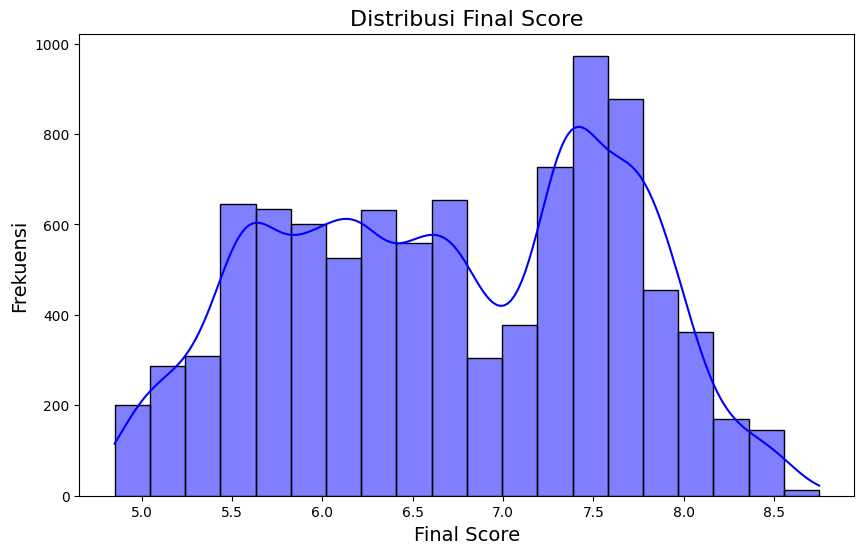

In [149]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Final_Score'], kde=True, color='blue', bins=20)

# Menambahkan judul dan label
plt.title('Distribusi Final Score', fontsize=16)
plt.xlabel('Final Score', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

# Menampilkan plot
plt.show()

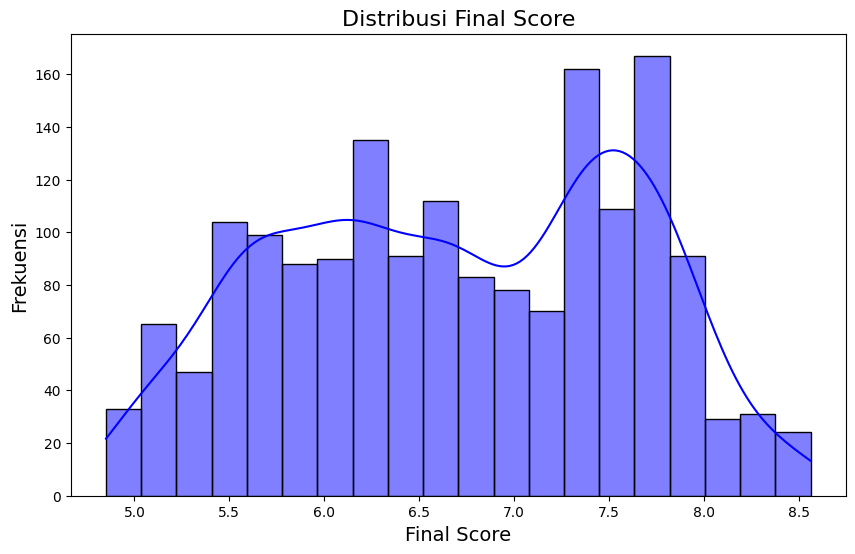

In [150]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_scores_scholar['Final_Score'], kde=True, color='blue', bins=20)

# Menambahkan judul dan label
plt.title('Distribusi Final Score', fontsize=16)
plt.xlabel('Final Score', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

# Menampilkan plot
plt.show()

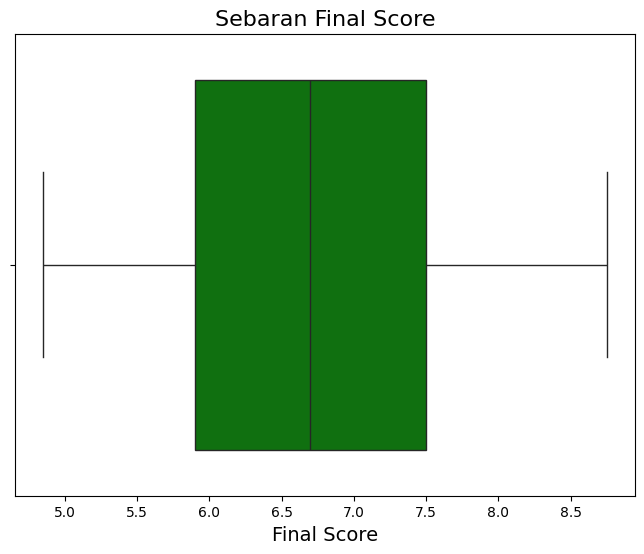

In [151]:
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Final_Score'], color='green')

# Menambahkan judul dan label
plt.title('Sebaran Final Score', fontsize=16)
plt.xlabel('Final Score', fontsize=14)

# Menampilkan plot
plt.show()

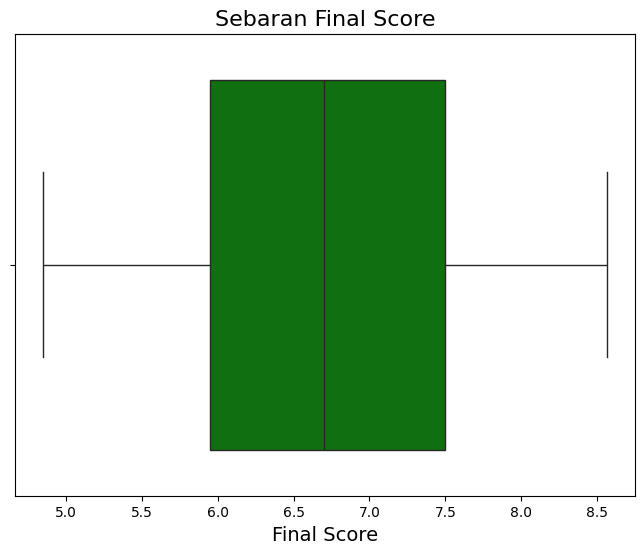

In [152]:
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_scores_scholar['Final_Score'], color='green')

# Menambahkan judul dan label
plt.title('Sebaran Final Score', fontsize=16)
plt.xlabel('Final Score', fontsize=14)

# Menampilkan plot
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\1083701713.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




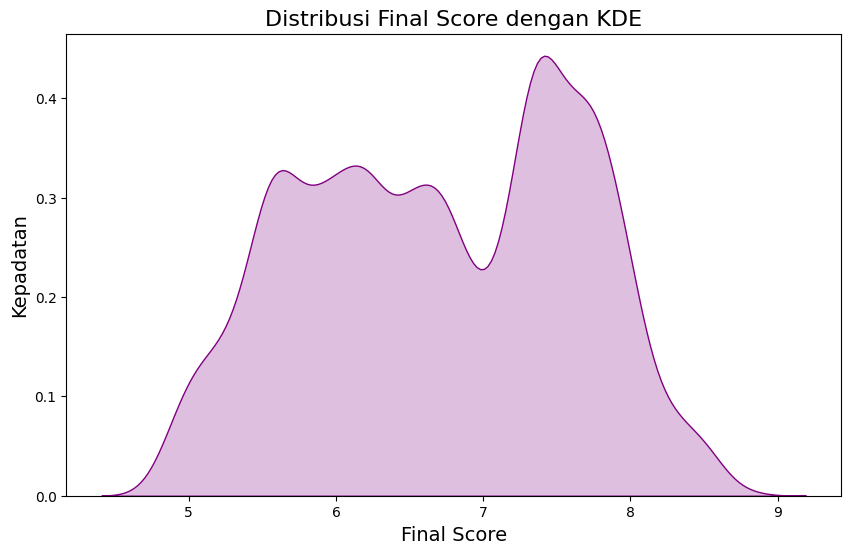

In [153]:
# Plot distribusi dengan KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['Final_Score'], shade=True, color='purple')

# Menambahkan judul dan label
plt.title('Distribusi Final Score dengan KDE', fontsize=16)
plt.xlabel('Final Score', fontsize=14)
plt.ylabel('Kepadatan', fontsize=14)

# Menampilkan plot
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\833188343.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




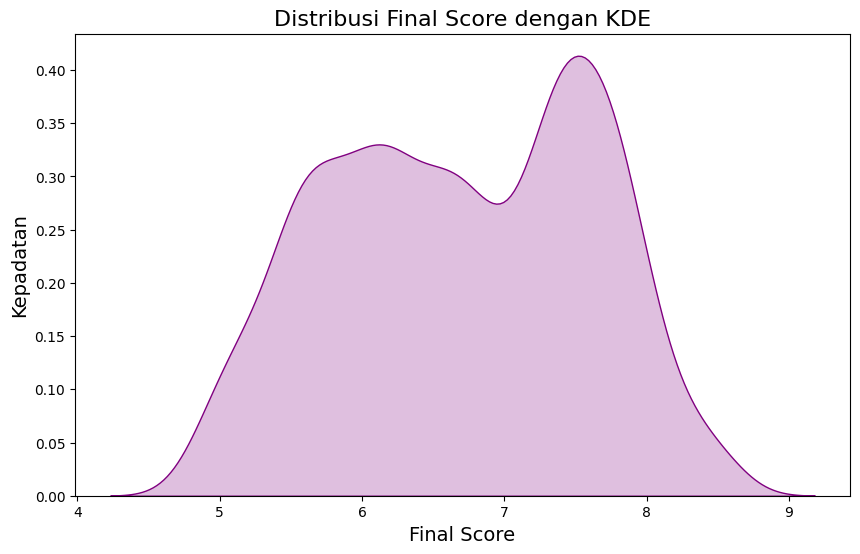

In [154]:
# Plot distribusi dengan KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(df_scores_scholar['Final_Score'], shade=True, color='purple')

# Menambahkan judul dan label
plt.title('Distribusi Final Score dengan KDE', fontsize=16)
plt.xlabel('Final Score', fontsize=14)
plt.ylabel('Kepadatan', fontsize=14)

# Menampilkan plot
plt.show()

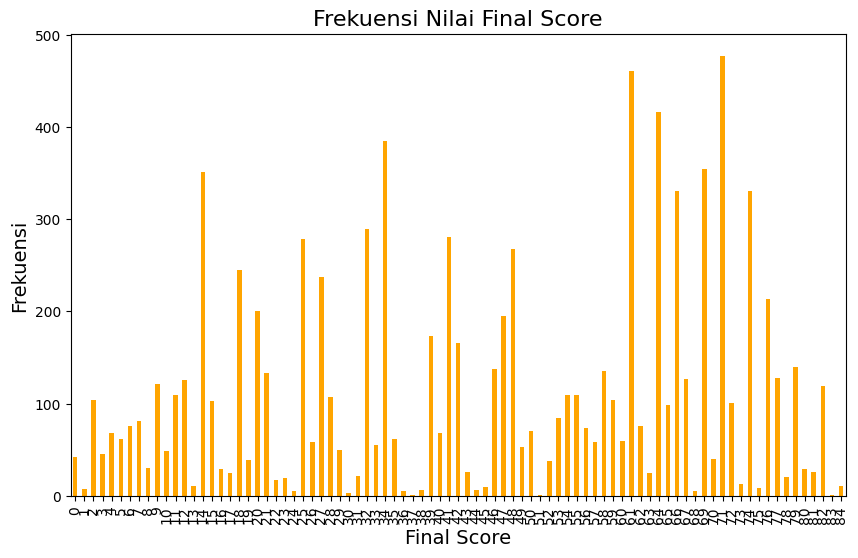

In [155]:
import matplotlib.ticker as ticker

# Menghitung nilai unik dan frekuensinya
value_counts = df_cleaned['Final_Score'].value_counts().sort_index()

# Menampilkan grafik batang
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='orange')

# Menambahkan judul dan label
plt.title('Frekuensi Nilai Final Score', fontsize=16)
plt.xlabel('Final Score', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

# Mengatur format angka di sumbu X untuk menampilkan dua angka di belakang koma
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# Menampilkan plot
plt.show()

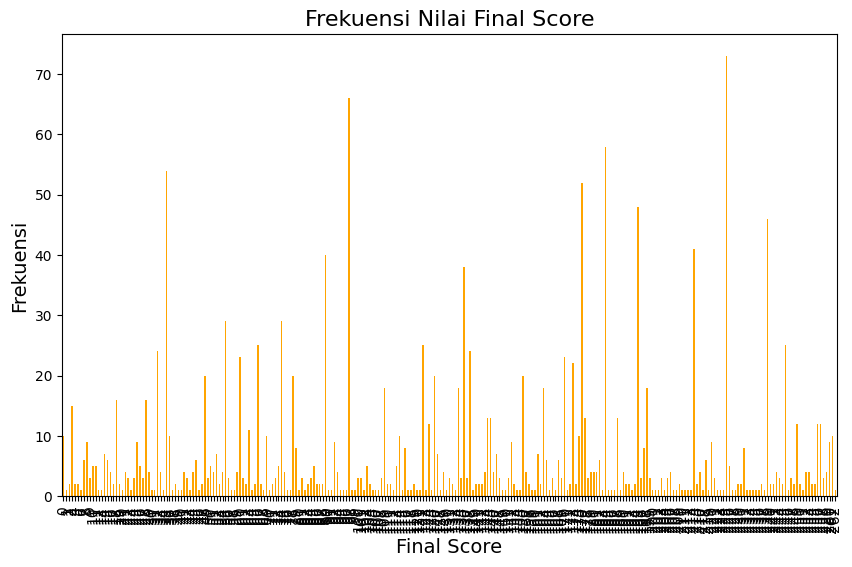

In [156]:
# Menghitung nilai unik dan frekuensinya
value_counts = df_scores_scholar['Final_Score'].value_counts().sort_index()

# Menampilkan grafik batang
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='orange')

# Menambahkan judul dan label
plt.title('Frekuensi Nilai Final Score', fontsize=16)
plt.xlabel('Final Score', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

# Mengatur format angka di sumbu X untuk menampilkan dua angka di belakang koma
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# Menampilkan plot
plt.show()

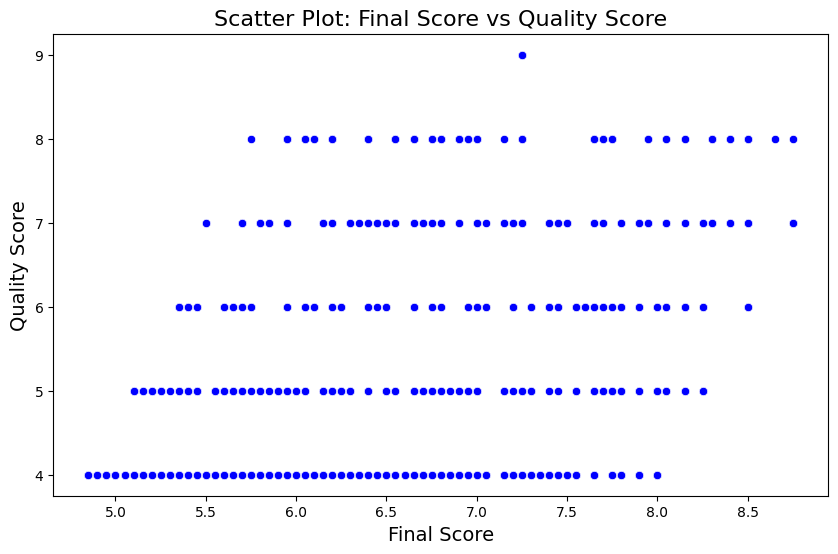

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan kita ingin melihat hubungan antara 'Final_Score' dan 'Quality_Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Final_Score', y='Quality_Score', color='blue')

# Menambahkan judul dan label
plt.title('Scatter Plot: Final Score vs Quality Score', fontsize=16)
plt.xlabel('Final Score', fontsize=14)
plt.ylabel('Quality Score', fontsize=14)

# Menampilkan plot
plt.show()

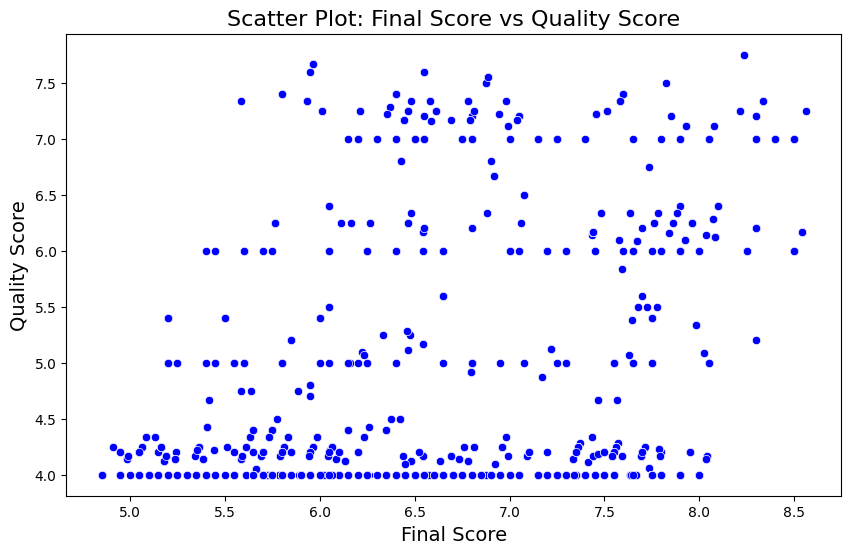

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan kita ingin melihat hubungan antara 'Final_Score' dan 'Quality_Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scores_scholar, x='Final_Score', y='Quality_Score', color='blue')

# Menambahkan judul dan label
plt.title('Scatter Plot: Final Score vs Quality Score', fontsize=16)
plt.xlabel('Final Score', fontsize=14)
plt.ylabel('Quality Score', fontsize=14)

# Menampilkan plot
plt.show()

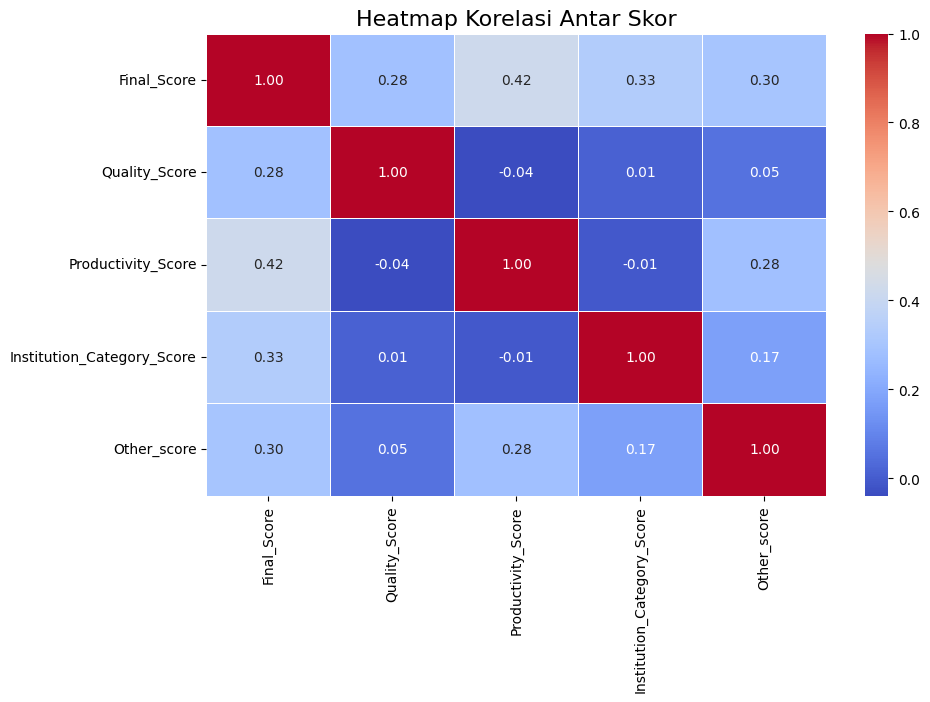

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antar kolom numerik
corr_matrix = df_cleaned[['Final_Score', 'Quality_Score', 'Productivity_Score', 'Institution_Category_Score', 'Other_score']].corr()

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Skor', fontsize=16)

# Menampilkan plot
plt.show()


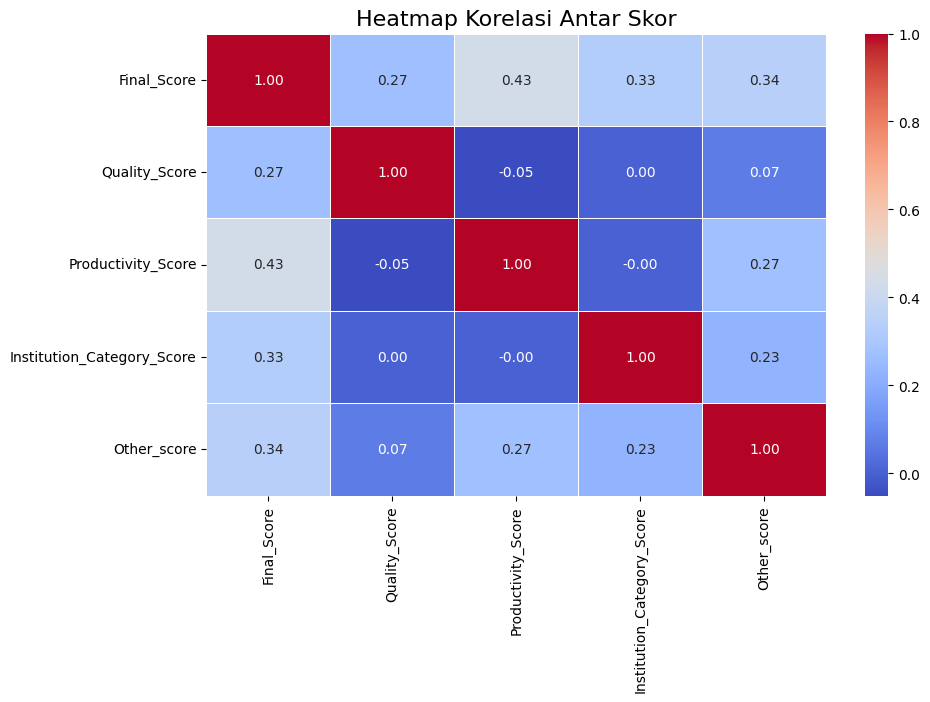

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antar kolom numerik
corr_matrix = df_scores_scholar[['Final_Score', 'Quality_Score', 'Productivity_Score', 'Institution_Category_Score', 'Other_score']].corr()

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Skor', fontsize=16)

# Menampilkan plot
plt.show()


# Klustering dengan Machine Learning

`Dalam metode Machine Learning menggunakan data yang sudah dikelompokkan ke dalam scholar name yang sesuai sehingga menghilangkan baris/value duplikat untuk diolah ke data model`

In [161]:
df_scores_scholar.isna().sum()

Scholar                       0
ISSN_score                    0
Quality_Score                 0
Productivity_Score            0
Institution_Category_Score    0
Other_score                   0
Final_Score                   0
dtype: int64

In [162]:
df_scores_scholar

Scholar  ISSN_score  Quality_Score  Productivity_Score  \
0                   Abad E.        10.0       4.000000                 6.0   
1               Abdallah M.         4.0       7.000000                 7.0   
2                 Abegaz A.        10.0       4.000000                 5.0   
3                 Absetz S.         4.0       4.166667                 8.0   
4               Acampora A.         4.0       4.000000                 7.0   
...                     ...         ...            ...                 ...   
1703        von Kaufmann R.        10.0       6.000000                 5.0   
1704     Álvarez-Miranda E.        10.0       4.000000                 7.0   
1705  álvarez Indacochea A.         4.0       4.200000                 6.0   
1706               Łapot A.        10.0       4.000000                 6.0   
1707             Šuligoj M.         4.0       5.000000                 6.0   

      Institution_Category_Score  Other_score  Final_Score  
0                            6.0          8.0     6.700000  
1                            6.0         10.0     6.400000  
2                           10.0         10.0     7.250000  
3                           10.0         10.0     6.541667  
4                           10.0         10.0     6.250000  
...                          ...          ...          ...  
1703                        10.0          9.0     7.650000  
1704                         6.0          7.0     6.850000  
1705                         6.0          6.0     5.050000  
1706                        10.0         10.0     7.500000  
1707                        10.0         10.0     6.250000  

[1708 rows x 7 columns]

In [163]:
df_ML = df_scores_scholar[['ISSN_score','Quality_Score','Productivity_Score','Institution_Category_Score','Other_score']].copy()

In [164]:
df_ML

ISSN_score  Quality_Score  Productivity_Score  \
0           10.0       4.000000                 6.0   
1            4.0       7.000000                 7.0   
2           10.0       4.000000                 5.0   
3            4.0       4.166667                 8.0   
4            4.0       4.000000                 7.0   
...          ...            ...                 ...   
1703        10.0       6.000000                 5.0   
1704        10.0       4.000000                 7.0   
1705         4.0       4.200000                 6.0   
1706        10.0       4.000000                 6.0   
1707         4.0       5.000000                 6.0   

      Institution_Category_Score  Other_score  
0                            6.0          8.0  
1                            6.0         10.0  
2                           10.0         10.0  
3                           10.0         10.0  
4                           10.0         10.0  
...                          ...          ...  
1703                        10.0          9.0  
1704                         6.0          7.0  
1705                         6.0          6.0  
1706                        10.0         10.0  
1707                        10.0         10.0  

[1708 rows x 5 columns]

In [165]:
for column in df_ML.columns:
    print(f'========={column}=========')
    display(df_ML[column].value_counts())
    print()

=========ISSN_score=========


ISSN_score
4.000000     794
10.000000    793
8.000000      96
7.000000       6
6.869565       4
7.750000       4
6.000000       2
6.142857       1
5.764706       1
5.250000       1
6.727273       1
6.571429       1
5.666667       1
8.888889       1
6.666667       1
5.333333       1
Name: count, dtype: int64


=========Quality_Score=========


Quality_Score
4.000000    951
6.000000     84
4.200000     75
7.000000     73
5.000000     69
           ... 
6.153846      1
4.181818      1
4.875000      1
6.750000      1
5.384615      1
Name: count, Length: 71, dtype: int64


=========Productivity_Score=========


Productivity_Score
6.000000    617
7.000000    451
5.000000    432
8.000000    172
5.500000      5
6.500000      3
6.555556      3
5.400000      2
6.578947      2
7.230769      2
6.958333      2
6.250000      1
6.625000      1
6.666667      1
6.357143      1
6.800000      1
5.647059      1
6.538462      1
6.600000      1
6.941176      1
6.846154      1
7.583333      1
5.555556      1
5.545455      1
5.857143      1
6.454545      1
6.444444      1
6.111111      1
Name: count, dtype: int64


=========Institution_Category_Score=========


Institution_Category_Score
10.000000    1178
6.000000      468
8.000000       46
8.315789        2
8.888889        2
7.777778        2
7.428571        1
7.600000        1
8.666667        1
7.857143        1
8.500000        1
7.000000        1
8.400000        1
9.090909        1
8.222222        1
7.500000        1
Name: count, dtype: int64


=========Other_score=========


Other_score
10.000000    616
9.000000     464
8.000000     454
7.000000      91
6.000000      40
5.000000       5
8.500000       5
8.375000       4
8.521739       4
9.291667       2
8.800000       2
8.555556       2
9.500000       2
9.230769       2
8.625000       2
9.454545       2
9.791667       1
7.625000       1
7.500000       1
9.687500       1
8.352941       1
9.357143       1
9.111111       1
8.333333       1
8.909091       1
8.250000       1
7.333333       1
Name: count, dtype: int64

In [166]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ISSN_score                  1708 non-null   float64
 1   Quality_Score               1708 non-null   float64
 2   Productivity_Score          1708 non-null   float64
 3   Institution_Category_Score  1708 non-null   float64
 4   Other_score                 1708 non-null   float64
dtypes: float64(5)
memory usage: 66.8 KB


### Memisahkan Data Train dan Test

In [167]:
# Memisahkan train dan test data (80% train, 20% test)
X_train, X_test = train_test_split(df_ML, test_size=0.2, random_state=42)

### Normalisasi/Standardisasi Data

In [168]:
from sklearn.preprocessing import StandardScaler
# Inisialisasi scaler
scaler = StandardScaler()

In [169]:
# Normalisasi data train
X_train_scaled = scaler.fit_transform(X_train)

In [170]:
# Normalisasi data test menggunakan statistik dari data train
X_test_scaled = scaler.transform(X_test)

In [171]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=df_ML.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=df_ML.columns)

In [172]:
df_ML

ISSN_score  Quality_Score  Productivity_Score  \
0           10.0       4.000000                 6.0   
1            4.0       7.000000                 7.0   
2           10.0       4.000000                 5.0   
3            4.0       4.166667                 8.0   
4            4.0       4.000000                 7.0   
...          ...            ...                 ...   
1703        10.0       6.000000                 5.0   
1704        10.0       4.000000                 7.0   
1705         4.0       4.200000                 6.0   
1706        10.0       4.000000                 6.0   
1707         4.0       5.000000                 6.0   

      Institution_Category_Score  Other_score  
0                            6.0          8.0  
1                            6.0         10.0  
2                           10.0         10.0  
3                           10.0         10.0  
4                           10.0         10.0  
...                          ...          ...  
1703                        10.0          9.0  
1704                         6.0          7.0  
1705                         6.0          6.0  
1706                        10.0         10.0  
1707                        10.0         10.0  

[1708 rows x 5 columns]

In [173]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ISSN_score                  1708 non-null   float64
 1   Quality_Score               1708 non-null   float64
 2   Productivity_Score          1708 non-null   float64
 3   Institution_Category_Score  1708 non-null   float64
 4   Other_score                 1708 non-null   float64
dtypes: float64(5)
memory usage: 66.8 KB


Interpretasi Skor Akhir=

8.0-10.0: Jurnal berkualitas tinggi, sangat direkomendasikan.

6.0-7.9: Jurnal berkualitas baik, cukup direkomendasikan.

4.0-5.9: Jurnal berkualitas sedang, perlu evaluasi lebih lanjut.

<4.0: Jurnal berkualitas rendah, tidak direkomendasikan.

### Algoritma Clustering dengan Machine Learning K-Means

In [174]:
from sklearn.cluster import KMeans

# Inisialisasi model K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  

# Latih model pada data train
kmeans.fit(X_train_scaled)

# Prediksi cluster untuk data train dan test
X_train['Cluster K-Means'] = kmeans.predict(X_train_scaled)
X_test['Cluster K-Means'] = kmeans.predict(X_test_scaled)

In [175]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X_train_scaled, X_train['Cluster K-Means'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2675347715829667


In [176]:
X_test['Cluster K-Means'].value_counts()

Cluster K-Means
0    124
2    121
1     52
3     45
Name: count, dtype: int64

Silhouette Score adalah metrik evaluasi yang mengukur seberapa baik data dikelompokkan dalam clustering. Nilainya berkisar antara -1 hingga 1. Nilai Silhouette Score: 0.2675347715829667 memiliki interpretasi hasil Clustering dengan Machine Learning yang `Overlap, Cluster Tidak Jelas, dan Sub-Optimal (Tidak begitu optimal dalam penentuan jumlah clusternya)`

### Algoritma Clustering dengan Machine Learning Mean Shift

`karena K-Means kurang baik, maka kita menggunakan Mean Shift dengan alasan: tidak memerlukan jumlah cluster sebagai input, sehingga cluster yang ditemukan benar-benar berdasarkan pola data`

In [177]:
from sklearn.cluster import MeanShift

# Inisialisasi dan pelatihan Mean Shift
meanshift = MeanShift()
meanshift.fit(X_train_scaled)

# Mendapatkan label cluster untuk data training
X_train['Cluster Mean Shift'] = meanshift.labels_

In [178]:
# Untuk data test, gunakan centroid MeanShift (manual assignment)
from sklearn.metrics import pairwise_distances_argmin_min

In [179]:
# Mendapatkan centroid dari model MeanShift
centroids = meanshift.cluster_centers_

In [180]:
# Menentukan cluster terdekat untuk data test
test_labels, _ = pairwise_distances_argmin_min(X_test_scaled, centroids)
X_test['Cluster Mean Shift'] = test_labels

In [181]:
X_test['Cluster Mean Shift'].value_counts()

Cluster Mean Shift
0    342
Name: count, dtype: int64

`Karena mean shift clustering hanya menghasilkan 1 cluster data, sedangkan dari clustering domain subject management publication terdapat 4 cluster, maka saya mencoba menggunakan algoritma machine learning lain untuk menghasilkan 4 cluster`

### Algoritma Clustering dengan Machine Learning DBSCAN

`Karena Mean Shift kurang lengkap, maka saya menggunakan DBSCAN (Density-Based Spatial Clustering of Applications with Noise) yang memiliki kelebihan untuk mengelompokkan data berdasarkan kepadatan. Data dengan kepadatan rendah dianggap sebagai noise`

In [182]:
from sklearn.cluster import DBSCAN

# Inisialisasi model DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=4)

# Latih model pada data train
dbscan.fit(X_train_scaled)

# Prediksi cluster untuk data train
X_train['Cluster DBSCAN'] = dbscan.labels_

In [183]:
# Prediksi cluster untuk data test
X_test['Cluster DBSCAN'] = dbscan.fit_predict(X_test_scaled)

In [184]:
# Evaluasi Silhouette Score untuk data test
silhouette_test = silhouette_score(X_test_scaled, X_test['Cluster DBSCAN'])
print(f"Silhouette Score for Test Data: {silhouette_test}")

Silhouette Score for Test Data: 0.2995125696471458


In [185]:
X_test['Cluster DBSCAN'].value_counts()

Cluster DBSCAN
-1     143
 3      19
 4      13
 6      13
 11     13
 2      11
 14     11
 9      11
 8      10
 12      8
 13      8
 1       7
 10      7
 17      6
 5       6
 22      6
 26      5
 0       5
 7       4
 15      4
 18      4
 16      4
 20      4
 19      4
 21      4
 23      4
 24      4
 25      4
Name: count, dtype: int64

`Karena DBSCAN menghasilkan cluster lebih dari 4, sehingga perlu mengevaluasi data menggunakan algoritma ML lain`

### Algoritma Clustering dengan Machine Learning Gaussian Mixture Model

In [186]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X_train_scaled)

# Prediksi cluster untuk data train dan test
X_train['Cluster GMM'] = gmm.predict(X_train_scaled)
X_test['Cluster GMM'] = gmm.predict(X_test_scaled)

In [187]:
# Hitung Silhouette Score untuk data test
silhouette_test = silhouette_score(X_test_scaled, X_test['Cluster GMM'])
print(f"Silhouette Score for Test Data: {silhouette_test}")

Silhouette Score for Test Data: 0.2659835982521087


In [188]:
X_test['Cluster GMM'].value_counts()

Cluster GMM
2    128
0    114
1     52
3     48
Name: count, dtype: int64

`Karena nilai Silhouette Score menggunakan GMM menghasilkan nilai 0.26 atau ada nilai dalam cluster yang tumpang tindih sehingga memerlukan algoritma ML lain untuk evaluasi data train ini`

### Algoritma Clustering dengan Machine Learning Agglomerative Hierarchical

In [189]:
from sklearn.cluster import AgglomerativeClustering

# Inisialisasi model Agglomerative Hierarchical Clustering
agg_clust = AgglomerativeClustering(n_clusters=4)

# Latih model pada data train
agg_clust.fit(X_train_scaled)

AgglomerativeClustering(n_clusters=4)

In [190]:
# Prediksi cluster untuk data train dan test
X_train['Cluster Agglomerative'] = agg_clust.labels_
X_test['Cluster Agglomerative'] = agg_clust.fit_predict(X_test_scaled)

In [191]:
# Hitung Silhouette Score untuk data train
silhouette_avg = silhouette_score(X_train_scaled, X_train['Cluster Agglomerative'])
print(f"Silhouette Score for Train Data: {silhouette_avg}")

# Hitung Silhouette Score untuk data test
silhouette_test = silhouette_score(X_test_scaled, X_test['Cluster Agglomerative'])
print(f"Silhouette Score for Test Data: {silhouette_test}")

Silhouette Score for Train Data: 0.2548479130765336
Silhouette Score for Test Data: 0.253310529128094


In [192]:
X_test['Cluster Agglomerative'].value_counts()

Cluster Agglomerative
0    100
3     95
1     74
2     73
Name: count, dtype: int64

In [193]:
# !pip install hdbscan

In [194]:
import hdbscan


hdbscan_model = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10)

hdbscan_labels = hdbscan_model.fit_predict(X_train_scaled)

# Prediksi cluster untuk data train 
X_train['Cluster HDBSCAN'] = hdbscan_labels

# Prediksi cluster untuk data test 
hdbscan_test_labels = hdbscan_model.fit_predict(X_test_scaled)
X_test['Cluster HDBSCAN'] = hdbscan_test_labels

# Menggunakan KMeans untuk membagi menjadi 4 cluster, jika cluster HDBSCAN lebih dari 4
if len(set(hdbscan_labels)) > 4:
    kmeans = KMeans(n_clusters=4, random_state=42)
    X_train['Cluster HDBSCAN'] = kmeans.fit_predict(X_train_scaled)
    X_test['Cluster HDBSCAN'] = kmeans.predict(X_test_scaled)

# Silhouette Score untuk HDBSCAN pada data train
silhouette_avg = silhouette_score(X_train_scaled, X_train['Cluster HDBSCAN'])
print(f"Silhouette Score for HDBSCAN (with 4 clusters): {silhouette_avg}")

Silhouette Score for HDBSCAN (with 4 clusters): 0.2675347715829667


In [195]:
X_test['Cluster HDBSCAN'].value_counts()

Cluster HDBSCAN
0    124
2    121
1     52
3     45
Name: count, dtype: int64

In [196]:
X_train.columns

Index(['ISSN_score', 'Quality_Score', 'Productivity_Score',
       'Institution_Category_Score', 'Other_score', 'Cluster K-Means',
       'Cluster Mean Shift', 'Cluster DBSCAN', 'Cluster GMM',
       'Cluster Agglomerative', 'Cluster HDBSCAN'],
      dtype='object')

In [197]:
# Konversi X_train_scaled ke array NumPy jika perlu
if not isinstance(X_train_scaled, np.ndarray):
    X_train_scaled = X_train_scaled.to_numpy()

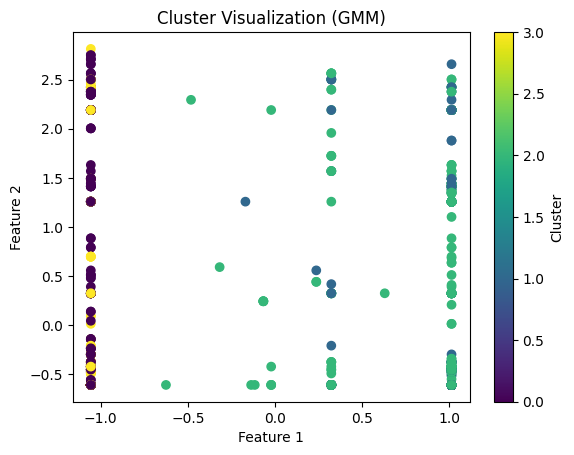

In [198]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=X_train['Cluster GMM'], cmap='viridis')
plt.title("Cluster Visualization (GMM)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

In [199]:
# Konversi X_test_scaled ke array NumPy jika perlu
if not isinstance(X_test_scaled, np.ndarray):
    X_test_scaled = X_test_scaled.to_numpy()

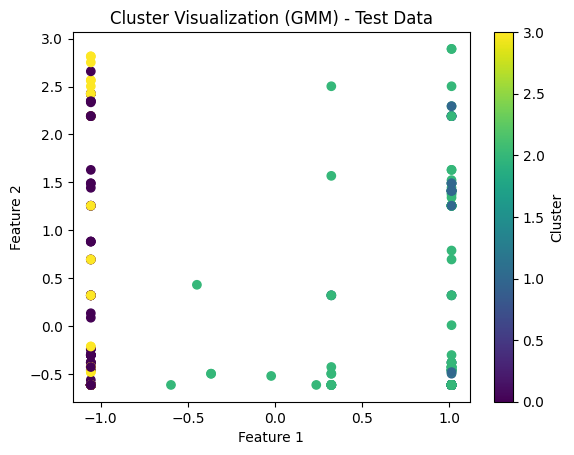

In [200]:
# Scatter plot untuk data uji
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=X_test['Cluster GMM'], cmap='viridis')
plt.title("Cluster Visualization (GMM) - Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

`Dalam data visualisasi hasil di scatter plot, menunjukkan adanya perbedaan distribusi dan kepadatan data dalam 3 area yang berbeda. Tetapi dikarenakan kluster dalam penilaian diatas memiliki 4 kelas, menjadikan algoritma machine learning kurang menunjukkan performa yang baik dalam mengelompokkan data tersebut.` 

Dalam visualisasi diatas saya menggunakan data train cluster dengan algoritma Gaussian Mixture Model (GMM)

# Pencarian Insight Hasil Clustering

In [201]:
df_cleaned

Scholar   Scholar_ID  \
0      Andrades L.  55516738600   
1      Andrades L.  55516738600   
2      Andrades L.  55516738600   
3      Andrades L.  55516738600   
4      Dimanche F.   6602124907   
...            ...          ...   
9441  Salamanca A.  54893176000   
9442  Salamanca A.  54893176000   
9443  Salamanca A.  54893176000   
9444  Salamanca A.  54893176000   
9445  Salamanca A.  54893176000   

                                           Affiliations  \
0     Department of Business Administration and Soci...   
1     Department of Business Administration and Soci...   
2     Department of Business Administration and Soci...   
3     Department of Business Administration and Soci...   
4     Ted Rogers School of Hospitality and Tourism M...   
...                                                 ...   
9441  The Haribon Foundation for the Conservation of...   
9442  The Haribon Foundation for the Conservation of...   
9443  The Haribon Foundation for the Conservation of...   
9444  The Haribon Foundation for the Conservation of...   
9445  The Haribon Foundation for the Conservation of...   

                                                  Title       Year  \
0     Destination competitiveness and tourism develo... 2017-01-01   
1     Destination competitiveness and tourism develo... 2017-01-01   
2     Destination competitiveness and tourism develo... 2017-01-01   
3     Destination competitiveness and tourism develo... 2017-01-01   
4     Destination competitiveness and tourism develo... 2017-01-01   
...                                                 ...        ...   
9441  Sustainable management of coastal wetlands in ... 1995-01-01   
9442  Sustainable management of coastal wetlands in ... 1995-01-01   
9443  Sustainable management of coastal wetlands in ... 1995-01-01   
9444  Sustainable management of coastal wetlands in ... 1995-01-01   
9445  Sustainable management of coastal wetlands in ... 1995-01-01   

                         Journal  Volume  Page_start  Page_end  Cited_by  ...  \
0             Tourism Management      62         360       376        30  ...   
1             Tourism Management      62         360       376        30  ...   
2             Tourism Management      62         360       376        30  ...   
3             Tourism Management      62         360       376        30  ...   
4             Tourism Management      62         360       376        30  ...   
...                          ...     ...         ...       ...       ...  ...   
9441  Asian Review of Accounting       3          41        57         7  ...   
9442  Asian Review of Accounting       3          41        57         7  ...   
9443  Asian Review of Accounting       3          41        57         7  ...   
9444  Asian Review of Accounting       3          41        57         7  ...   
9445  Asian Review of Accounting       3          41        57         7  ...   

     Institution_Category Institution_Category_Score Relevance_Score  \
0        Global Institute                         10               8   
1        Global Institute                         10               8   
2        Global Institute                         10               8   
3        Global Institute                         10               8   
4        Global Institute                         10               8   
...                   ...                        ...             ...   
9441         Not Credible                          6              10   
9442         Not Credible                          6              10   
9443         Not Credible                          6              10   
9444         Not Credible                          6              10   
9445         Not Credible                          6              10   

     Keyword Weight Quality_Score Volume_Score Cited_by_Score  \
0                 4           6.0           10              6   
1                 6           7.0           10              6   
2      

In [202]:
df_scores_scholar.min()

Scholar                       Abad E.
ISSN_score                        4.0
Quality_Score                     4.0
Productivity_Score                5.0
Institution_Category_Score        6.0
Other_score                       5.0
Final_Score                      4.85
dtype: object

In [203]:
df_scores_keyword

Keywords  ISSN_score  Quality_Score  \
0     (Fed-)Batch Processes Sustainable Management     8.03367       4.814815   
1                                        4Rs Tools    10.00000       4.000000   
2                              7-P Model Prototype     4.00000       4.000000   
3                                A System Of Rules     4.00000       4.000000   
4                                 A.G.U.A. Project     4.00000       4.000000   
...                                            ...         ...            ...   
1996                           Zambezi River Basin     8.00000       4.000000   
1997                                      Zanzibar    10.00000       4.000000   
1998                              Zhengning County    10.00000       6.000000   
1999                                      Zimbabwe     4.00000       4.000000   
2000                       Úbeda And Baeza (Spain)     4.00000       4.000000   

      Productivity_Score  Institution_Category_Score  Other_score  Final_Score  
0               6.239057                    8.632997     8.589226     6.925758  
1               5.000000                    8.666667     8.000000     6.850000  
2               6.000000                    6.000000     9.000000     5.300000  
3               5.000000                   10.000000     8.000000     5.550000  
4               5.000000                    6.000000     7.000000     4.850000  
...                  ...                         ...          ...          ...  
1996            5.000000                   10.000000     9.000000     6.650000  
1997            7.000000                    8.000000     8.000000     7.250000  
1998            6.000000                   10.000000     8.000000     7.800000  
1999            5.000000                   10.000000     9.000000     5.650000  
2000            6.000000                   10.000000     9.000000     5.900000  

[2001 rows x 7 columns]

In [204]:
X_test

ISSN_score  Quality_Score  Productivity_Score  \
567         10.0            4.0                 8.0   
1325         4.0            4.0                 8.0   
1350        10.0            5.0                 6.0   
115         10.0            4.0                 7.0   
453          4.0            4.0                 5.0   
...          ...            ...                 ...   
893         10.0            4.0                 7.0   
1110        10.0            4.0                 6.0   
128          4.0            4.2                 6.0   
405         10.0            4.0                 7.0   
874         10.0            6.0                 7.0   

      Institution_Category_Score  Other_score  Cluster K-Means  \
567                          6.0          9.0                1   
1325                        10.0         10.0                0   
1350                        10.0          9.0                2   
115                         10.0         10.0                2   
453                         10.0          8.0                0   
...                          ...          ...              ...   
893                         10.0          9.0                2   
1110                        10.0          9.0                2   
128                         10.0          8.0                0   
405                         10.0          8.0                2   
874                          6.0         10.0                1   

      Cluster Mean Shift  Cluster DBSCAN  Cluster GMM  Cluster Agglomerative  \
567                    0               0            1                      2   
1325                   0               1            0                      0   
1350                   0              -1            2                      1   
115                    0               2            2                      3   
453                    0               3            0                      0   
...                  ...             ...          ...                    ...   
893                    0              12            2                      3   
1110                   0              14            2                      3   
128                    0              -1            0                      0   
405                    0              -1            2                      3   
874                    0              -1            1                      1   

      Cluster HDBSCAN  
567                 1  
1325                0  
1350                2  
115                 2  
453                 0  
...               ...  
893                 2  
1110                2  
128                 0  
405                 2  
874                 1  

[342 rows x 11 columns]

In [205]:
X_train

ISSN_score  Quality_Score  Productivity_Score  \
590         10.0           7.25                 6.0   
1551        10.0           4.00                 8.0   
420          8.0           4.00                 6.0   
425         10.0           4.00                 6.0   
857         10.0           5.00                 6.0   
...          ...            ...                 ...   
1130        10.0           6.40                 6.0   
1294         8.0           7.00                 5.0   
860          4.0           6.00                 5.0   
1459         8.0           5.00                 6.0   
1126         8.0           4.00                 5.0   

      Institution_Category_Score  Other_score  Cluster K-Means  \
590                          6.0          8.0                1   
1551                         6.0         10.0                1   
420                          6.0          6.0                3   
425                         10.0         10.0                2   
857                         10.0         10.0                2   
...                          ...          ...              ...   
1130                        10.0         10.0                2   
1294                         6.0          9.0                1   
860                         10.0          5.0                3   
1459                         6.0          6.0                3   
1126                        10.0          8.0                2   

      Cluster Mean Shift  Cluster DBSCAN  Cluster GMM  Cluster Agglomerative  \
590                    0              -1            1                      2   
1551                   0               0            1                      1   
420                    0              -1            1                      1   
425                    0               1            2                      3   
857                    0               2            2                      3   
...                  ...             ...          ...                    ...   
1130                   0              48            2                      2   
1294                   0              -1            1                      2   
860                    0              -1            0                      1   
1459                   0              -1            1                      1   
1126                   0              36            2                      3   

      Cluster HDBSCAN  
590                 1  
1551                1  
420                 3  
425                 2  
857                 2  
...               ...  
1130                2  
1294                1  
860                 3  
1459                3  
1126                2  

[1366 rows x 11 columns]

In [206]:
# Konversi kolom Final_Score menjadi float di semua DataFrame
df_cleaned['Final_Score'] = pd.to_numeric(df_cleaned['Final_Score'], errors='coerce')
df_scores_scholar['Final_Score'] = pd.to_numeric(df_scores_scholar['Final_Score'], errors='coerce')
df_scores_keyword['Final_Score'] = pd.to_numeric(df_scores_keyword['Final_Score'], errors='coerce')
X_test['Cluster GMM'] = pd.to_numeric(X_test['Cluster GMM'], errors='coerce')
X_train['Cluster GMM'] = pd.to_numeric(X_train['Cluster GMM'], errors='coerce')

In [207]:
df_final = df_cleaned.copy()
scholar_final = df_scores_scholar.copy()
keyword_final = df_scores_keyword.copy()
hasil_test = X_test.copy()
data_uji = X_train.copy()

In [208]:
def kategori_skor(final_score):
    if final_score >= 8.0:
        return "Berkualitas Tinggi"
    elif 6.0 <= final_score < 8.0:
        return "Berkualitas Baik"
    elif 4.0 <= final_score < 6.0:
        return "Berkualitas Sedang"
    else:
        return "Berkualitas Rendah"

# Terapkan fungsi kategori_skor
df_final['kategori_skor'] = df_cleaned['Final_Score'].apply(kategori_skor)
scholar_final['kategori_skor'] = df_scores_scholar['Final_Score'].apply(kategori_skor)
keyword_final['kategori_skor'] = df_scores_keyword['Final_Score'].apply(kategori_skor)

In [209]:
# Buat mapping nilai cluster ke kategori kualitas
cluster_to_quality = {
    0: "Berkualitas Rendah",
    1: "Berkualitas Sedang",
    2: "Berkualitas Baik",
    3: "Berkualitas Tinggi"
}

# Terapkan mapping ke kolom cluster di hasil_test dan data_uji
hasil_test['kategori_skor'] = X_test['Cluster GMM'].replace(cluster_to_quality)
data_uji['kategori_skor'] = X_train['Cluster GMM'].replace(cluster_to_quality)

In [210]:
df_final['kategori_skor'].value_counts()

kategori_skor
Berkualitas Baik      6318
Berkualitas Sedang    2440
Berkualitas Tinggi     688
Name: count, dtype: int64

In [211]:
scholar_final['kategori_skor'].value_counts()

kategori_skor
Berkualitas Baik      1155
Berkualitas Sedang     444
Berkualitas Tinggi     109
Name: count, dtype: int64

In [212]:
keyword_final['kategori_skor'].value_counts()

kategori_skor
Berkualitas Baik      1312
Berkualitas Sedang     584
Berkualitas Tinggi     105
Name: count, dtype: int64

In [213]:
hasil_test['kategori_skor'].value_counts()

kategori_skor
Berkualitas Baik      128
Berkualitas Rendah    114
Berkualitas Sedang     52
Berkualitas Tinggi     48
Name: count, dtype: int64

In [214]:
data_uji['kategori_skor'].value_counts()

kategori_skor
Berkualitas Baik      546
Berkualitas Rendah    431
Berkualitas Tinggi    201
Berkualitas Sedang    188
Name: count, dtype: int64

In [263]:
df_final['kategori_skor'].value_counts()

kategori_skor
Berkualitas Baik      6318
Berkualitas Sedang    2440
Berkualitas Tinggi     688
Name: count, dtype: int64

In [268]:
scholar_final['kategori_skor'].value_counts()

kategori_skor
Berkualitas Baik      1155
Berkualitas Sedang     444
Berkualitas Tinggi     109
Name: count, dtype: int64

In [266]:
cluster_analysis = scholar_final.groupby(['Final_Score', 'kategori_skor']).size().reset_index(name='Jumlah')
cluster_analysis

Final_Score       kategori_skor  Jumlah
0       4.850000  Berkualitas Sedang      10
1       4.912500  Berkualitas Sedang       1
2       4.950000  Berkualitas Sedang       2
3       4.950000  Berkualitas Sedang      15
4       4.985714  Berkualitas Sedang       2
..           ...                 ...     ...
258     8.333333  Berkualitas Tinggi       3
259     8.400000  Berkualitas Tinggi       4
260     8.500000  Berkualitas Tinggi       9
261     8.541667  Berkualitas Tinggi      10
262     8.562500  Berkualitas Tinggi       1

[263 rows x 3 columns]

In [215]:
cluster_analysis = df_final.groupby(['Final_Score', 'kategori_skor']).size().reset_index(name='Jumlah')
cluster_analysis

Final_Score       kategori_skor  Jumlah
0          4.85  Berkualitas Sedang      42
1          4.90  Berkualitas Sedang       8
2          4.95  Berkualitas Sedang     104
3          5.00  Berkualitas Sedang      46
4          5.05  Berkualitas Sedang      68
..          ...                 ...     ...
80         8.30  Berkualitas Tinggi      29
81         8.40  Berkualitas Tinggi      26
82         8.50  Berkualitas Tinggi     119
83         8.65  Berkualitas Tinggi       1
84         8.75  Berkualitas Tinggi      11

[85 rows x 3 columns]

In [260]:
cluster_analysis.value_counts().sum()

np.int64(85)

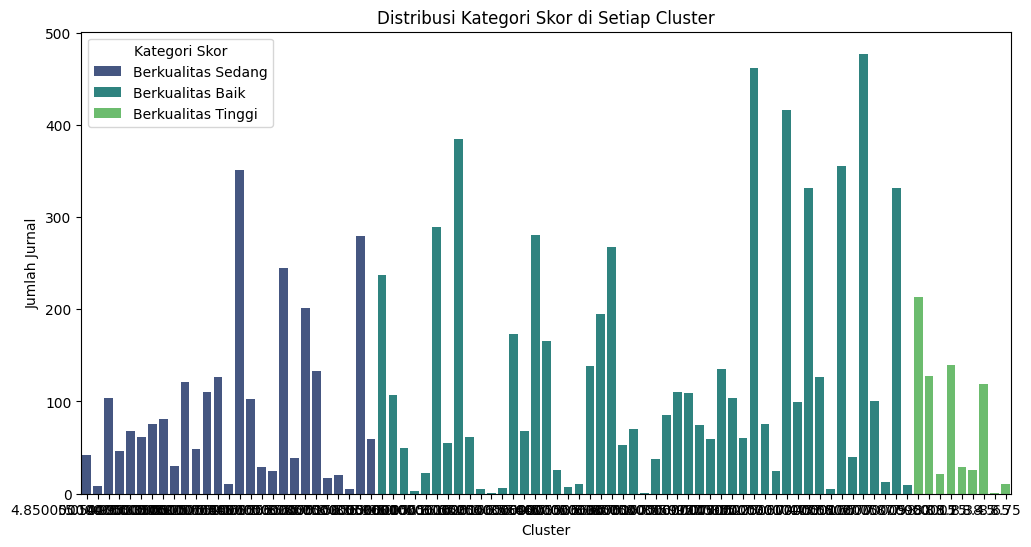

In [216]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='Final_Score', hue='kategori_skor', palette='viridis')
plt.title("Distribusi Kategori Skor di Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Jurnal")
plt.legend(title="Kategori Skor")
plt.show()

In [217]:
df_final['Year'] = pd.to_datetime(df_final['Year']).dt.year
df_2008 = df_final[df_final['Year'] == 2008]
df_2008.columns

Index(['Scholar', 'Scholar_ID', 'Affiliations', 'Title', 'Year', 'Journal',
       'Volume', 'Page_start', 'Page_end', 'Cited_by', 'Link', 'Keywords',
       'Document_type', 'DOI', 'ISSN', 'Language of Original Document',
       'Abbreviated Source Title', 'Publication Stage', 'Source', 'EID',
       'References', 'Number_of_References', 'References_Score',
       'Language_Score', 'Other_score', 'Institution_Category',
       'Institution_Category_Score', 'Relevance_Score', 'Keyword Weight',
       'Quality_Score', 'Volume_Score', 'Cited_by_Score', 'Productivity_Score',
       'ISSN_score', 'Final_Score', 'kategori_skor'],
      dtype='object')

In [218]:
# Hitung jumlah jurnal per tahun
journal_trend = df_final.groupby('Year').size()
journal_trend

Year
1992      10
1993      12
1995      15
1996      25
1997      25
1998      30
1999      30
2000      17
2001      41
2002      85
2003      58
2004      79
2005      91
2006     153
2007     112
2008     247
2009     205
2010     256
2011     360
2012     497
2013     606
2014     748
2015     936
2016     882
2017    1115
2018    1318
2019    1493
dtype: int64

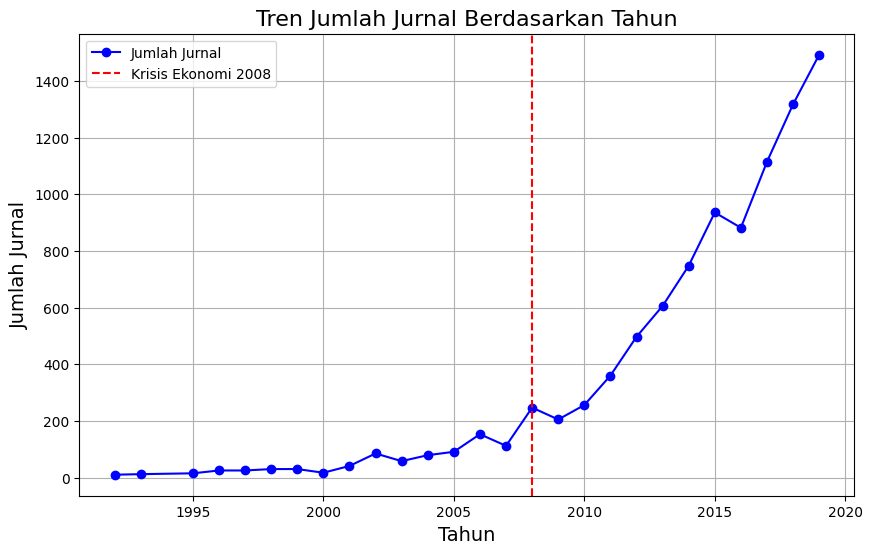

In [219]:
# Plot Line Chart
plt.figure(figsize=(10, 6))
plt.plot(journal_trend.index, journal_trend.values, marker='o', color='blue', label='Jumlah Jurnal')

# Tambahkan garis vertikal untuk menyoroti tahun 2008
plt.axvline(x=2008, color='red', linestyle='--', label='Krisis Ekonomi 2008')

# Tambahkan label, judul, dan legenda
plt.title('Tren Jumlah Jurnal Berdasarkan Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Jurnal', fontsize=14)
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

Dari Line Chart Tren Jumlah Jurnal Berdasarkan Tahun: 

1. `Jumlah jurnal meningkat dari tahun ke tahun, ini menunjukkan adanya peningkatan perhatian atau fokus terhadap topik yang relevan dalam penelitian, seperti keberlanjutan atau dampak krisis ekonomi.`
2. Relevansi Keberlanjutan : `Tren menunjukkan peningkatan yang terus berlanjut setelah 2008, ini bisa mengindikasikan bahwa krisis ekonomi memicu kesadaran jangka panjang terhadap pentingnya keberlanjutan manajemen publikasi terkait subjek ekonomi.`
3. Perubahan Minat Penelitian : `Jumlah jurnal sebelum 2008 relatif rendah dibandingkan dengan setelah 2008, ini menunjukkan bahwa krisis ekonomi memicu perhatian lebih besar terhadap topik-topik manajemen publikasi seputar subjek ekonomi.`

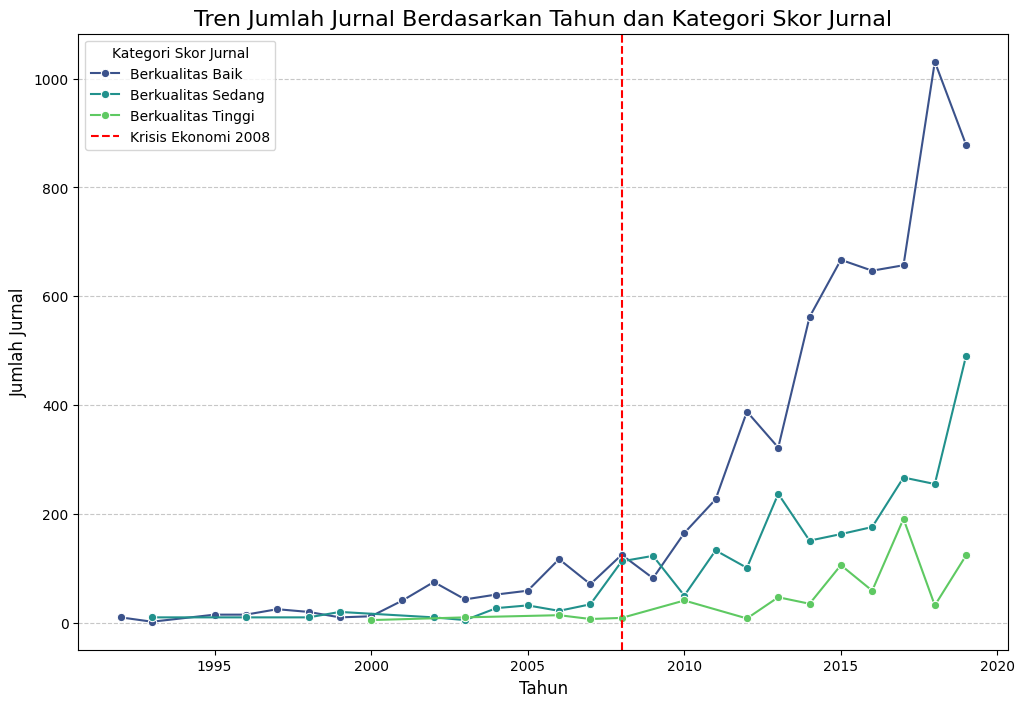

In [220]:
# Grupkan data berdasarkan tahun dan kategori skor jurnal
df_trend = df_final.groupby(['Year', 'kategori_skor']).size().reset_index(name='Count')

# Plot line chart dengan kategori skor jurnal
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_trend, x='Year', y='Count', hue='kategori_skor', marker='o', palette='viridis')

# Tambahkan garis vertikal untuk menyoroti tahun 2008
plt.axvline(x=2008, color='red', linestyle='--', label='Krisis Ekonomi 2008')

# Tambahkan judul dan label
plt.title('Tren Jumlah Jurnal Berdasarkan Tahun dan Kategori Skor Jurnal', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Jurnal', fontsize=12)
plt.legend(title='Kategori Skor Jurnal', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight:
1. Jurnal berkualitas tinggi baru muncul pada tahun 2000 dan mendapatkan posisi terendah pada jumlah jurnalnya, kemudian mengalami tren stabil sampai di 2008 mengalami peningkatan.
2. Jurnal berkualitas sedang mendapatkan peringkat kedua tertinggi, dan di 2008 mengalami tren yang meningkat dan fluktuatif sampai setelahnya.
3. Jurnal berkualitas baik mendapat peringkat paling besar dalam jumlah jurnalnya, sampai di 2008 mengalami penurunan pada tren, tetapi setelahnya mengalami peningkatan. 

Kesimpulan:

1. Dampak Krisis Ekonomi 2008:
Krisis ekonomi memengaruhi distribusi kualitas jurnal, dengan peningkatan fokus pada jurnal berkualitas tinggi setelah tahun tersebut.

2. Peran Jurnal Berkualitas Baik:
Jurnal berkualitas baik tetap menjadi tulang punggung publikasi ilmiah, meskipun sempat menurun pada 2008.

3. Konsistensi Jurnal Berkualitas Sedang:
Kategori ini menunjukkan dinamika yang fluktuatif, mencerminkan kebutuhan untuk menyeimbangkan kuantitas dan kualitas(mungkin karena aksesibilitas atau relevansinya dengan kebutuhan umum).

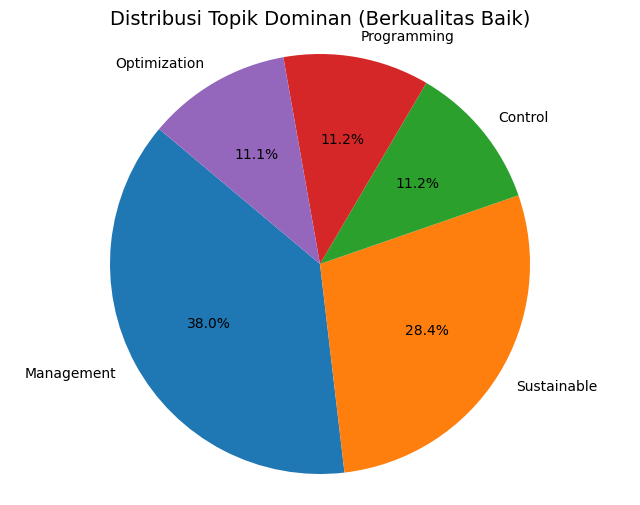

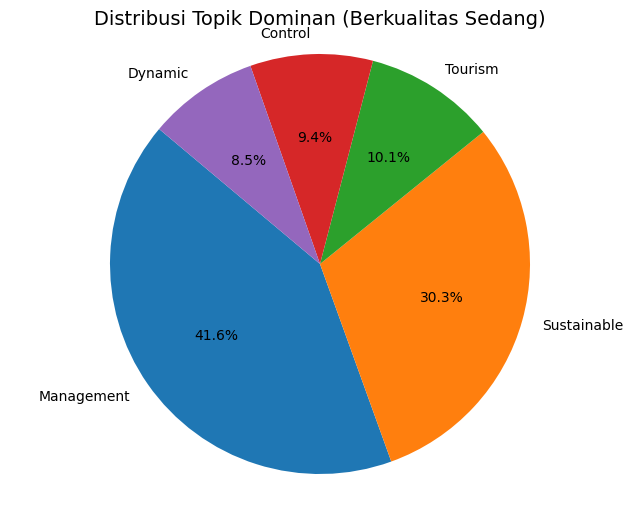

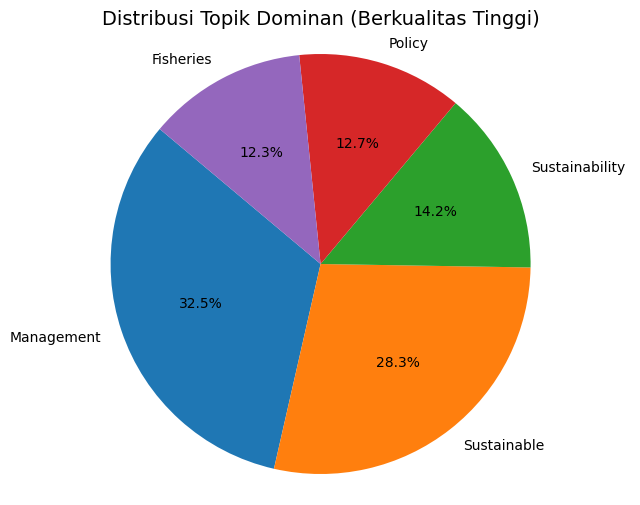

In [221]:
from collections import Counter
import matplotlib.colors as mcolors

# Pisahkan keywords berdasarkan kategori skor jurnal
keywords_per_category = df_final.groupby('kategori_skor')['Keywords'].apply(lambda x: ' '.join(x))

# Hitung frekuensi kata untuk setiap kategori
top_keywords = {}
for category, keywords in keywords_per_category.items():
    word_counts = Counter(keywords.split())
    top_keywords[category] = word_counts.most_common(5)  # Ambil 5 topik dominan

# Buat pie chart untuk setiap kategori
for category, keywords in top_keywords.items():
    labels, counts = zip(*keywords)

    # Tentukan warna khusus untuk pie chart
    custom_colors = list(mcolors.TABLEAU_COLORS.values())[:len(labels)]  # Ambil warna dari palet Tableau

    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)
    plt.title(f'Distribusi Topik Dominan ({category})', fontsize=14)
    plt.axis('equal')
    plt.show()

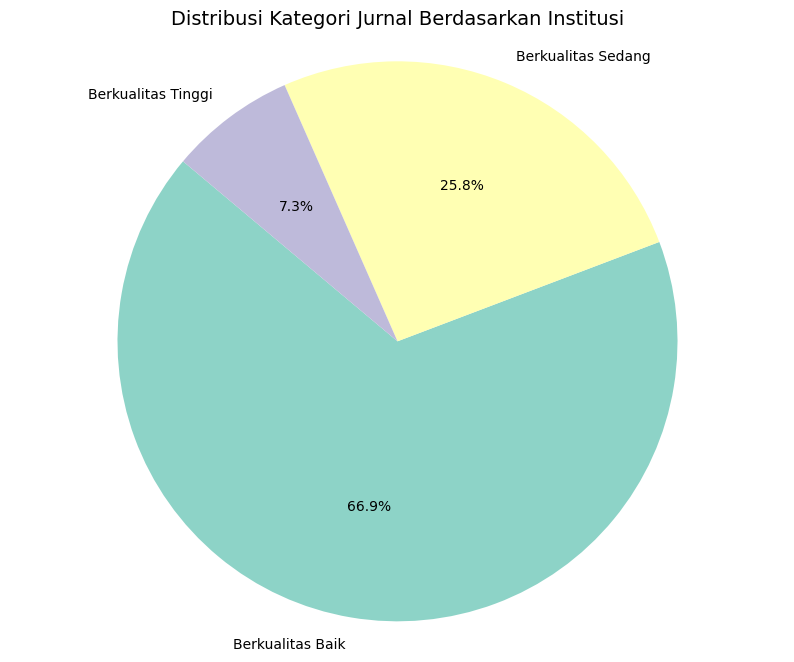

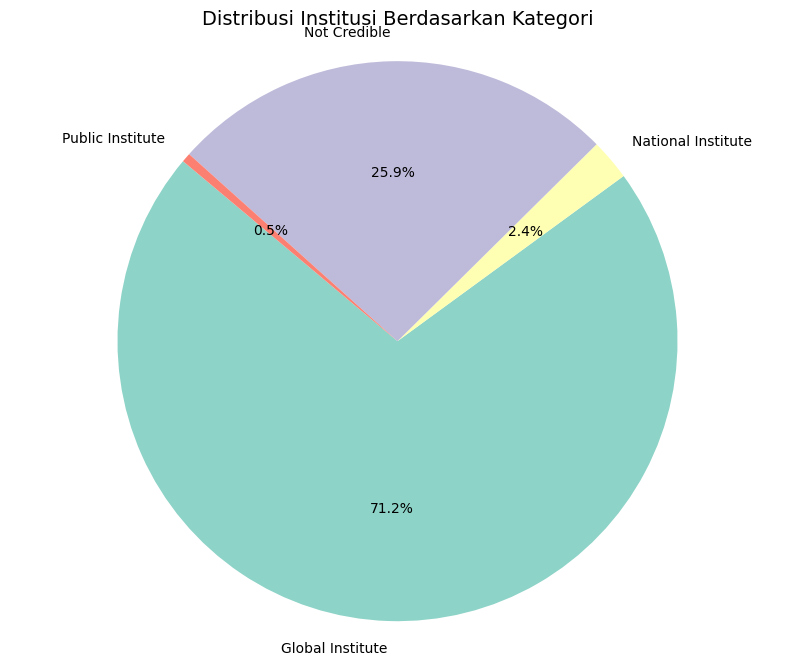

In [222]:
# Hitung jumlah jurnal berdasarkan kategori institusi dan kategori skor
institusi_per_category = df_final.groupby(['Institution_Category', 'kategori_skor']).size().unstack(fill_value=0)

# Totalkan untuk setiap kategori skor
total_per_category = institusi_per_category.sum(axis=0)

# Buat pie chart untuk distribusi kategori berdasarkan institusi
plt.figure(figsize=(10, 8))
plt.pie(total_per_category, labels=total_per_category.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribusi Kategori Jurnal Berdasarkan Institusi', fontsize=14)
plt.axis('equal')
plt.show()

# Buat pie chart untuk distribusi institusi berdasarkan kategori
total_per_affiliation = institusi_per_category.sum(axis=1)
plt.figure(figsize=(10, 8))
plt.pie(total_per_affiliation, labels=total_per_affiliation.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribusi Institusi Berdasarkan Kategori', fontsize=14)
plt.axis('equal')
plt.show()


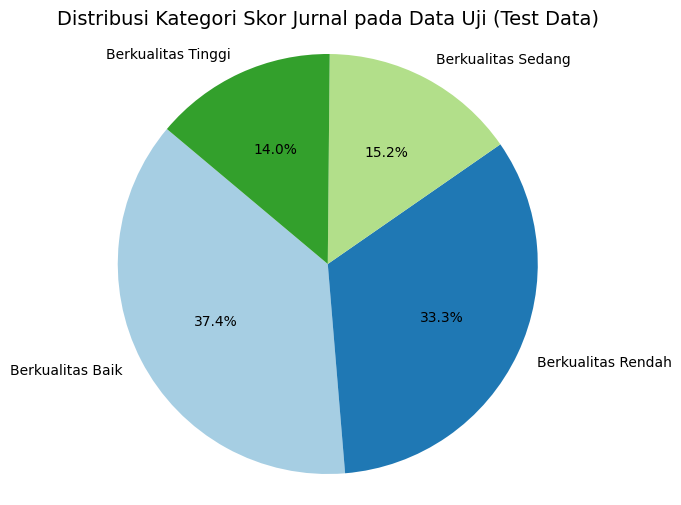

In [223]:
# Hitung jumlah jurnal berdasarkan kategori skor
kategori_skor_counts = hasil_test['kategori_skor'].value_counts()

# Buat pie chart untuk distribusi kategori skor pada data uji
plt.figure(figsize=(8, 6))
plt.pie(kategori_skor_counts, labels=kategori_skor_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribusi Kategori Skor Jurnal pada Data Uji (Test Data)', fontsize=14)
plt.axis('equal')
plt.show()

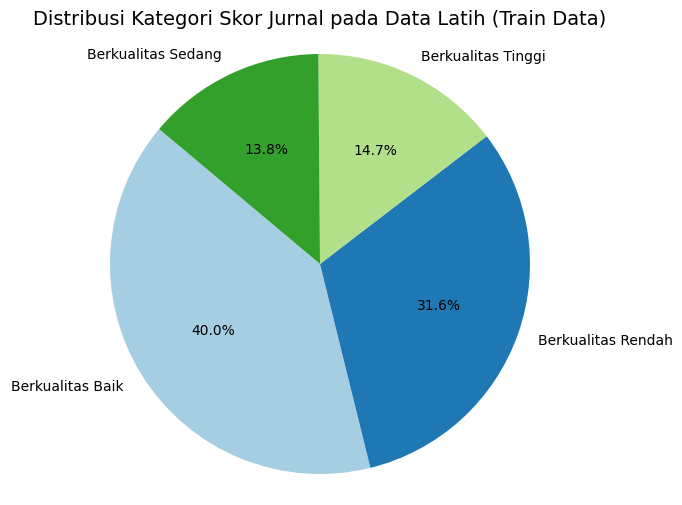

In [224]:
# Hitung jumlah jurnal berdasarkan kategori skor
kategori_skor_counts_train = data_uji['kategori_skor'].value_counts()

# Buat pie chart untuk distribusi kategori skor pada data latih
plt.figure(figsize=(8, 6))
plt.pie(kategori_skor_counts_train, labels=kategori_skor_counts_train.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribusi Kategori Skor Jurnal pada Data Latih (Train Data)', fontsize=14)
plt.axis('equal')
plt.show()

In [225]:
# Hitung jumlah jurnal per kategori skor di tahun 2008
category_counts_2008 = df_2008['kategori_skor'].value_counts()
print(df_2008['Keywords'].isnull().sum())  # Mengecek jumlah nilai kosong
print(df_2008['Keywords'].str.strip().eq('').sum())  # Mengecek jumlah nilai yang hanya berisi spasi

0
0


In [226]:
df_2007 = df_final[df_final['Year'] == 2007]
df_2007.columns
df_2007.info()
category_counts_2007 = df_2007['kategori_skor'].value_counts()
category_counts_2007.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 997 to 9366
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Scholar                        112 non-null    object 
 1   Scholar_ID                     112 non-null    int64  
 2   Affiliations                   112 non-null    object 
 3   Title                          112 non-null    object 
 4   Year                           112 non-null    int32  
 5   Journal                        112 non-null    object 
 6   Volume                         112 non-null    int64  
 7   Page_start                     112 non-null    int64  
 8   Page_end                       112 non-null    int64  
 9   Cited_by                       112 non-null    int64  
 10  Link                           112 non-null    object 
 11  Keywords                       112 non-null    object 
 12  Document_type                  112 non-null    objec

In [227]:
df_2009 = df_final[df_final['Year'] == 2009]
df_2009.columns
df_2009.info()
category_counts_2009 = df_2009['kategori_skor'].value_counts()
category_counts_2009.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 501 to 9300
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Scholar                        205 non-null    object 
 1   Scholar_ID                     205 non-null    int64  
 2   Affiliations                   205 non-null    object 
 3   Title                          205 non-null    object 
 4   Year                           205 non-null    int32  
 5   Journal                        205 non-null    object 
 6   Volume                         205 non-null    int64  
 7   Page_start                     205 non-null    int64  
 8   Page_end                       205 non-null    int64  
 9   Cited_by                       205 non-null    int64  
 10  Link                           205 non-null    object 
 11  Keywords                       205 non-null    object 
 12  Document_type                  205 non-null    objec

In [228]:
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 141 to 9334
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Scholar                        247 non-null    object 
 1   Scholar_ID                     247 non-null    int64  
 2   Affiliations                   247 non-null    object 
 3   Title                          247 non-null    object 
 4   Year                           247 non-null    int32  
 5   Journal                        247 non-null    object 
 6   Volume                         247 non-null    int64  
 7   Page_start                     247 non-null    int64  
 8   Page_end                       247 non-null    int64  
 9   Cited_by                       247 non-null    int64  
 10  Link                           247 non-null    object 
 11  Keywords                       247 non-null    object 
 12  Document_type                  247 non-null    objec

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\1710691412.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




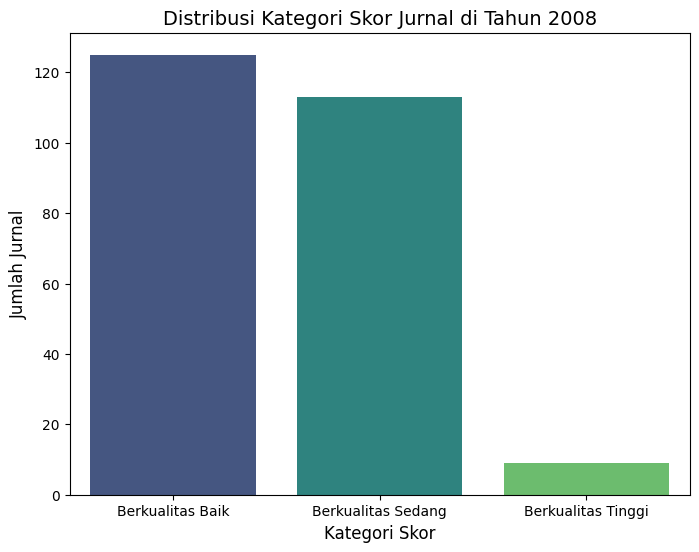

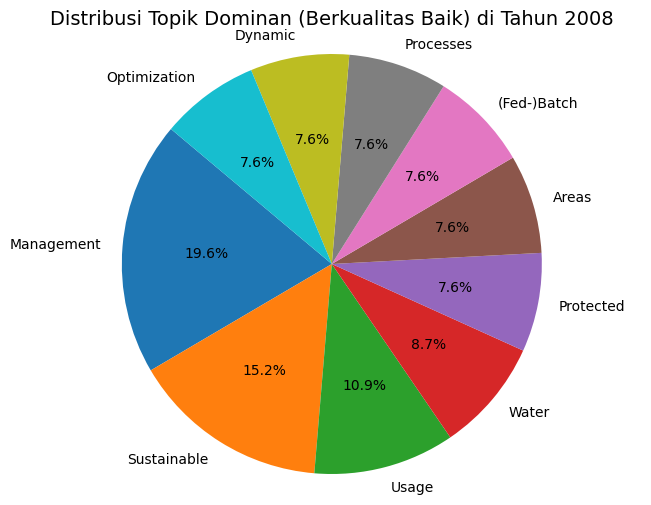

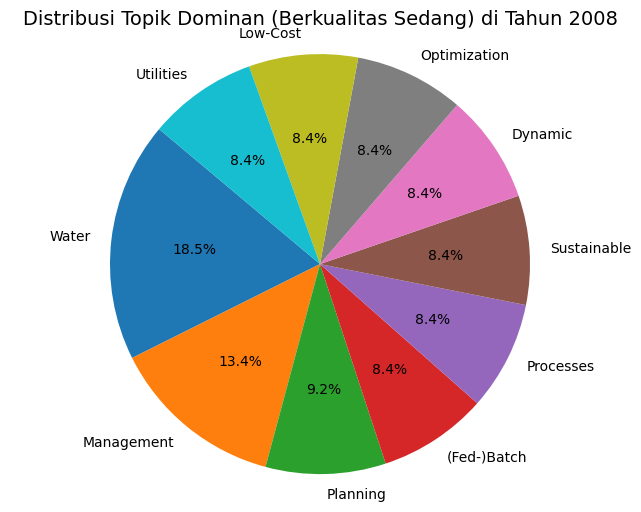

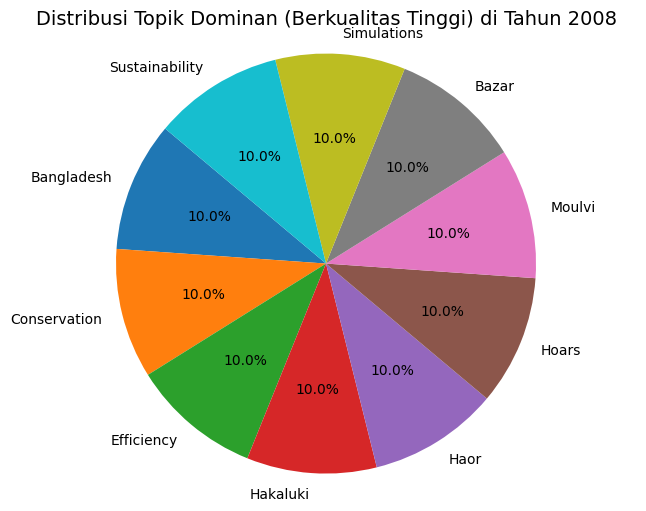

In [229]:
# Visualisasi distribusi kategori skor jurnal di tahun 2008
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2008, x='kategori_skor', palette='viridis')
plt.title('Distribusi Kategori Skor Jurnal di Tahun 2008', fontsize=14)
plt.xlabel('Kategori Skor', fontsize=12)
plt.ylabel('Jumlah Jurnal', fontsize=12)
plt.show()

# Visualisasi kata kunci yang dominan di tahun 2008
# Pisahkan keywords per kategori skor
keywords_per_category_2008 = df_2008.groupby('kategori_skor')['Keywords'].apply(lambda x: ' '.join(x))

# Hitung frekuensi kata untuk setiap kategori
top_keywords_2008 = {}
for category, keywords in keywords_per_category_2008.items():
    word_counts = Counter(keywords.split())
    top_keywords_2008[category] = word_counts.most_common(10)  # Ambil 10 topik dominan

# Buat pie chart untuk setiap kategori
for category, keywords in top_keywords_2008.items():
    labels, counts = zip(*keywords)
    # Tentukan warna khusus untuk pie chart
    custom_colors = list(mcolors.TABLEAU_COLORS.values())[:len(labels)]  # Ambil warna dari palet Tableau
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)
    plt.title(f'Distribusi Topik Dominan ({category}) di Tahun 2008', fontsize=14)
    plt.axis('equal')
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\855331781.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




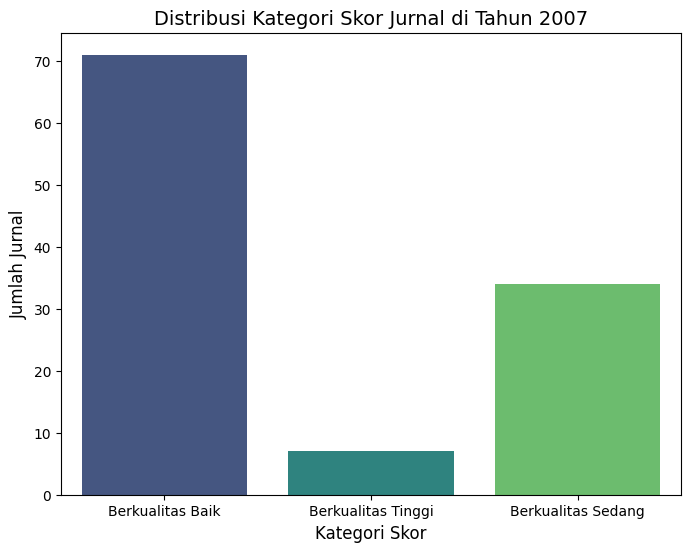

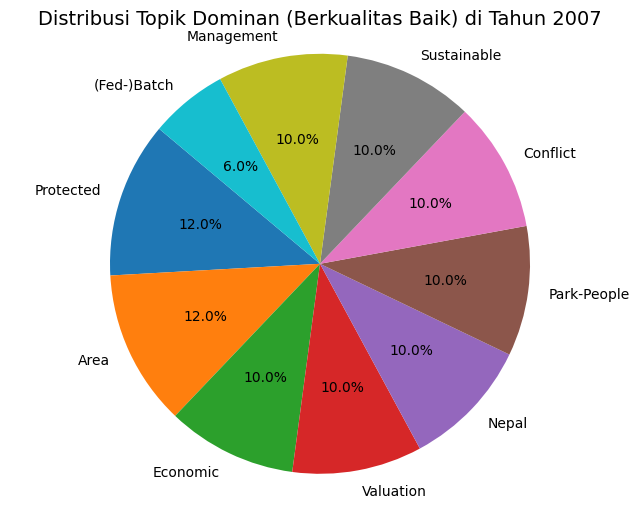

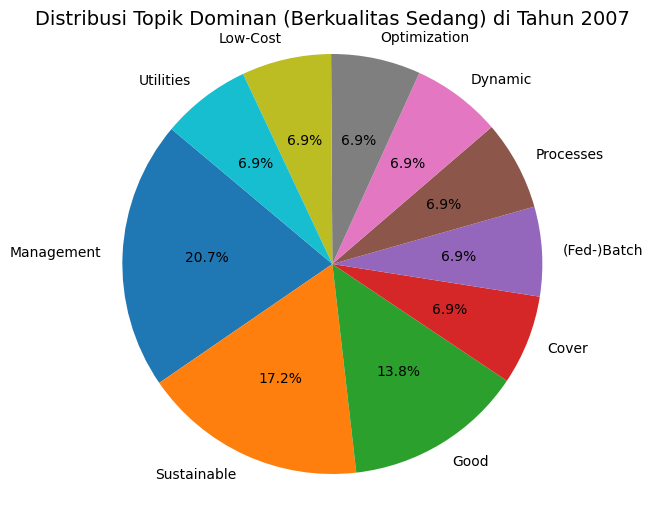

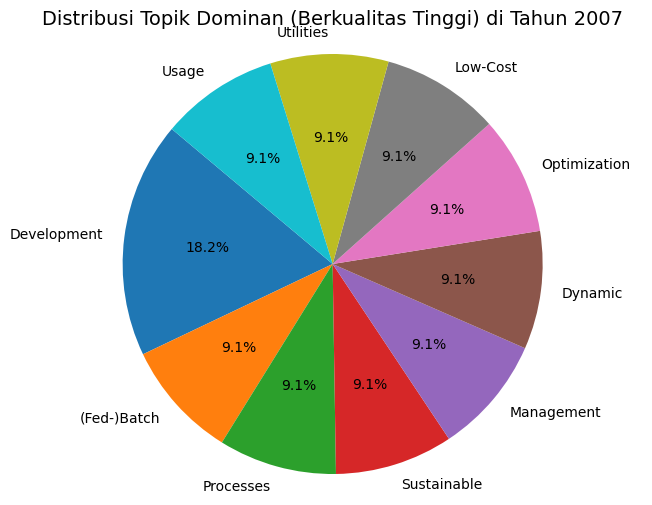

In [230]:
# Visualisasi distribusi kategori skor jurnal di tahun 2007
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2007, x='kategori_skor', palette='viridis')
plt.title('Distribusi Kategori Skor Jurnal di Tahun 2007', fontsize=14)
plt.xlabel('Kategori Skor', fontsize=12)
plt.ylabel('Jumlah Jurnal', fontsize=12)
plt.show()

# Visualisasi kata kunci yang dominan di tahun 2007
# Pisahkan keywords per kategori skor
keywords_per_category_2007 = df_2007.groupby('kategori_skor')['Keywords'].apply(lambda x: ' '.join(x))

# Hitung frekuensi kata untuk setiap kategori
top_keywords_2007 = {}
for category, keywords in keywords_per_category_2007.items():
    word_counts = Counter(keywords.split())
    top_keywords_2007[category] = word_counts.most_common(10)  # Ambil 10 topik dominan

# Buat pie chart untuk setiap kategori
for category, keywords in top_keywords_2007.items():
    labels, counts = zip(*keywords)
    # Tentukan warna khusus untuk pie chart
    custom_colors = list(mcolors.TABLEAU_COLORS.values())[:len(labels)]  # Ambil warna dari palet Tableau
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)
    plt.title(f'Distribusi Topik Dominan ({category}) di Tahun 2007', fontsize=14)
    plt.axis('equal')
    plt.show()

In [231]:
df_2009['kategori_skor'].value_counts()

kategori_skor
Berkualitas Sedang    123
Berkualitas Baik       82
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\3790220976.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




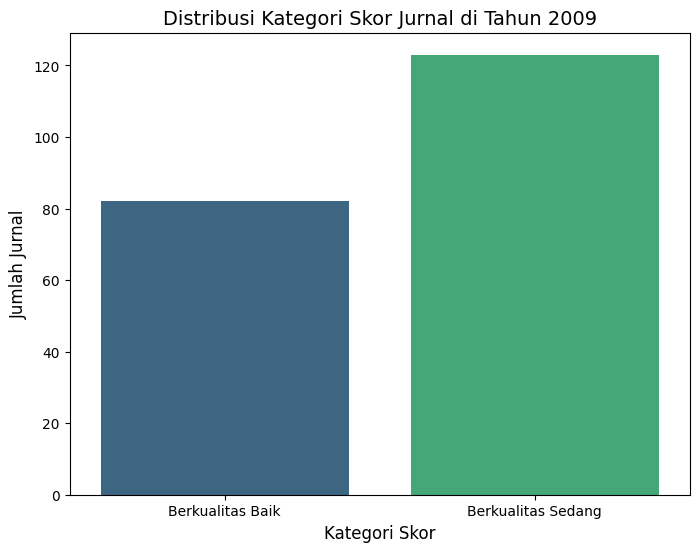

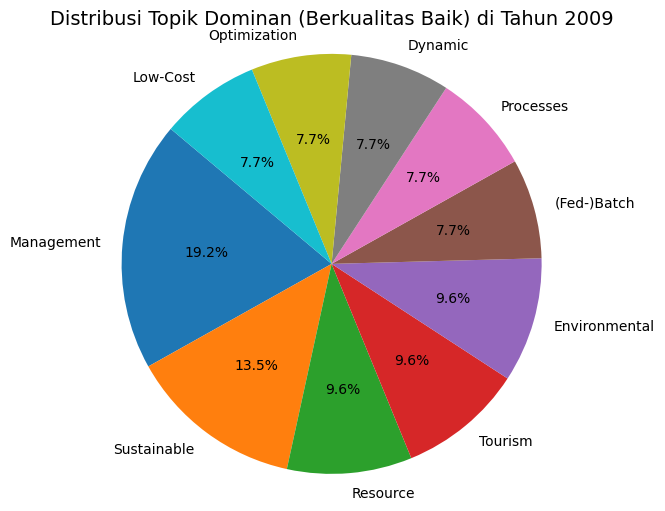

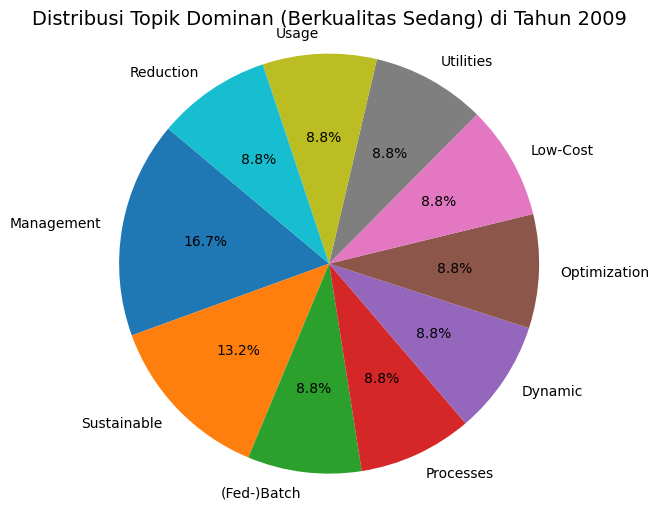

In [232]:
# Visualisasi distribusi kategori skor jurnal di tahun 2009
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2009, x='kategori_skor', palette='viridis')
plt.title('Distribusi Kategori Skor Jurnal di Tahun 2009', fontsize=14)
plt.xlabel('Kategori Skor', fontsize=12)
plt.ylabel('Jumlah Jurnal', fontsize=12)
plt.show()

# Visualisasi kata kunci yang dominan di tahun 2009
# Pisahkan keywords per kategori skor
keywords_per_category_2009 = df_2009.groupby('kategori_skor')['Keywords'].apply(lambda x: ' '.join(x))

# Hitung frekuensi kata untuk setiap kategori
top_keywords_2009 = {}
for category, keywords in keywords_per_category_2009.items():
    word_counts = Counter(keywords.split())
    top_keywords_2009[category] = word_counts.most_common(10)  # Ambil 10 topik dominan

# Buat pie chart untuk setiap kategori
for category, keywords in top_keywords_2009.items():
    labels, counts = zip(*keywords)
    # Tentukan warna khusus untuk pie chart
    custom_colors = list(mcolors.TABLEAU_COLORS.values())[:len(labels)]  # Ambil warna dari palet Tableau
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)
    plt.title(f'Distribusi Topik Dominan ({category}) di Tahun 2009', fontsize=14)
    plt.axis('equal')
    plt.show()

In [233]:
# !pip install wordcloud

In [234]:
df_2010 = df_final[df_final['Year'] == 2010]
df_2010.columns
df_2010.info()
category_counts_2010 = df_2010['kategori_skor'].value_counts()
category_counts_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 269 to 9279
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Scholar                        256 non-null    object 
 1   Scholar_ID                     256 non-null    int64  
 2   Affiliations                   256 non-null    object 
 3   Title                          256 non-null    object 
 4   Year                           256 non-null    int32  
 5   Journal                        256 non-null    object 
 6   Volume                         256 non-null    int64  
 7   Page_start                     256 non-null    int64  
 8   Page_end                       256 non-null    int64  
 9   Cited_by                       256 non-null    int64  
 10  Link                           256 non-null    object 
 11  Keywords                       256 non-null    object 
 12  Document_type                  256 non-null    objec

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\2612156621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




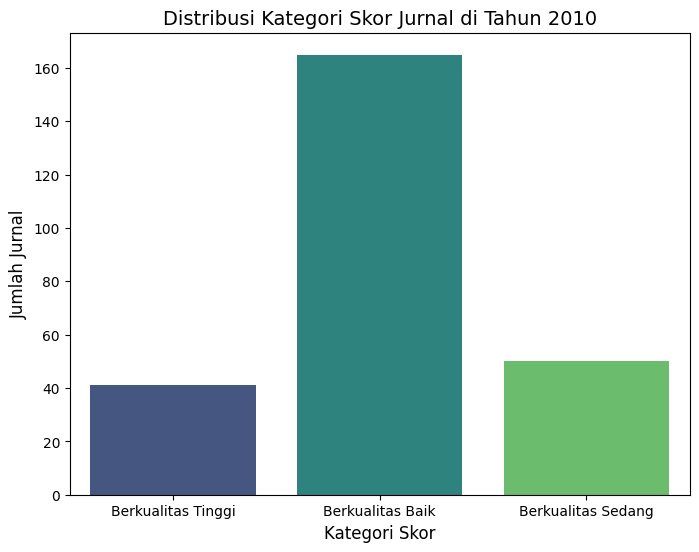

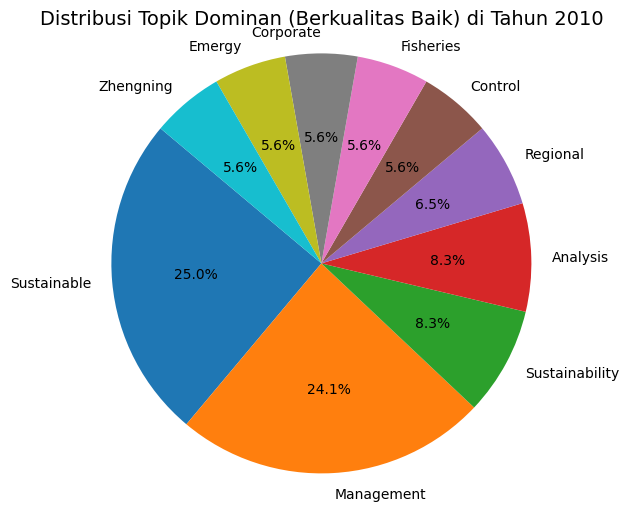

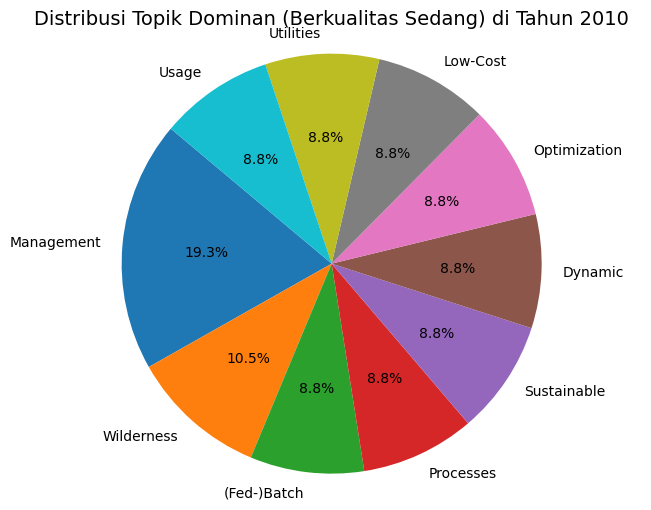

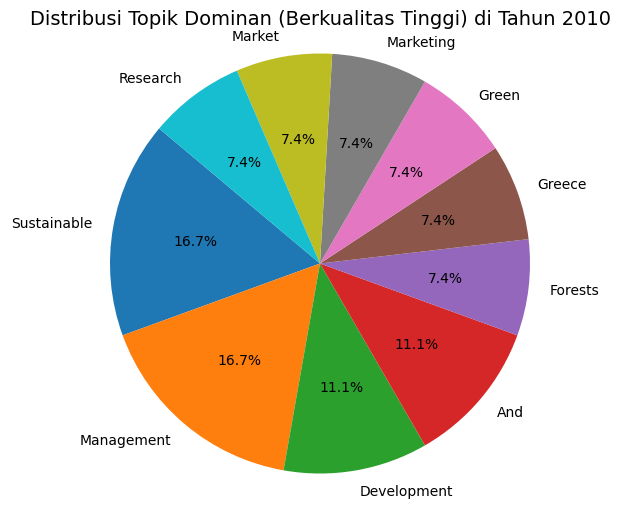

In [235]:
# Visualisasi distribusi kategori skor jurnal di tahun 2010
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2010, x='kategori_skor', palette='viridis')
plt.title('Distribusi Kategori Skor Jurnal di Tahun 2010', fontsize=14)
plt.xlabel('Kategori Skor', fontsize=12)
plt.ylabel('Jumlah Jurnal', fontsize=12)
plt.show()

# Visualisasi kata kunci yang dominan di tahun 2010
# Pisahkan keywords per kategori skor
keywords_per_category_2010 = df_2010.groupby('kategori_skor')['Keywords'].apply(lambda x: ' '.join(x))

# Hitung frekuensi kata untuk setiap kategori
top_keywords_2010 = {}
for category, keywords in keywords_per_category_2010.items():
    word_counts = Counter(keywords.split())
    top_keywords_2010[category] = word_counts.most_common(10)  # Ambil 10 topik dominan

# Buat pie chart untuk setiap kategori
for category, keywords in top_keywords_2010.items():
    labels, counts = zip(*keywords)
    # Tentukan warna khusus untuk pie chart
    custom_colors = list(mcolors.TABLEAU_COLORS.values())[:len(labels)]  # Ambil warna dari palet Tableau
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)
    plt.title(f'Distribusi Topik Dominan ({category}) di Tahun 2010', fontsize=14)
    plt.axis('equal')
    plt.show()

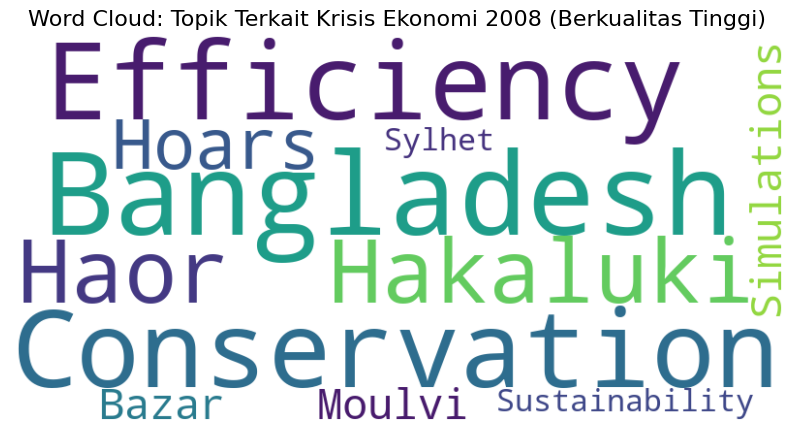

In [236]:
from wordcloud import WordCloud

# Gabungkan semua kata kunci dari jurnal berkualitas tinggi yang relevan dengan krisis ekonomi
keywords_2008 = df_2008[df_2008['kategori_skor'] == 'Berkualitas Tinggi']['Keywords'].str.cat(sep=' ')

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_2008)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Topik Terkait Krisis Ekonomi 2008 (Berkualitas Tinggi)', fontsize=16)
plt.show()

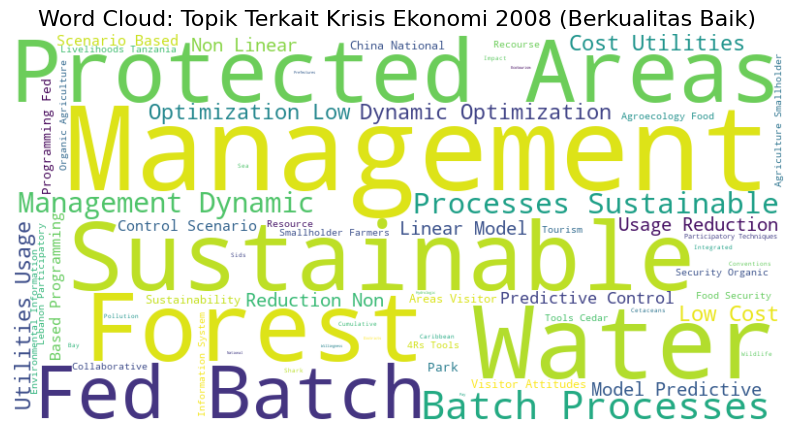

In [237]:
from wordcloud import WordCloud

# Gabungkan semua kata kunci dari jurnal berkualitas tinggi yang relevan dengan krisis ekonomi
keywords_2008 = df_2008[df_2008['kategori_skor'] == 'Berkualitas Baik']['Keywords'].str.cat(sep=' ')

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_2008)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Topik Terkait Krisis Ekonomi 2008 (Berkualitas Baik)', fontsize=16)
plt.show()

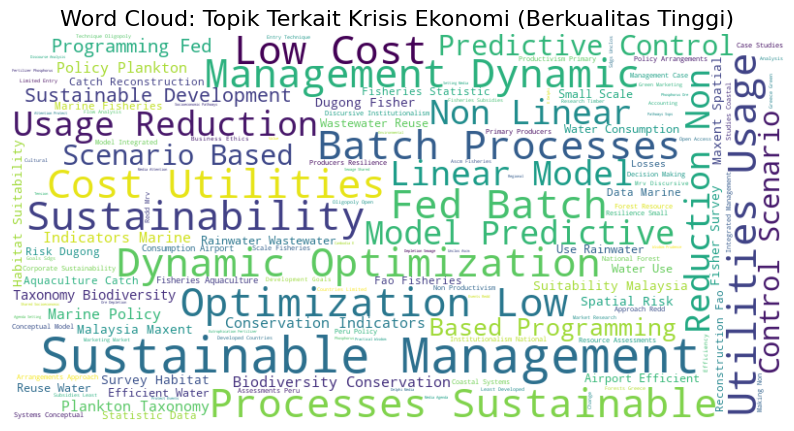

In [238]:
# Gabungkan semua kata kunci dari jurnal berkualitas tinggi yang relevan dengan krisis ekonomi
keywords_2008 = df_final[df_final['kategori_skor'] == 'Berkualitas Tinggi']['Keywords'].str.cat(sep=' ')

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_2008)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Topik Terkait Krisis Ekonomi (Berkualitas Tinggi)', fontsize=16)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\552166469.py:7: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\552166469.py:36: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



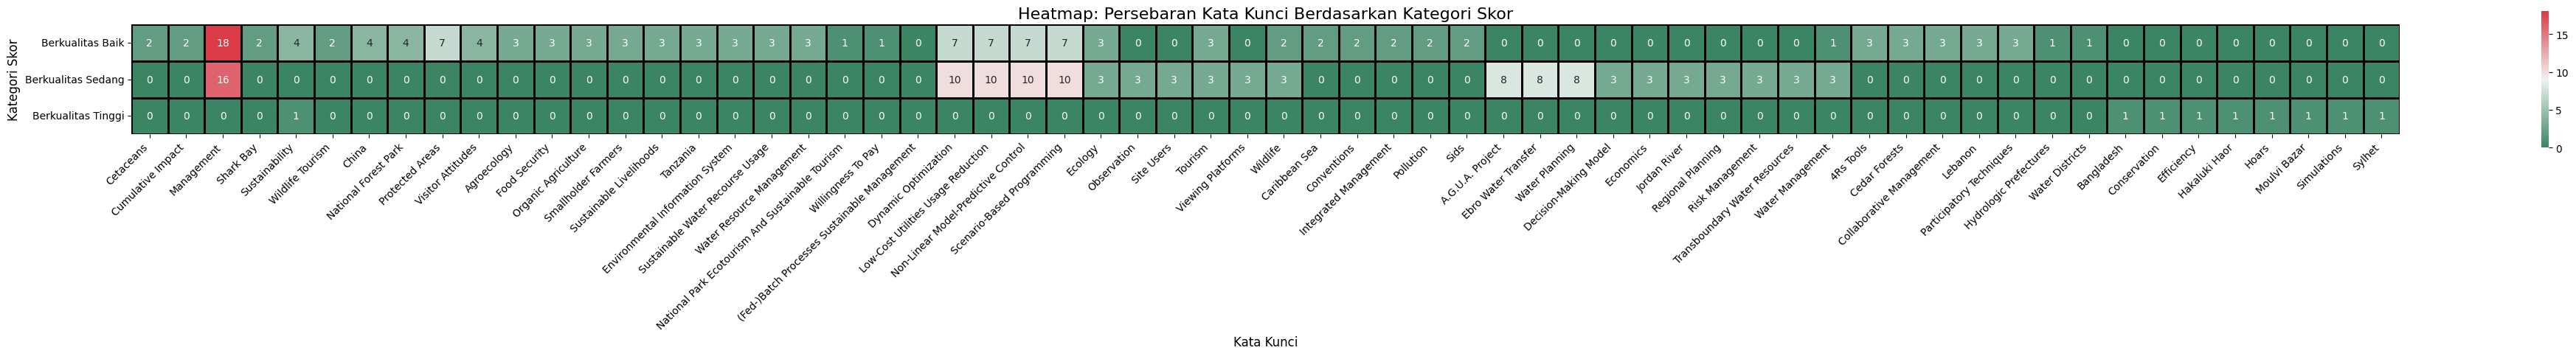

In [239]:
# Ambil kata kunci unik dari kolom 'Keywords' di df_2008
unique_keywords = df_2008['Keywords'].str.split(',').explode().str.strip().unique()

# Hitung frekuensi kemunculan kata kunci di setiap kategori skor
keyword_counts = {}
for keyword in unique_keywords:
    keyword_counts[keyword] = df_2008['Keywords'].str.contains(keyword, case=False, na=False).groupby(df_2008['kategori_skor']).sum()

# Buat DataFrame dari hasil keyword counts
keyword_df = pd.DataFrame(keyword_counts)

# Tentukan ukuran gambar berdasarkan jumlah kategori skor dan kata kunci
num_categories = len(keyword_df.index)  # Jumlah kategori skor
num_keywords = len(keyword_df.columns)  # Jumlah kata kunci
fig_size = (num_keywords * 0.8, num_categories * 0.8)  # Menyesuaikan ukuran gambar agar kotak proporsional

# Buat heatmap dengan outline pada setiap kotak dan proporsional
plt.figure(figsize=fig_size)

# Custom color map (hijau untuk minimum, merah untuk maksimum)
cmap = sns.diverging_palette(150, 10, as_cmap=True)

# Buat heatmap dengan outline pada setiap kotak
sns.heatmap(keyword_df, annot=True, cmap=cmap, fmt='d', cbar=True,
            linewidths=1, linecolor='black', square=True)  # square=True untuk kotak proporsional

# Menyesuaikan rotasi label sumbu x dan y
plt.title('Heatmap: Persebaran Kata Kunci Berdasarkan Kategori Skor', fontsize=16)
plt.xlabel('Kata Kunci', fontsize=12)
plt.ylabel('Kategori Skor', fontsize=12)

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right', fontsize=10)  # rotasi 45 derajat dan penyesuaian posisi
plt.yticks(rotation=0, fontsize=10)  # rotasi label sumbu y agar tetap horizontal

plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

# 2008 Data on Housing Price and GDP

In [240]:
df_housing = pd.read_csv("Housing_Macroeconomic_Factors_US (2).csv")

In [241]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               425 non-null    object 
 1   house_price_index  425 non-null    float64
 2   population         425 non-null    int64  
 3   house_supply       425 non-null    float64
 4   gdp                422 non-null    float64
 5   mortgage_rate      422 non-null    float64
 6   employment_rate    422 non-null    float64
 7   permit_new         422 non-null    float64
 8   ppi_res            422 non-null    float64
 9   m3                 422 non-null    float64
 10  cci                422 non-null    float64
 11  delinquency_rate   374 non-null    float64
 12  hcai               285 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 43.3+ KB


In [242]:
df_housing.columns

Index(['Date', 'house_price_index', 'population', 'house_supply', 'gdp',
       'mortgage_rate', 'employment_rate', 'permit_new', 'ppi_res', 'm3',
       'cci', 'delinquency_rate', 'hcai'],
      dtype='object')

In [243]:
# Mengubah kolom 'Date' menjadi tipe datetime
df_housing['Date'] = pd.to_datetime(df_housing['Date'])

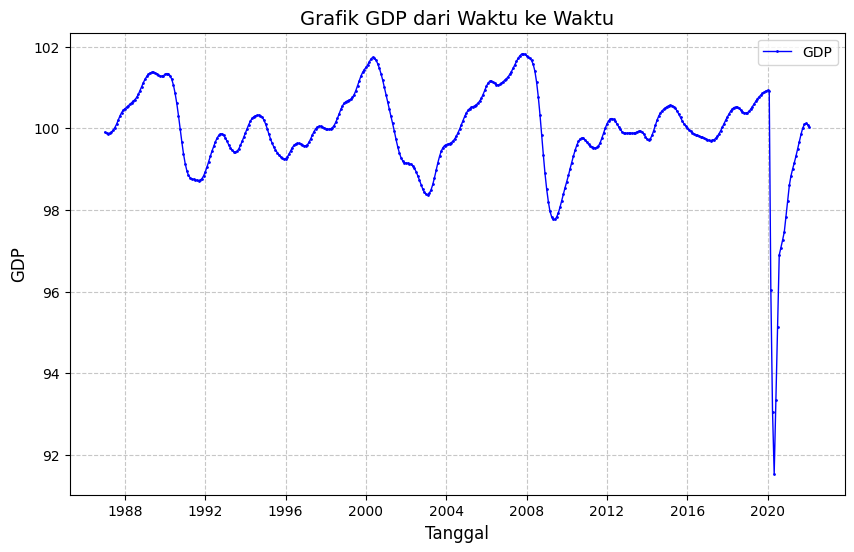

In [244]:
# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(df_housing['Date'], df_housing['gdp'], marker='.', markersize=2, linestyle='-', linewidth=1, color='b', label='GDP')

# Menambahkan judul dan label
plt.title('Grafik GDP dari Waktu ke Waktu', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Menampilkan grafik
plt.show()

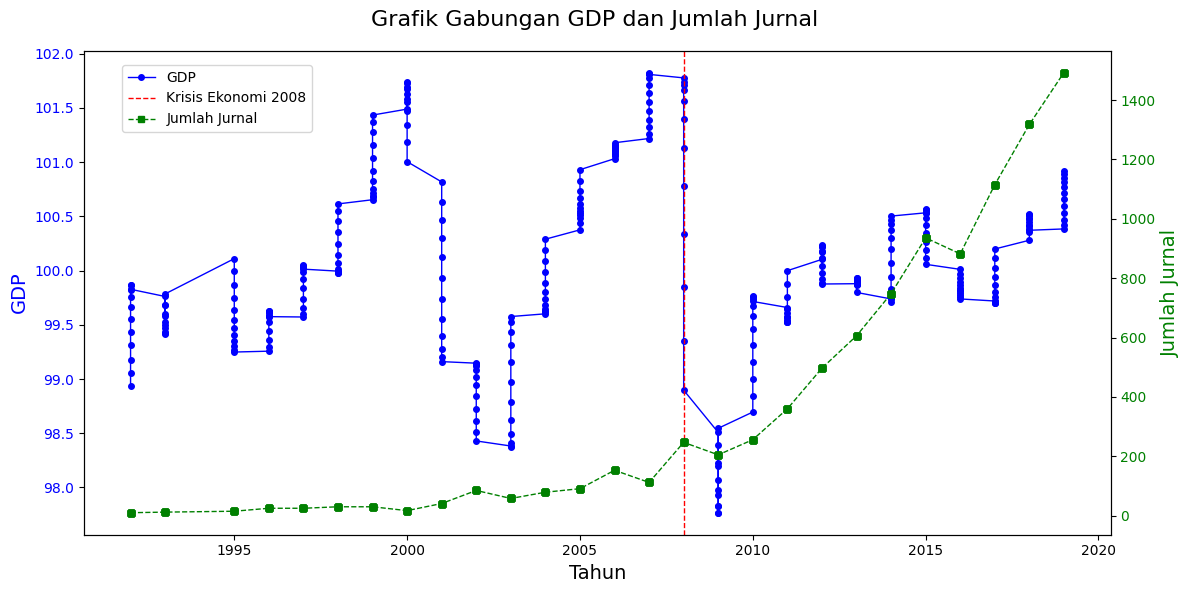

In [245]:
# Mengubah kolom 'Date' menjadi tipe datetime dan menambahkan kolom 'Year'
df_housing['Date'] = pd.to_datetime(df_housing['Date'])
df_housing['Year'] = df_housing['Date'].dt.year

# Menyelaraskan data berdasarkan tahun
merged_data = pd.merge(
    df_housing[['Year', 'gdp']],
    journal_trend.rename('Jumlah Jurnal'),
    left_on='Year',
    right_index=True,
    how='inner'
)

# Membuat grafik gabungan
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GDP
ax1.plot(
    merged_data['Year'], 
    merged_data['gdp'], 
    marker='o', 
    markersize=4, 
    color='b', 
    linestyle='-', 
    linewidth=1, 
    label='GDP'
)
ax1.set_xlabel('Tahun', fontsize=14)
ax1.set_ylabel('GDP', fontsize=14, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Jumlah Jurnal di sumbu y sekunder
ax2 = ax1.twinx()
ax2.plot(
    merged_data['Year'], 
    merged_data['Jumlah Jurnal'], 
    marker='s', 
    markersize=4, 
    color='g', 
    linestyle='--', 
    linewidth=1, 
    label='Jumlah Jurnal'
)
ax2.set_ylabel('Jumlah Jurnal', fontsize=14, color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Menambahkan garis vertikal untuk tahun 2008
ax1.axvline(x=2008, color='red', linestyle='--', linewidth=1, label='Krisis Ekonomi 2008')

# Menambahkan judul dan legenda
fig.suptitle('Grafik Gabungan GDP dan Jumlah Jurnal', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()

# Menampilkan grafik
plt.show()

In [248]:
df_cleaned['Final_Score'].min()

np.float64(4.8500000000000005)

In [249]:
df_cleaned['Final_Score'].max()

np.float64(8.75)

In [250]:
df_cleaned['Final_Score'].median()

np.float64(6.7)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6736\737726212.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



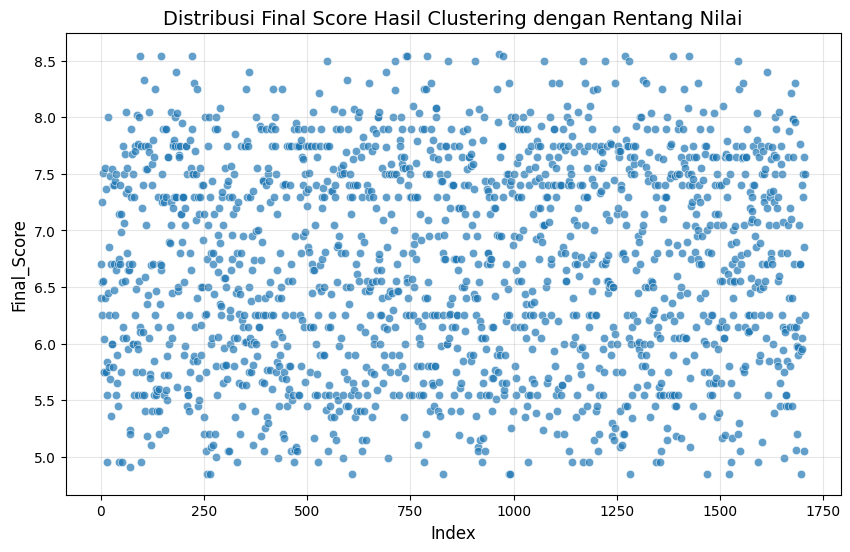

In [271]:
# Filter data berdasarkan rentang nilai Final_Score
x_min, x_max = 4.8500000000000005, 8.75  # Contoh rentang nilai
filtered_data = scholar_final[(scholar_final['Final_Score'] >= x_min) & (df_cleaned['Final_Score'] <= x_max)]

# Scatter plot distribusi Final_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x=filtered_data.index, y='Final_Score', alpha=0.7)

# Menambahkan detail visualisasi
plt.title(f'Distribusi Final Score Hasil Clustering dengan Rentang Nilai', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Final_Score', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


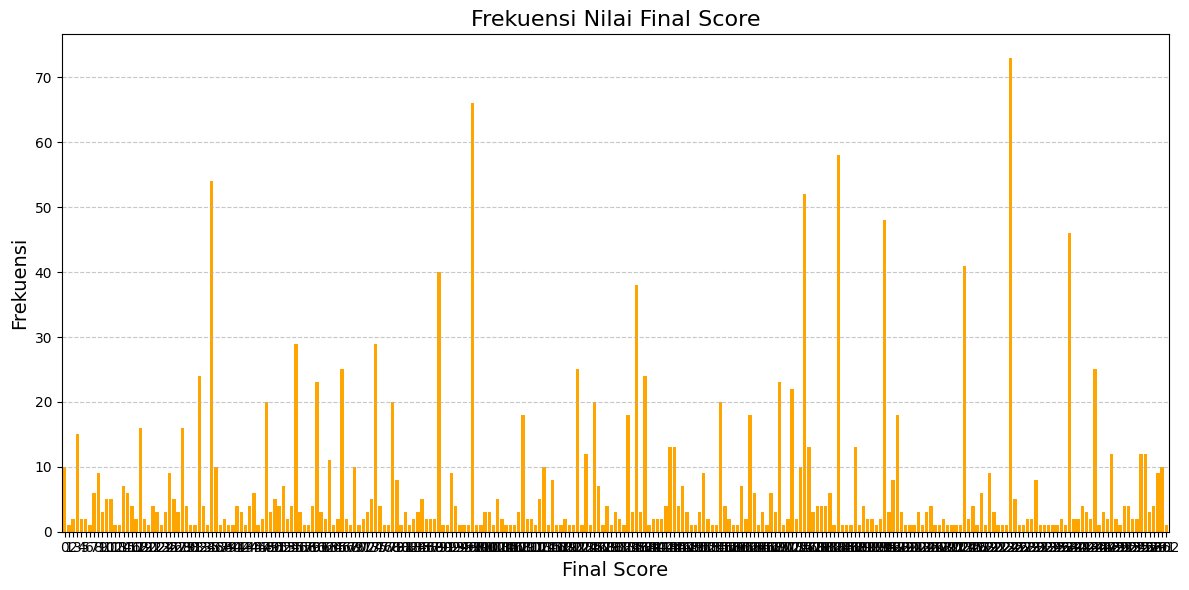

In [270]:
# Menghitung nilai unik dan frekuensinya
value_counts = scholar_final['Final_Score'].value_counts().sort_index()

# Menampilkan grafik batang
plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar', color='orange', width=0.8)  # Mengatur lebar batang

# Menambahkan judul dan label
plt.title('Frekuensi Nilai Final Score', fontsize=16)
plt.xlabel('Final Score', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

# Mengatur format angka di sumbu X untuk menampilkan tanpa desimal
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# Mengatur nilai sumbu X agar horizontal dan memberikan spasi
plt.xticks(rotation=0, fontsize=10)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Memberikan jarak antar nilai sumbu X

# Menampilkan grid vertikal untuk memperjelas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()  # Mengatur tata letak agar tidak terpotong
plt.show()


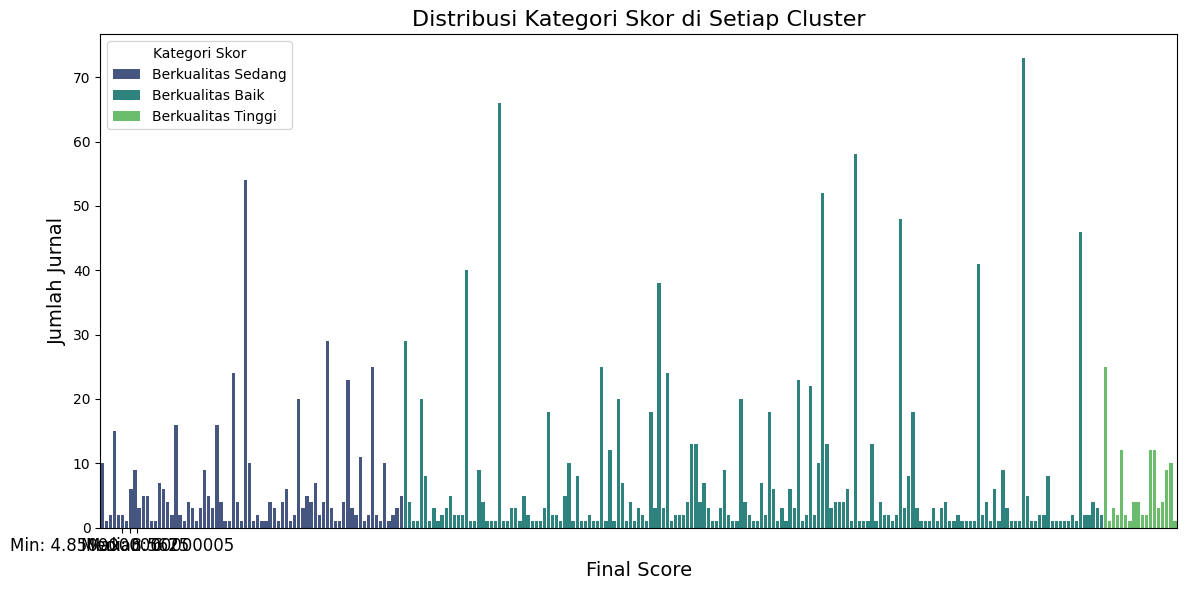

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung nilai min, median, dan max
min_score = scholar_final['Final_Score'].min()
median_score = scholar_final['Final_Score'].median()
max_score = scholar_final['Final_Score'].max()

# Membuat plot
plt.figure(figsize=(12, 6))
sns.countplot(data=scholar_final, x='Final_Score', hue='kategori_skor', palette='viridis')

# Menambahkan judul dan label
plt.title("Distribusi Kategori Skor di Setiap Cluster", fontsize=16)
plt.xlabel("Final Score", fontsize=14)
plt.ylabel("Jumlah Jurnal", fontsize=14)
plt.legend(title="Kategori Skor", fontsize=10)

# Menentukan posisi label sumbu X
x_ticks = [min_score, median_score, max_score]
x_labels = [f'Min: {min_score}', f'Median: {median_score}', f'Max: {max_score}']

# Mengatur label sumbu X
plt.xticks(ticks=x_ticks, labels=x_labels, fontsize=12)

# Menampilkan plot
plt.tight_layout()  # Untuk memastikan tata letak tidak terpotong
plt.show()